# IF3070 Foundations of Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 20

Group Members:
- Dzulfaqor Ali D (18222017)
- Billy Samuel S (18222039)
- Dama Daliman D (18222047)
- Steven Adrian C (18222101)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


# Data Cleaning Libraries
import re
%pip install fancyimpute
from fancyimpute import IterativeImputer
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Data Preprocessing Libraries
from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.base import BaseEstimator, TransformerMixin

# Modelling Libraries
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

# Import other libraries if needed
from collections import Counter
import time
from datetime import datetime
import json
import os

## Import Dataset

In [2]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

# train.csv = https://drive.google.com/file/d/1ITBfYJO6BunBwMnAivSw9f8W087LNleo/view?usp=sharing
# test.csv = https://drive.google.com/file/d/1z2jY8qsW4P6E8gCrWfmCyYMXPmWIWiGu/view?usp=sharing
# alternative test.csv = https://gist.githubusercontent.com/RunningPie/62a453218bd691c00d695f4d1fa05f38/raw/b9214382e6007dd6e267d7693e400e36c0fe4d77/test.csv
# used github gist because gdrive flagged the csv as virus

df_train = pd.read_csv('https://drive.google.com/uc?id=1ITBfYJO6BunBwMnAivSw9f8W087LNleo')
df_test = pd.read_csv('https://gist.githubusercontent.com/RunningPie/62a453218bd691c00d695f4d1fa05f38/raw/b9214382e6007dd6e267d7693e400e36c0fe4d77/test.csv')


In [3]:
df_train.head(10)

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1
5,12,899992.txt,https://www.free-marine.com,26.0,NaN,19.0,NaN,com,0.636364,NaN,...,NaN,0.0,0.0,15.0,3.0,2.0,4.0,1.0,NaN,1
6,17,NaN,https://www.ridemcts.com,23.0,www.ridemcts.com,16.0,0.0,com,NaN,0.522907,...,1.0,0.0,1.0,NaN,NaN,22.0,NaN,4.0,8.0,1
7,19,568276.txt,https://www.epner.com,NaN,NaN,NaN,0.0,com,NaN,0.522907,...,NaN,0.0,NaN,40.0,NaN,19.0,176.0,NaN,144.0,1
8,20,52998.txt,https://www.az511.com,NaN,www.az511.com,13.0,0.0,com,1.000000,NaN,...,NaN,NaN,0.0,NaN,33.0,9.0,109.0,7.0,NaN,1
9,22,NaN,https://www.screenbeam.com,25.0,www.screenbeam.com,18.0,NaN,NaN,1.000000,0.522907,...,NaN,NaN,NaN,NaN,27.0,48.0,148.0,11.0,NaN,1


In [4]:
df_train.tail(10)

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
140394,235782,114767.txt,NaN,NaN,www.bmvc2020-conference.com,NaN,0.0,com,NaN,0.522907,...,0.0,0.0,NaN,10.0,NaN,9.0,56.0,NaN,NaN,1
140395,235784,611490.txt,https://www.inspiredherway.com,29.0,NaN,22.0,NaN,com,NaN,NaN,...,0.0,0.0,NaN,14.0,9.0,25.0,45.0,0.0,49.0,1
140396,235785,822090.txt,https://www.genevalakemuseum.org,NaN,www.genevalakemuseum.org,24.0,0.0,org,NaN,0.079963,...,1.0,NaN,NaN,31.0,NaN,22.0,NaN,4.0,73.0,1
140397,235786,494947.txt,https://www.nnry.com,19.0,NaN,NaN,0.0,NaN,1.0,0.522907,...,NaN,0.0,NaN,82.0,6.0,13.0,NaN,0.0,115.0,1
140398,235787,856116.txt,NaN,26.0,NaN,19.0,0.0,net,1.0,0.038420,...,0.0,0.0,NaN,26.0,2.0,NaN,NaN,12.0,347.0,1
140399,235790,49490.txt,NaN,NaN,www.slavevoyages.org,NaN,0.0,NaN,1.0,0.079963,...,NaN,0.0,1.0,23.0,3.0,6.0,NaN,12.0,NaN,1
140400,235791,NaN,https://www.greenmountainenergy.com,34.0,www.greenmountainenergy.com,NaN,0.0,com,1.0,0.522907,...,1.0,NaN,1.0,26.0,NaN,NaN,169.0,15.0,40.0,1
140401,235792,NaN,https://www.leadcastingcall.com,30.0,www.leadcastingcall.com,23.0,NaN,NaN,1.0,0.522907,...,0.0,0.0,1.0,25.0,NaN,NaN,87.0,1.0,93.0,1
140402,235794,NaN,https://www.fedarb.com,21.0,NaN,14.0,NaN,NaN,1.0,0.522907,...,0.0,0.0,1.0,NaN,36.0,NaN,102.0,NaN,NaN,1
140403,235795,464776.txt,https://www.risenenergy.com,26.0,www.risenenergy.com,19.0,NaN,NaN,1.0,0.522907,...,0.0,0.0,NaN,34.0,3.0,3.0,126.0,3.0,129.0,1


In [5]:
df_test.head(10)

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,48,80851.txt,https://www.iaee.org,19.0,NaN,12.0,0.0,org,NaN,0.079963,...,1.0,0.0,0.0,1.0,NaN,NaN,13.0,194.0,NaN,65.0
1,68,mw130480.txt,http://www.iran-edi.com,22.0,NaN,16.0,NaN,NaN,0.625000,NaN,...,NaN,NaN,0.0,NaN,0.0,NaN,2.0,0.0,0.0,1.0
2,76,400382.txt,https://www.bistum-chur.ch,25.0,www.bistum-chur.ch,18.0,0.0,ch,0.636364,0.004983,...,NaN,NaN,0.0,1.0,5.0,12.0,18.0,193.0,NaN,196.0
3,155,625297.txt,https://www.numberthreebath.com,30.0,NaN,23.0,NaN,com,1.000000,0.522907,...,0.0,0.0,NaN,NaN,NaN,1.0,10.0,12.0,0.0,11.0
4,167,8123642.txt,https://ipfs.litnet.work/ipfs/bafybeib5jvxytzb...,100.0,ipfs.litnet.work,NaN,0.0,work,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
5,190,718143.txt,https://www.kvedomosti.com,25.0,www.kvedomosti.com,18.0,0.0,NaN,NaN,0.522907,...,0.0,0.0,0.0,1.0,27.0,2.0,4.0,0.0,0.0,NaN
6,207,NaN,https://helpcenter-servicesde24.de/,NaN,NaN,26.0,0.0,de,0.565217,NaN,...,0.0,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,0.0
7,208,885120.txt,https://www.oldpark.org,22.0,www.oldpark.org,15.0,NaN,NaN,1.000000,0.079963,...,1.0,NaN,0.0,0.0,20.0,5.0,6.0,160.0,26.0,8.0
8,212,729065.txt,NaN,24.0,www.moonbears.org,NaN,0.0,NaN,NaN,0.079963,...,0.0,NaN,0.0,1.0,NaN,NaN,10.0,1.0,1.0,2.0
9,233,NaN,http://www.ferienhaus-ammerland.de,NaN,www.ferienhaus-ammerland.de,27.0,NaN,de,NaN,0.032650,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,1.0,0.0,1.0


In [6]:
df_train.loc[df_train["DomainLength"] < 9][["Domain", "DomainLength", "label"]].sort_values(by="DomainLength", ascending=False)

,Domain,DomainLength,label
140352,NaN,8.0,0
92238,archi.tn,8.0,0
68342,hein.fun,8.0,0
58374,zbzzk.ru,8.0,0
29649,NaN,8.0,1
...,...,...,...
89206,t.co,4.0,0
114150,s.id,4.0,0
113014,t.ly,4.0,0
112443,NaN,4.0,0


In [7]:
df_train.loc[df_train["DomainLength"] < 9][["Domain", "DomainLength", "label"]].sort_values(by="DomainLength", ascending=False)

,Domain,DomainLength,label
140352,NaN,8.0,0
92238,archi.tn,8.0,0
68342,hein.fun,8.0,0
58374,zbzzk.ru,8.0,0
29649,NaN,8.0,1
...,...,...,...
89206,t.co,4.0,0
114150,s.id,4.0,0
113014,t.ly,4.0,0
112443,NaN,4.0,0



# 0.a Drop useless features

Sebelum berlanjut ke train test splitting, kita hapus dulu fitur-fitur yang kurang berguna berdasarkan [metadata](https://www.sciencedirect.com/science/article/abs/pii/S0167404823004558?via%3Dihub) dan EDA pada tucil 2

In [8]:
new_df_train = df_train.drop(columns=['id', 'FILENAME'])
# URL, Domain, dan Title kita drop nanti, karena akan dibutuhkan di cleaning & preprocessing

fitur-fitur di atas dihapus karena memiliki variansi yang sangat tinggi (unique values > 90%, bahkan mendekati 99%).

variansi yang sangat tinggi (bahkan sampai setiap instance punya nilai sendiri) tidak bermanfaat untuk analisis dan modelling karena 2 hal utama:

1. *No predictive power*: Jika setiap instance memiliki nilai sendiri, maka tidak ada pola atau hubungan yang bisa dianalisa

2. *Unnecessary information*: Fitur yang 100% unik bisa menambahkan informasi yang tidak diperlukan dan selanjutnya menyebabkan model menjadi lebih kompleks daripada seharusnya


# 0.b Set numerical and categorical columns

In [9]:
categorical_features = [col for col in df_train.columns if col.startswith("Is") or col.startswith("Has")] + \
[col for col in df_train.select_dtypes(exclude="number").columns] + \
["Bank", "Pay", "Crypto", "Robots"]
numerical_features = [col for col in df_train.columns if (col not in categorical_features) and (col != "label")]

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [10]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...
X = new_df_train.drop(columns='label')
y = new_df_train['label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

In [11]:
df_to_clean = pd.concat([X_train, y_train], axis=1)

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [12]:
# Pertama identifikasi berapa missing value di setiap kolom
df_to_clean.isnull().sum().sort_values()

label                             0
IsDomainIP                    33735
IsResponsive                  33993
NoOfEmptyRef                  34151
Pay                           34472
URL                           34695
NoOfPopup                     34702
HasHiddenFields               34921
NoOfSubDomain                 35075
NoOfQMarkInURL                35307
HasTitle                      35562
TLD                           36307
NoOfAmpersandInURL            36320
DomainLength                  37078
Robots                        37504
NoOfOtherSpecialCharsInURL    38045
TLDLength                     38157
CharContinuationRate          38358
NoOfSelfRef                   38466
IsHTTPS                       39547
NoOfiFrame                    39893
DomainTitleMatchScore         40037
Crypto                        40184
NoOfImage                     40264
URLCharProb                   41653
URLTitleMatchScore            41815
TLDLegitimateProb             42296
DegitRatioInURL             

In [13]:
# kurang bermanfaat informasi hanya angka, coba kita buat persen

((df_to_clean.isnull().sum() / len(df_to_clean)) * 100).sort_values()

label                          0.000000
IsDomainIP                    30.033920
IsResponsive                  30.263615
NoOfEmptyRef                  30.404281
Pay                           30.690063
URL                           30.888598
NoOfPopup                     30.894830
HasHiddenFields               31.089804
NoOfSubDomain                 31.226908
NoOfQMarkInURL                31.433455
HasTitle                      31.660479
TLD                           32.323745
NoOfAmpersandInURL            32.335319
DomainLength                  33.010158
Robots                        33.389422
NoOfOtherSpecialCharsInURL    33.871068
TLDLength                     33.970781
CharContinuationRate          34.149729
NoOfSelfRef                   34.245880
IsHTTPS                       35.208283
NoOfiFrame                    35.516323
DomainTitleMatchScore         35.644525
Crypto                        35.775398
NoOfImage                     35.846621
URLCharProb                   37.083233


karena missing values di beberapa kolom sangat banyak, kita coba imputation dari informasi pada metadata

karena URL adalah salah satu kolom dengan missing values tersedikit yang bisa memberikan kita bantuan dalam imputation, mari kita buat imputation berdasarkan URL

In [14]:
# Kita mulai dari mengisi domain, karena dia yang paling banyak kosong
def ambil_domain(url):
    if isinstance(url, str):
        return url.split('//')[1].split('/')[0] if '//' in url else url.split('/')[0]
    return None  # Return None buat instance yg URL nya juga kosong

df_to_clean.loc[df_to_clean['Domain'].isnull(), 'Domain'] = df_to_clean.loc[df_to_clean['Domain'].isnull(), 'URL'].apply(lambda x: ambil_domain(x) if pd.notnull(x) else None)
# pake loc biar ga overwrite nilai yang asalnya ga null

In [15]:
df_to_clean['Domain'].isnull().sum()

17344

nice! berkurang dari 56122 jadi 17344, ayo kita lanjut

In [16]:
#DomainLength
df_to_clean.loc[df_to_clean['DomainLength'].isnull(), 'DomainLength'] = df_to_clean.loc[df_to_clean['DomainLength'].isnull(), 'Domain'].apply(lambda x: len(x) if pd.notnull(x) else None)

df_to_clean['DomainLength'].isnull().sum()

5767

In [17]:
# Dari nama kolomnya "LetterRatioInURL" kemungkinan
# ini merupakan hitungan dari berapa persen huruf (alfabetis) yang ada di URL

def rasio_huruf_url(url):
    if isinstance(url, str):
        return len(re.findall(r'[a-zA-Z]', url)) / len(url)
    return None

df_to_clean.loc[df_to_clean['LetterRatioInURL'].isnull(), 'LetterRatioInURL'] = df_to_clean.loc[df_to_clean['LetterRatioInURL'].isnull(), 'URL'].apply(lambda x: rasio_huruf_url(x) if pd.notnull(x) else None)

In [18]:
df_to_clean['LetterRatioInURL'].isnull().sum()

16345

In [19]:
df_to_clean[df_to_clean["NoOfObfuscatedChar"] > 0][["URL", "NoOfObfuscatedChar", "ObfuscationRatio"]].head(10)

,URL,NoOfObfuscatedChar,ObfuscationRatio
27155,NaN,3.0,0.021
140184,NaN,12.0,NaN
136209,NaN,9.0,0.011
92071,http://www.modernmercantileco.com/scannable%20...,3.0,0.061
96025,https://www.20-minut.com/?shoplogin=enabled&li...,3.0,NaN
85946,https://kayueglobal.com/wp-includes/ixr/index%...,9.0,0.036
2223,http://www.powerspeed.com.au/6man%20/amencn-1/...,3.0,0.059
9974,NaN,3.0,NaN
5860,https://ipfs.io/ipfs/qmyedgfo8vcp4fxkybikbdwjh...,3.0,0.037
67462,NaN,3.0,NaN


In [20]:
# Selanjutnya untuk fitur "NoOfObfuscatedChar" kemungkinan menghitung
# banyaknya karakter yang mengandung karakter obfuscasi

def obfuscasi_karakter(url):
    if isinstance(url, str):
        # Match all occurrences of '%XX' where XX are hexadecimal digits
        return len(re.findall(r'%[0-9A-Fa-f]{2}', url))
    return None

df_to_clean.loc[df_to_clean['NoOfObfuscatedChar'].isnull(), 'NoOfObfuscatedChar'] = df_to_clean.loc[df_to_clean['NoOfObfuscatedChar'].isnull(), 'URL'].apply(lambda x: obfuscasi_karakter(x) if pd.notnull(x) else None)

In [21]:
df_to_clean['NoOfObfuscatedChar'].isnull().sum()

16460

In [22]:
# HasObfuscation
df_to_clean["HasObfuscation"] = (df_to_clean["NoOfObfuscatedChar"] > 0)*1

df_to_clean["HasObfuscation"].isnull().sum()

0

In [23]:
# ObfuscationRatio
def rasio_obfuscasi(url):
    if isinstance(url, str):
        return len(re.findall(r'%[0-9A-Fa-f]{2}', url)) / len(url)
    return None

df_to_clean.loc[df_to_clean['ObfuscationRatio'].isnull(), 'ObfuscationRatio'] = df_to_clean.loc[df_to_clean['ObfuscationRatio'].isnull(), 'URL'].apply(lambda x: rasio_obfuscasi(x) if pd.notnull(x) else None)

df_to_clean['ObfuscationRatio'].isnull().sum()

16016

In [24]:
# NoOfLettersInURL, harusnya tadi ini dulu kali ya wkwkwk
def banyak_huruf_url(url):
    if isinstance(url, str):
        return len(re.findall(r'[a-zA-Z]', url))
    return None

df_to_clean.loc[df_to_clean['NoOfLettersInURL'].isnull(), 'NoOfLettersInURL'] = df_to_clean.loc[df_to_clean['NoOfLettersInURL'].isnull(), 'URL'].apply(lambda x: banyak_huruf_url(x) if pd.notnull(x) else None)

df_to_clean['NoOfLettersInURL'].isnull().sum()

15645

In [25]:
df_to_clean[df_to_clean["SpacialCharRatioInURL"] > 0][["URL", "SpacialCharRatioInURL"]].head(10)

,URL,SpacialCharRatioInURL
97659,https://www.atlanticwhiteshark.org,0.030
11488,NaN,0.038
67815,https://apinchek.protationsacc.eu.org/aprep%d0...,0.102
109956,NaN,0.047
55891,https://www.muzicons.com,0.043
118842,https://www.bestcreativedesigns.com,0.029
79017,NaN,0.040
48500,http://www.video.videos.vidto.me,0.097
13705,https://www.eltersberg.de,0.042
138114,https://www.medriva.com,0.045


In [26]:
# Correcting the column name in the mentioned code
# Correct column name should be 'SpacialCharRatioInURL'
def spacial_char_ratio(url):
    if isinstance(url, str): 
        # Count special characters (excluding letters, digits, '.', and '/')
        special_chars = re.findall(r'[^a-zA-Z0-9./]', url)
        return len(special_chars) / len(url)
    return None

df_to_clean.loc[df_to_clean['SpacialCharRatioInURL'].isnull(), 'SpacialCharRatioInURL'] = df_to_clean.loc[df_to_clean['SpacialCharRatioInURL'].isnull(), 'URL'].apply(lambda x: spacial_char_ratio(x) if pd.notnull(x) else None)

df_to_clean['SpacialCharRatioInURL'].isnull().sum()

15403

In [27]:
# URLLength
df_to_clean.loc[df_to_clean['URLLength'].isnull(), 'URLLength'] = df_to_clean.loc[df_to_clean['URLLength'].isnull(), 'URL'].apply(lambda x: len(x) if pd.notnull(x) else None)

df_to_clean['URLLength'].isnull().sum()

14973

In [28]:
# Selanjutnya untuk fitur "NoOfDegitsInURL"

def hitung_digit(url):
    if isinstance(url, str):
        return len(re.findall(r'%[0-9]', url))
    return None

df_to_clean.loc[df_to_clean['NoOfDegitsInURL'].isnull(), 'NoOfDegitsInURL'] = df_to_clean.loc[df_to_clean['NoOfDegitsInURL'].isnull(), 'URL'].apply(lambda x: hitung_digit(x) if pd.notnull(x) else None)

df_to_clean['NoOfDegitsInURL'].isnull().sum()

14576

In [29]:
# DegitRatioInURL
df_to_clean.loc[df_to_clean['DegitRatioInURL'].isnull(), 'DegitRatioInURL'] = df_to_clean.loc[df_to_clean['DegitRatioInURL'].isnull(), 'URL'].apply(lambda x: len(re.findall(r'%[0-9]', x)) / len(x) if pd.notnull(x) else None)

df_to_clean['DegitRatioInURL'].isnull().sum()

13286

Selanjutnya adalah fitur URLTitleMatchScore, dari jurnal sumber data kita bisa melihat ada algoritma untuk menghitung skor ini dari kolom Title dan URL ![rumus](https://ars.els-cdn.com/content/image/1-s2.0-S0167404823004558-gr002_lrg.jpg)
Nah dari situ maka kita bisa membuat fungsi untuk menghitungnya.

In [30]:
def root_of_domain(url):
    if isinstance(url, str):
        root_dom = url.split('//')[1].split('/')[0]
        root_dom = root_dom.replace('www', '')
        tld_start = root_dom.rfind('.')
        root_dom = root_dom[:tld_start]
        return root_dom

    return None

In [31]:
def title_match_score(title, url, url_function):
    if not isinstance(title, str) or not isinstance(url, str): 
        return None
    
    # Bagi title menjadi kata-kata
    title_words = title.split()
    
    url_part = url_function(url)
    
    if not url_part:
        return 0
    
    score = 0
    base_score = 100 / len(url_part)

    # Loop
    for word in title_words:
        if url_part.find(word) >= 0:  # Check if word exists in root domain
            n = len(word)  # Length of the matching word
            score += base_score * n
            url_part = url_part.replace(word, " ")  # Remove matched word
            
        if score > 99.9:
            return 100

    return score

In [32]:
# Correcting the application of the lambda function
# We should use apply along with axis=1 only when working x-wise on a DataFrame. 
# However, in the current context, we mistakenly refer to 'x' as if it's a dictionary containing 'Title' and 'URL', 
# but that attribute indexing works on the whole DataFrame. 
# Below is the corrected version to avoid this mistake:

# Define a better approach with lambda handling row context properly
df_to_clean.loc[df_to_clean['URLTitleMatchScore'].isnull(), 'URLTitleMatchScore'] = \
    df_to_clean.loc[df_to_clean['URLTitleMatchScore'].isnull()].apply(
        lambda x: title_match_score(x['Title'], x['URL'], root_of_domain) if pd.notnull(x['Title']) and pd.notnull(x['URL']) else None,
        axis=1
    )

# Checking the result (count remaining nulls for verification)
df_to_clean['URLTitleMatchScore'].isnull().sum()

24922

Next, ada fitur "URLCharProb" yang kalo di jurnalnya dijelaskan dengan rumus ini:

URLCharProb = Σ (prob(URL[char_i])) / n, where i = 0 to n
(lebih jelasnya liat di [sini](https://www.sciencedirect.com/science/article/pii/S0167404823004558?via%3Dihub#fm0010))

Di mana prob(URL[char_i]) ini adalah probabilitas alfabet dan digit dari 10 million legit URLs dan n adalah panjang URL nya. Lagi-lagi karena kita tidak punya akses ke data 10 million legit URLs, kita hanya bisa mengira-ngira dari grafik yang disediakan di jurnal,
![Grafik](https://ars.els-cdn.com/content/image/1-s2.0-S0167404823004558-gr003_lrg.jpg)

In [33]:
def hitung_charprob(url):
    prob_dict = {
        'a' : 0.08,
        'b' : 0.02,
        'c' : 0.08,
        'd' : 0.03,
        'e' : 0.09,
        'f' : 0.01,
        'g' : 0.03,
        'h' : 0.02,
        'i' : 0.06,
        'j' : 0.0001,
        'k' : 0.02,
        'l' : 0.04,
        'm' : 0.06,
        'n' : 0.06,
        'o' : 0.11,
        'p' : 0.02,
        'q' : 0.0001,
        'r' : 0.07,
        's' : 0.06,
        't' : 0.06,
        'u' : 0.03,
        'v' : 0.01,
        'w' : 0.01,
        'x' : 0.0001,
        'y' : 0.01,
        'z' : 0.0001,
        '0' : 0.0000001,
        '1' : 0.0000001,
        '2' : 0.0000001,
        '3' : 0.0000001,
        '4' : 0.0000001,
        '5' : 0.0000001,
        '6' : 0.0000001,
        '7' : 0.0000001,
        '8' : 0.0000001,
        '9' : 0.0000001
    }
    if isinstance(url, str):
        sum_prob = 0
        for char in url:
            sum_prob += prob_dict.get(char, 0)/len(url)
        return sum_prob
    return None

In [34]:
df_to_clean.loc[df_to_clean['URLCharProb'].isnull(), 'URLCharProb'] = df_to_clean.loc[df_to_clean['URLCharProb'].isnull(), 'URL'].apply(lambda x: hitung_charprob(x) if pd.notnull(x) else None)

df_to_clean['URLCharProb'].isnull().sum()

12880

untuk fitur selanjutnya `DomainTitleMatchScore`, sebenernya tidak ada di metadata ataupun jurnal, tapi menilai dari nama fiturnya akan dibuat asumsi bahwa fitur ini menghitung Match Score dengan algoritma yang sama dengan URLTitleMatchScore, hanya saja "Domain" di sini merujuk pada "kata" atau domain yang posisinya tepat sebelum .TLD, contoh:
"www.ex.example.ple.com" berarti Domain yang dihitung untuk MatchScore ini adalah "ple"

In [35]:
def domain_before_tld(url):
    if isinstance(url, str):
        root_dom = url.split('//')[1].split('/')[0]
        root_dom = root_dom.replace('www', '')
        tld_start = root_dom.rfind('.')
        root_dom = (root_dom[:tld_start]).split(".")[-1]
        return root_dom

    return None

In [36]:
# DomainTitleMatchScore
df_to_clean.loc[df_to_clean['DomainTitleMatchScore'].isnull(), 'DomainTitleMatchScore'] = \
    df_to_clean.loc[df_to_clean['DomainTitleMatchScore'].isnull()].apply(
        lambda row: title_match_score(row['Title'], row['URL'], domain_before_tld) if pd.notnull(row['URL']) else None,
        axis=1
    )

df_to_clean['DomainTitleMatchScore'].isnull().sum()

23946

In [37]:
#IsHTTPS kita cek dari kata pertama di URL sebelum tanda titik dua (:)

def cari_HTTPS(url):
    if isinstance(url, str):
        return url.split(":")[0] == "https"
    return None

df_to_clean.loc[df_to_clean['IsHTTPS'].isnull(), 'IsHTTPS'] = df_to_clean.loc[df_to_clean['IsHTTPS'].isnull(), 'URL'].apply(lambda x: cari_HTTPS(x) if pd.notnull(x) else np.nan)

df_to_clean['IsHTTPS'].isnull().sum()

C:\Users\Dzulfaqor\AppData\Local\Temp\ipykernel_18568\3778904939.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan True True ... True True True]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_to_clean.loc[df_to_clean['IsHTTPS'].isnull(), 'IsHTTPS'] = df_to_clean.loc[df_to_clean['IsHTTPS'].isnull(), 'URL'].apply(lambda x: cari_HTTPS(x) if pd.notnull(x) else np.nan)


12184

Untuk fitur `CharContinuationRate` pada jurnal dijelaskan sebagai:

indicates how a URL contains the alphabet, digit, or special characters. To find the CharContinuationRate of a URL, we identified the longest alphabet, digit, and special character sequences and total their length. Further, the total length of these sequences is divided by the totaled length of the URL. URLs such as www.abc.com, www.abc123.com, or www.abc_123.com can give one CharContinuationRate value.

Maka bisa kita buat suatu fungsi untuk menghitungnya

In [38]:
def calculate_char_continuation_rate(url):
    if not isinstance(url, str) or len(url) == 0:
        return None 
    
    # Find the longest sequences for alphabets, digits, and special characters
    alphabet_seq = max((len(match) for match in re.findall(r'[a-zA-Z]+', url)), default=0)
    digit_seq = max((len(match) for match in re.findall(r'[0-9]+', url)), default=0)
    special_seq = max((len(match) for match in re.findall(r'[^a-zA-Z0-9]+', url)), default=0)

    total_sequence_length = alphabet_seq + digit_seq + special_seq

    url_length = len(url)

    return total_sequence_length / url_length if url_length > 0 else 0

In [39]:
df_to_clean.loc[df_to_clean['CharContinuationRate'].isnull(), 'CharContinuationRate'] = df_to_clean.loc[df_to_clean['CharContinuationRate'].isnull(), 'URL'].apply(lambda x: calculate_char_continuation_rate(x) if pd.notnull(x) else None)

df_to_clean['CharContinuationRate'].isnull().sum()

11795

In [40]:
#TLD, tadinya mau ngisi TLDLength dulu, tapi nyari TLD duluan akan mempermudah
df_to_clean.loc[df_to_clean['TLD'].isnull(), 'TLD'] = df_to_clean.loc[df_to_clean['TLD'].isnull(), 'URL'].apply(lambda x: x[x.rfind('.'):] if pd.notnull(x) else np.nan)

df_to_clean['TLD'].isnull().sum()

11192

In [41]:
#TLDLength
df_to_clean.loc[df_to_clean['TLDLength'].isnull(), 'TLDLength'] = df_to_clean.loc[df_to_clean['TLDLength'].isnull(), 'TLD'].apply(lambda x: len(x) if pd.notnull(x) else None)

df_to_clean['TLDLength'].isnull().sum()

3793

fitur selanjutnya yang ingin diisi adalah fitur TLDLegitimateProb, di jurnal sumber datanya TLDLegitimateProb ini dideskripsikan sebagai:

`
 The top-level domain (TLD) is the last part of a domain name that indicates the purpose or origin of a URL. Phishing attackers often use TLDs that are uncommon or unrelated to the purpose of the website they are trying to spoof. Legitimate websites often use specific TLDs associated with their industry or location. We extracted all the TLDs from the top 10 million websites and counted the occurrence of each TLD. Further, we calculated the ratio of each TLD by dividing the total occurrence of that TLD by the total occurrence of all the TLDs. A higher TLDLegitimateProb of a URL may indicate a legitimate URL, and a lower TLDLegitimateProb value may help identify phishing URLs.
 `

Tapi karena kita tidak punya akses ke sumber 10 million websites yang dimaksud di jurnal, alternatifnya adalah kita isi dengan nilai untuk TLD yang sama, misalnya kalau TLD-nya com akan kita isi nilainya dengan 0.522907, kallau TLD-nya org akan diisi 0.079963 dsb.

In [42]:
df_to_clean['TLDLegitimateProb'] = df_to_clean.groupby('TLD')['TLDLegitimateProb'].transform(
    lambda x: x.ffill().bfill()
)

df_to_clean['TLDLegitimateProb'].isna().sum()

11440

In [43]:
# HasTitle
df_to_clean.loc[df_to_clean['HasTitle'].isnull(), 'HasTitle'] = df_to_clean.loc[df_to_clean['HasTitle'].isnull(), 'Title'].apply(lambda x: pd.notnull(x)*1 if pd.notnull(x) else None)

df_to_clean['HasTitle'].isnull().sum()

14630

In [44]:
# NoOfQMarkInURL
df_to_clean.loc[df_to_clean['NoOfQMarkInURL'].isnull(), 'NoOfQMarkInURL'] = df_to_clean.loc[df_to_clean['NoOfQMarkInURL'].isnull(), 'URL'].apply(lambda x: str(x).count('?') if pd.notnull(x) else None)

df_to_clean['NoOfQMarkInURL'].isnull().sum()

10884

In [45]:
# NoOfAmpersandInURL
df_to_clean.loc[df_to_clean['NoOfAmpersandInURL'].isnull(), 'NoOfAmpersandInURL'] = df_to_clean.loc[df_to_clean['NoOfAmpersandInURL'].isnull(), 'URL'].apply(lambda x: str(x).count('&') if pd.notnull(x) else None)

df_to_clean['NoOfAmpersandInURL'].isnull().sum()

11314

In [46]:
# NoOfEqualsInURL
df_to_clean.loc[df_to_clean['NoOfEqualsInURL'].isnull(), 'NoOfEqualsInURL'] = df_to_clean.loc[df_to_clean['NoOfEqualsInURL'].isnull(), 'URL'].apply(lambda x: x.count('=') if pd.notnull(x) else np.nan)

df_to_clean['NoOfEqualsInURL'].isnull().sum()

15157

In [47]:
def count_subdomains(domain):
    try:
        parts = domain.split('.')
        return len(parts) - 2 if len(parts) > 2 else 0  # Subdomains are everything before TLD
    except Exception:
        return None

df_to_clean.loc[df_to_clean['NoOfSubDomain'].isnull(), 'NoOfSubDomain'] = df_to_clean.loc[df_to_clean['NoOfSubDomain'].isnull(), 'Domain'].apply(lambda x: count_subdomains(x) if pd.notnull(x) else np.nan)

df_to_clean['NoOfSubDomain'].isnull().sum()

5417

In [48]:
def is_ip_domain(url):
    # Regular expression to match an IP address (1 to 3 digits in each octet)
    pattern = r'(\b(?:\d{1,3}\.){3}\d{1,3}\b)'
    
    # Check if the URL matches the IP address pattern
    return bool(re.search(pattern, url))*1

df_to_clean.loc[df_to_clean['IsDomainIP'].isnull(), 'IsDomainIP'] = df_to_clean.loc[df_to_clean['IsDomainIP'].isnull(), 'URL'].apply(lambda x: is_ip_domain(x) if pd.notnull(x) else np.nan)

df_to_clean['IsDomainIP'].isnull().sum()

10400

#### Drop Median

In [49]:
df_to_clean.isnull().sum().sort_values()

label                             0
HasObfuscation                    0
TLDLength                      3793
NoOfSubDomain                  5417
DomainLength                   5767
IsDomainIP                    10400
NoOfQMarkInURL                10884
TLD                           11192
NoOfAmpersandInURL            11314
TLDLegitimateProb             11440
CharContinuationRate          11795
IsHTTPS                       12184
URLCharProb                   12880
DegitRatioInURL               13286
NoOfDegitsInURL               14576
HasTitle                      14630
URLLength                     14973
NoOfEqualsInURL               15157
SpacialCharRatioInURL         15403
NoOfLettersInURL              15645
ObfuscationRatio              16016
LetterRatioInURL              16345
NoOfObfuscatedChar            16460
Domain                        17344
DomainTitleMatchScore         23946
URLTitleMatchScore            24922
IsResponsive                  33993
NoOfEmptyRef                

Untuk beberapa fitur yang masih banyak missing valuesnya, seperti NoOfExternalRef, LineOfCode, dsb. dan tidak bisa diinferensi dari fitur lainnya. Maka, kami memutuskan untuk menghapus fitur-fitur ini. Seberapa banyak missing values itu terlalu banyak? Threshold atau batasnya kami akan menggunakan median dari missing valuesnya.

In [50]:
# cek nilai median untuk threshold
null_threshold = df_to_clean.isnull().sum().sort_values().median()
null_threshold

34072.0

In [51]:
median_null_todrop = [col for col in df_to_clean.columns if df_to_clean[col].isnull().sum() > null_threshold]

In [52]:
df_to_clean = df_to_clean.drop(columns=median_null_todrop)

In [53]:
df_to_clean.shape

(112323, 27)

#### MICE

In [54]:
df_to_clean.isnull().sum().sort_values()

label                        0
HasObfuscation               0
TLDLength                 3793
NoOfSubDomain             5417
DomainLength              5767
IsDomainIP               10400
NoOfQMarkInURL           10884
TLD                      11192
NoOfAmpersandInURL       11314
TLDLegitimateProb        11440
CharContinuationRate     11795
IsHTTPS                  12184
URLCharProb              12880
DegitRatioInURL          13286
NoOfDegitsInURL          14576
HasTitle                 14630
URLLength                14973
NoOfEqualsInURL          15157
SpacialCharRatioInURL    15403
NoOfLettersInURL         15645
ObfuscationRatio         16016
LetterRatioInURL         16345
NoOfObfuscatedChar       16460
Domain                   17344
DomainTitleMatchScore    23946
URLTitleMatchScore       24922
IsResponsive             33993
dtype: int64

untuk sisa kolom yang masih memiliki missing values, akan dicoba untuk imputing dengan multiple imputation, yaitu teknik imputation multivariat, artinya informasi yang hilang akan diisi dengan mempertimbangkan informasi dari kolom lainnya. Di sini kami akan menggunakan library fancyimpute yang memiliki multiple imputation dengan class IterativeImputer.

In [55]:
mice_imputer = IterativeImputer(random_state=182)

In [56]:
imputed_columns = mice_imputer.fit_transform(df_to_clean[[col for col in df_to_clean.columns if col in numerical_features]])

df_to_clean[[col for col in df_to_clean.columns if col in numerical_features]] = imputed_columns

c:\Users\Dzulfaqor\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


#### Categorical Impute

In [57]:
df_to_clean.isnull().sum().sort_values()

URLLength                    0
URLTitleMatchScore           0
DomainTitleMatchScore        0
SpacialCharRatioInURL        0
NoOfAmpersandInURL           0
NoOfQMarkInURL               0
NoOfEqualsInURL              0
DegitRatioInURL              0
NoOfDegitsInURL              0
LetterRatioInURL             0
ObfuscationRatio             0
NoOfLettersInURL             0
HasObfuscation               0
NoOfSubDomain                0
TLDLength                    0
URLCharProb                  0
TLDLegitimateProb            0
CharContinuationRate         0
DomainLength                 0
NoOfObfuscatedChar           0
label                        0
IsDomainIP               10400
TLD                      11192
IsHTTPS                  12184
HasTitle                 14630
Domain                   17344
IsResponsive             33993
dtype: int64

karena iterative imputer tidak mendukung pengisian fitur kategorikal, maka untuk fitur kategorikal kami akan mengisinya dengan nilai modus dengan pengelompokan, kecuali untuk domain, karena domain harusnya unik untuk setiap row juga.

pengelompokkannya akan memanfaatkan fitur kategorikal yang lebih sedikit missing valuesnya (contoh: IsDomainIP akan dicari berdasarkan modus dalam grouping berdasarkan HasObfuscation, TLD akan dicari berdasarkan modus dalam grouping berdasarkan IsDomainIP dan HasObfuscation, begitu seterusnya)

In [58]:
df_to_clean['IsDomainIP'] = df_to_clean['IsDomainIP'].fillna(
    df_to_clean.groupby(['HasObfuscation'])['IsDomainIP'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else None
    )
)

df_to_clean['IsDomainIP'].isnull().sum()

0

In [59]:
df_to_clean['TLD'] = df_to_clean['TLD'].fillna(
    df_to_clean.groupby(['HasObfuscation', 'IsDomainIP'])['TLD'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else None
    )
)

df_to_clean['TLD'].isnull().sum()

0

In [60]:
df_to_clean['IsHTTPS'] = df_to_clean['IsHTTPS'].fillna(
    df_to_clean.groupby(['HasObfuscation', 'IsDomainIP', 'TLD'])['IsHTTPS'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else None
    )
)

df_to_clean['IsHTTPS'].isnull().sum()

11

In [61]:
# note: fitur groupingnya ga ditambahin, biar ga terlalu spesifik, nanti kurang general hasil modusnya
df_to_clean['HasTitle'] = df_to_clean['HasTitle'].fillna(
    df_to_clean.groupby(['HasObfuscation', 'IsDomainIP', 'TLD'])['HasTitle'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else None
    )
)

df_to_clean['HasTitle'].isnull().sum()

83

In [62]:
df_to_clean['IsResponsive'] = df_to_clean['IsResponsive'].fillna(
    df_to_clean.groupby(['HasObfuscation', 'IsDomainIP', 'TLD'])['IsResponsive'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else None
    )
)

df_to_clean['IsResponsive'].isnull().sum()

202

In [63]:
# domain didrop aja

df_to_clean = df_to_clean.drop(columns=['Domain'])

df_to_clean.isnull().sum().sort_values()

URLLength                  0
URLTitleMatchScore         0
DomainTitleMatchScore      0
SpacialCharRatioInURL      0
NoOfAmpersandInURL         0
NoOfQMarkInURL             0
NoOfEqualsInURL            0
DegitRatioInURL            0
NoOfDegitsInURL            0
LetterRatioInURL           0
ObfuscationRatio           0
NoOfLettersInURL           0
HasObfuscation             0
NoOfSubDomain              0
TLDLength                  0
URLCharProb                0
TLDLegitimateProb          0
CharContinuationRate       0
TLD                        0
IsDomainIP                 0
DomainLength               0
NoOfObfuscatedChar         0
label                      0
IsHTTPS                   11
HasTitle                  83
IsResponsive             202
dtype: int64

oke ternyata masih ada sedikit sekali sisa missing values, itu bisa kita drop aja

In [64]:
df_to_clean.dropna(inplace=True)

In [65]:
df_to_clean.isnull().sum().sort_values()

URLLength                0
URLTitleMatchScore       0
DomainTitleMatchScore    0
HasTitle                 0
IsHTTPS                  0
SpacialCharRatioInURL    0
NoOfAmpersandInURL       0
NoOfQMarkInURL           0
NoOfEqualsInURL          0
DegitRatioInURL          0
NoOfDegitsInURL          0
LetterRatioInURL         0
NoOfLettersInURL         0
ObfuscationRatio         0
NoOfObfuscatedChar       0
HasObfuscation           0
NoOfSubDomain            0
TLDLength                0
URLCharProb              0
TLDLegitimateProb        0
CharContinuationRate     0
TLD                      0
IsDomainIP               0
DomainLength             0
IsResponsive             0
label                    0
dtype: int64

oke, sekarang datasetnya sudah bersih dari missing values, kita bisa lanjut ke outliers

In [66]:
nonull_df = df_to_clean.copy()

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [67]:
new_numerical_features = [col for col in nonull_df.columns if col in numerical_features]
new_categorical_features = [col for col in nonull_df.columns if col in categorical_features]

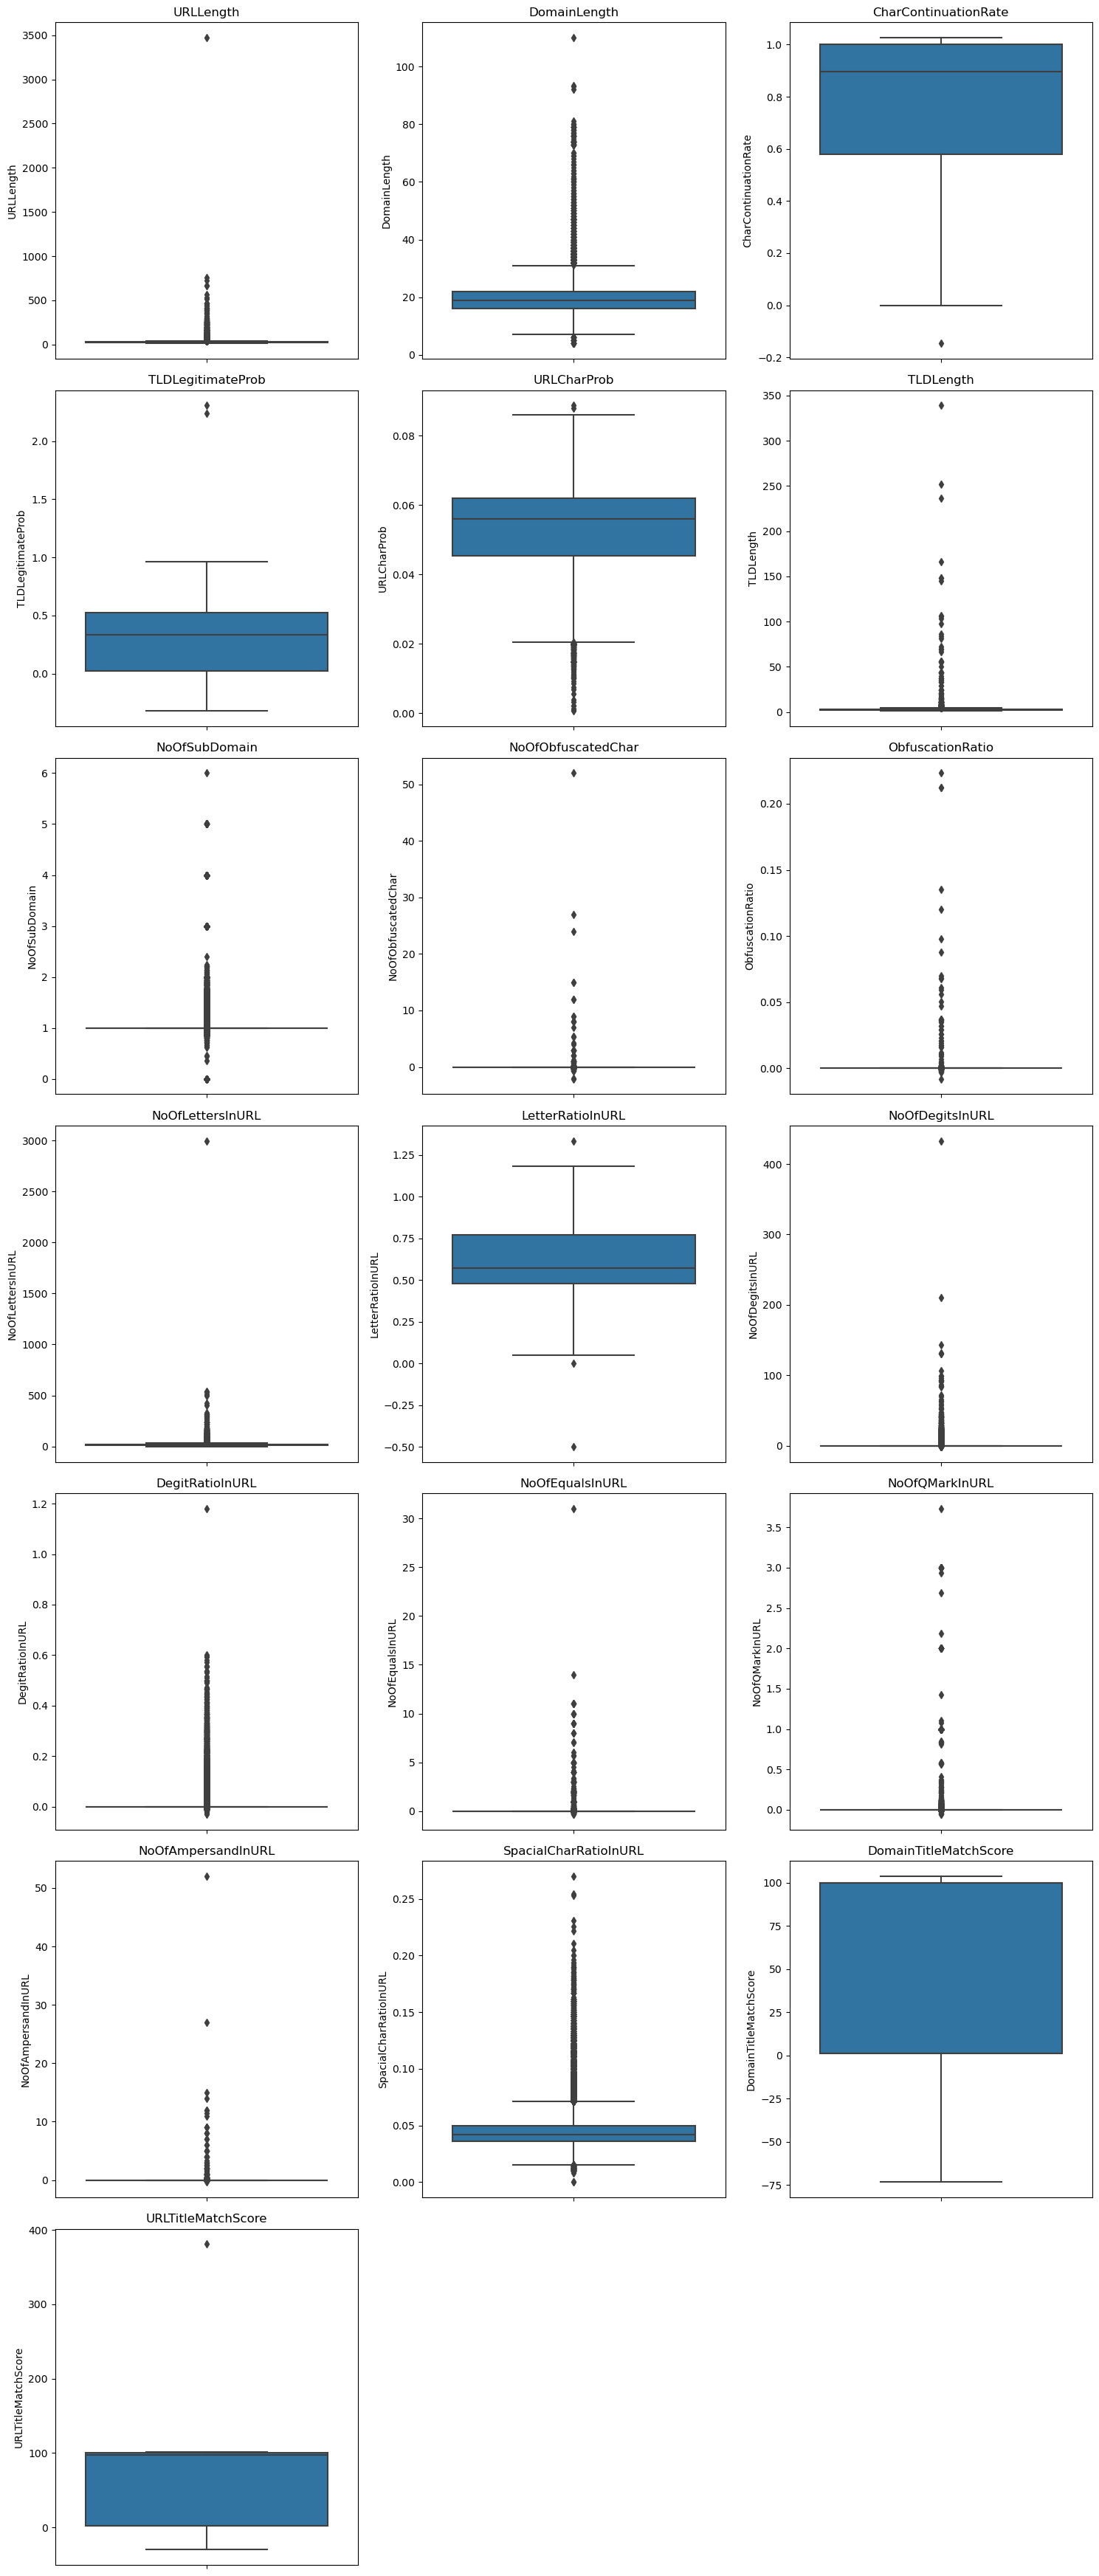

In [68]:
# Create a 3-column layout for the boxplots
num_plots = len(new_numerical_features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array if it's multi-dimensional
axes = axes.flatten()

for i, col in enumerate(new_numerical_features):
    sns.boxplot(y=nonull_df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Dari boxplot di atas ada beberapa hal yang perlu dipertimbangkan dalam outlier handlingnya:
1. Dari EDA tugas kecil, diketahui seharusnya semua fitur ini tidak ada yang nilainya negatif (nilai min semua kolom numerik di EDA itu >= 0)
2. Dari informasi poin 1 dan melihat distribusi outliernya, kita bisa mencoba transformasi log untuk yang rentangnya beda beberapa orde (misal URLLength, dari 0 sampai 3500, dari orde satuan sampai ribuan) dan mencoba transformasi sqrt untuk yang rentangnya kecil (hanya berbeda maksimal satu orde, misal TLDLegitimateProb dan NoOfQMarkInURL)

Ada juga satu catatan lain yang tidak berhubungan dengan outlier tapi kesalahan iterative imputer, fitur yang seharusnya diskrit jadi punya nilai yang kontinu. Ini sebaiknya diperbaiki sebelum melakukan transformasi.

In [69]:
# perbaiki fitur diskrit
for col in new_numerical_features:
    if 'NoOf' in col or 'Length' in col:
        nonull_df[col] = nonull_df[col].astype(int)

In [70]:
# Drop rows with negative values in new_numerical_features
nonull_df = nonull_df[(nonull_df[new_numerical_features] >= 0).all(axis=1)].reset_index(drop=True)

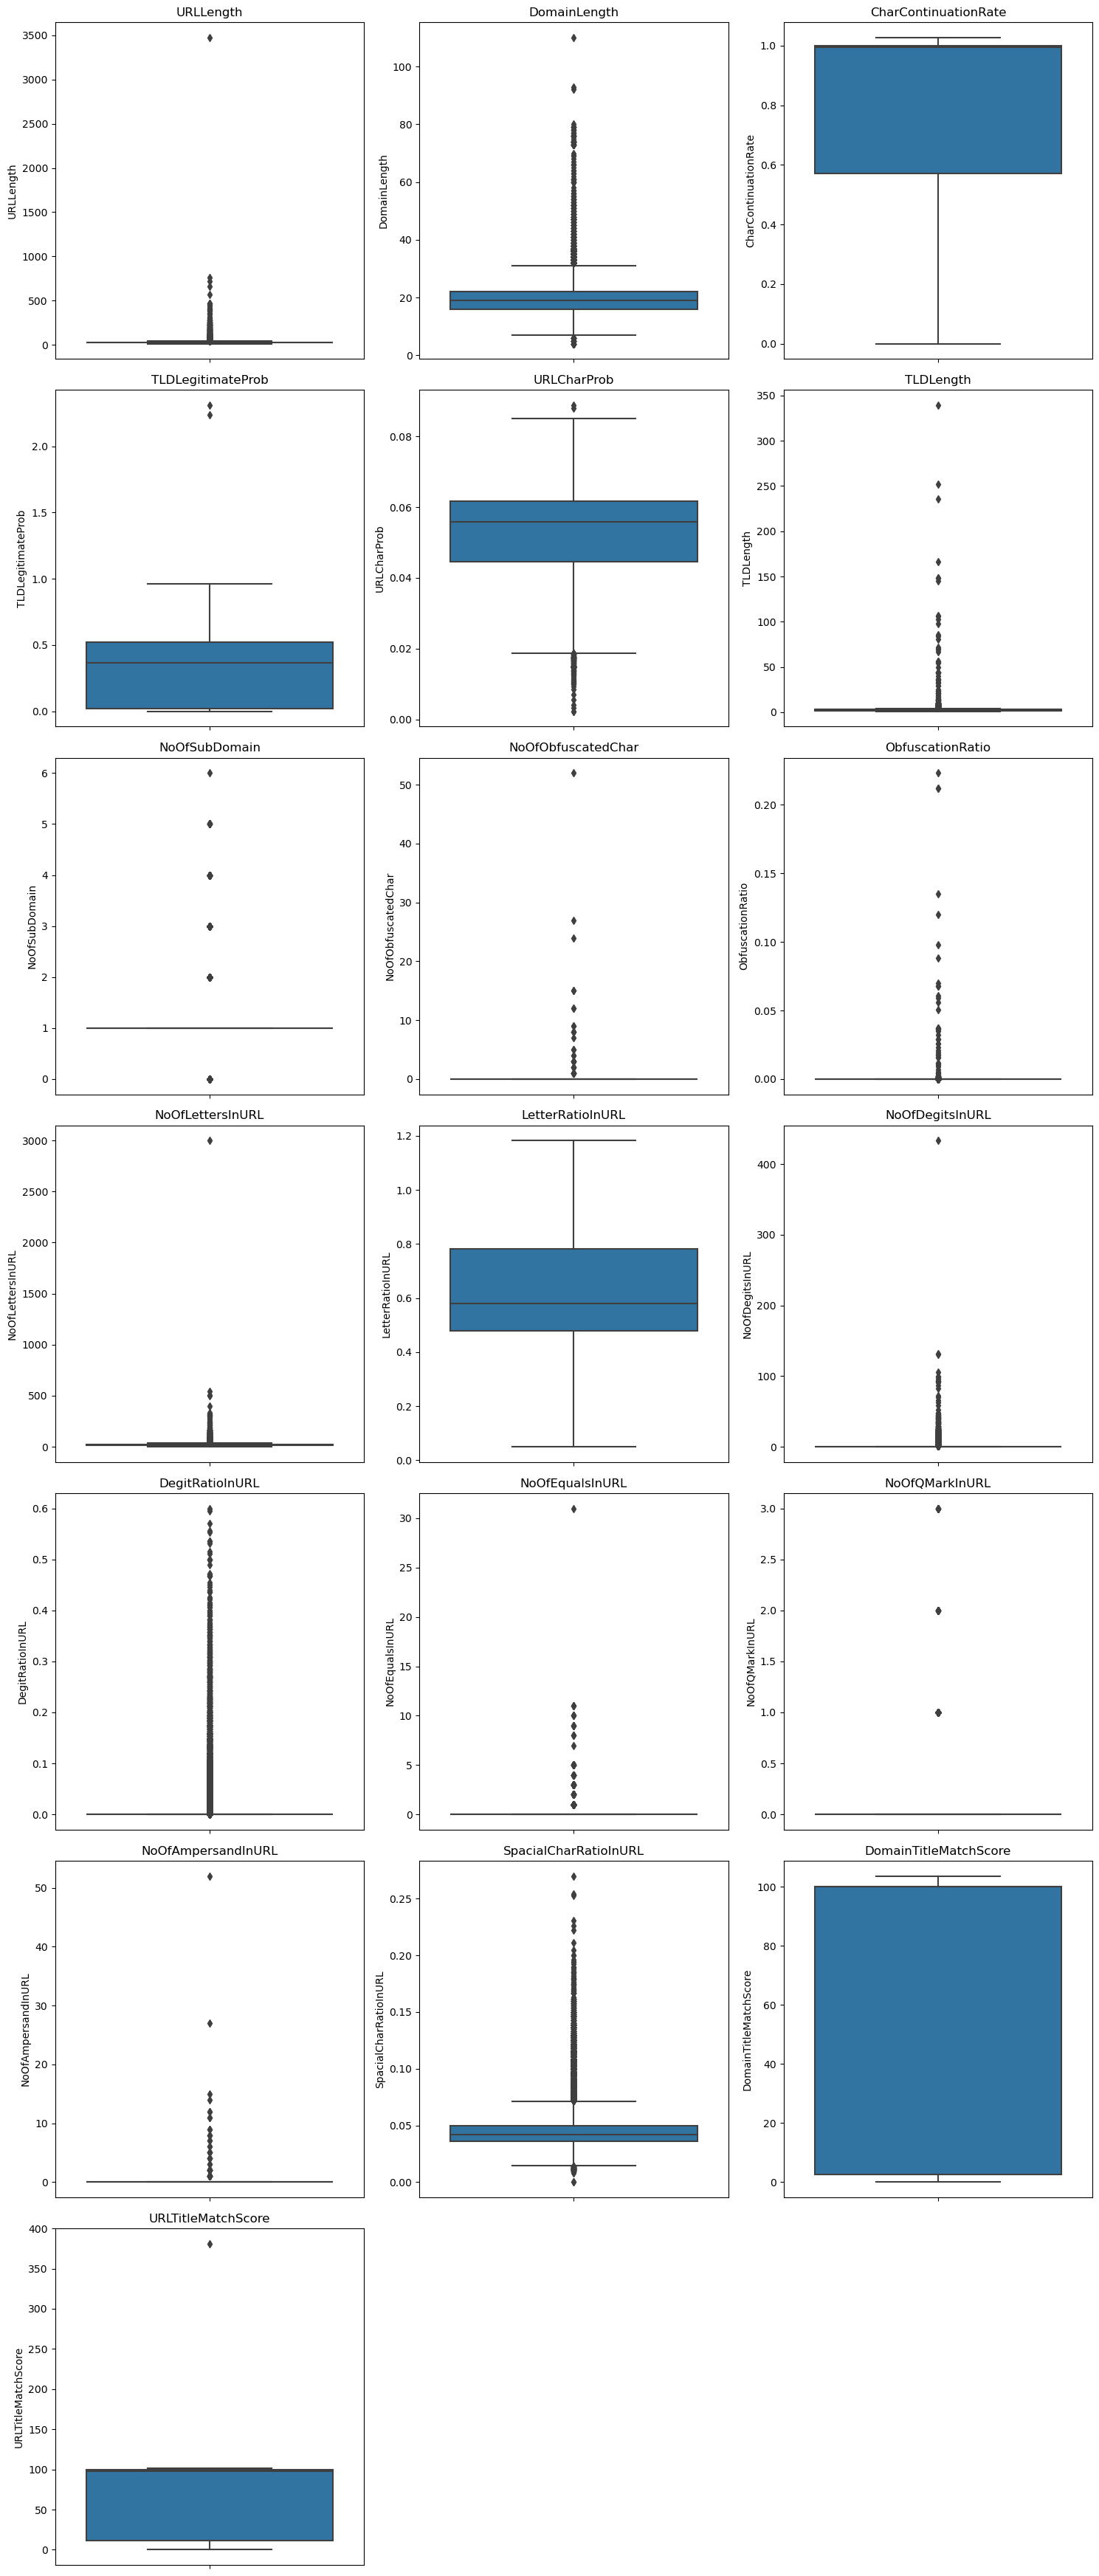

In [71]:
# Create a 3-column layout for the boxplots
num_plots = len(new_numerical_features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array if it's multi-dimensional
axes = axes.flatten()

for i, col in enumerate(new_numerical_features):
    sns.boxplot(y=nonull_df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [72]:
def range_based_transformation(df, log_threshold=100, sqrt_threshold=100):
    """
    Applies log transformation to columns with wide ranges (> log_threshold) 
    and sqrt transformation to columns with smaller ranges (<= sqrt_threshold).
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        log_threshold (int): The minimum range for applying log transformation.
        sqrt_threshold (int): The maximum range for applying sqrt transformation.
    """

    df_copy = df.copy()

    for col in df_copy.select_dtypes(include=[np.number]).columns:
        # Skip columns with negative values
        if (df_copy[col] < 0).any():
            print(f"Skipping {col} due to negative values.")
            continue
        
        # Calculate the range
        col_range = df_copy[col].max() - df_copy[col].min()
        
        if col_range > log_threshold:
            # Apply log transformation for wide ranges
            print(f"Applying log transformation on '{col}' (Range: {col_range})")
            df_copy[col] = np.log1p(df_copy[col])
        
        elif col_range <= sqrt_threshold:
            # Apply sqrt transformation for small ranges
            print(f"Applying sqrt transformation on '{col}' (Range: {col_range})")
            df_copy[col] = np.sqrt(df_copy[col])
        
        else:
            # No transformation needed
            print(f"No transformation applied on '{col}' (Range: {col_range})")
    
    return df_copy

# Example usage
outtransform_df = range_based_transformation(nonull_df)


Applying log transformation on 'URLLength' (Range: 3460)
Applying log transformation on 'DomainLength' (Range: 106)
Applying sqrt transformation on 'IsDomainIP' (Range: 1.0)
Applying sqrt transformation on 'CharContinuationRate' (Range: 1.0264735318115372)
Applying sqrt transformation on 'TLDLegitimateProb' (Range: 2.3086789323196735)
Applying sqrt transformation on 'URLCharProb' (Range: 0.086507004)
Applying log transformation on 'TLDLength' (Range: 338)
Applying sqrt transformation on 'NoOfSubDomain' (Range: 6)
Applying sqrt transformation on 'HasObfuscation' (Range: 1)
Applying sqrt transformation on 'NoOfObfuscatedChar' (Range: 52)
Applying sqrt transformation on 'ObfuscationRatio' (Range: 0.22317596566523606)
Applying log transformation on 'NoOfLettersInURL' (Range: 2997)
Applying sqrt transformation on 'LetterRatioInURL' (Range: 1.1320697992795397)
Applying log transformation on 'NoOfDegitsInURL' (Range: 433)
Applying sqrt transformation on 'DegitRatioInURL' (Range: 0.6)
Applying

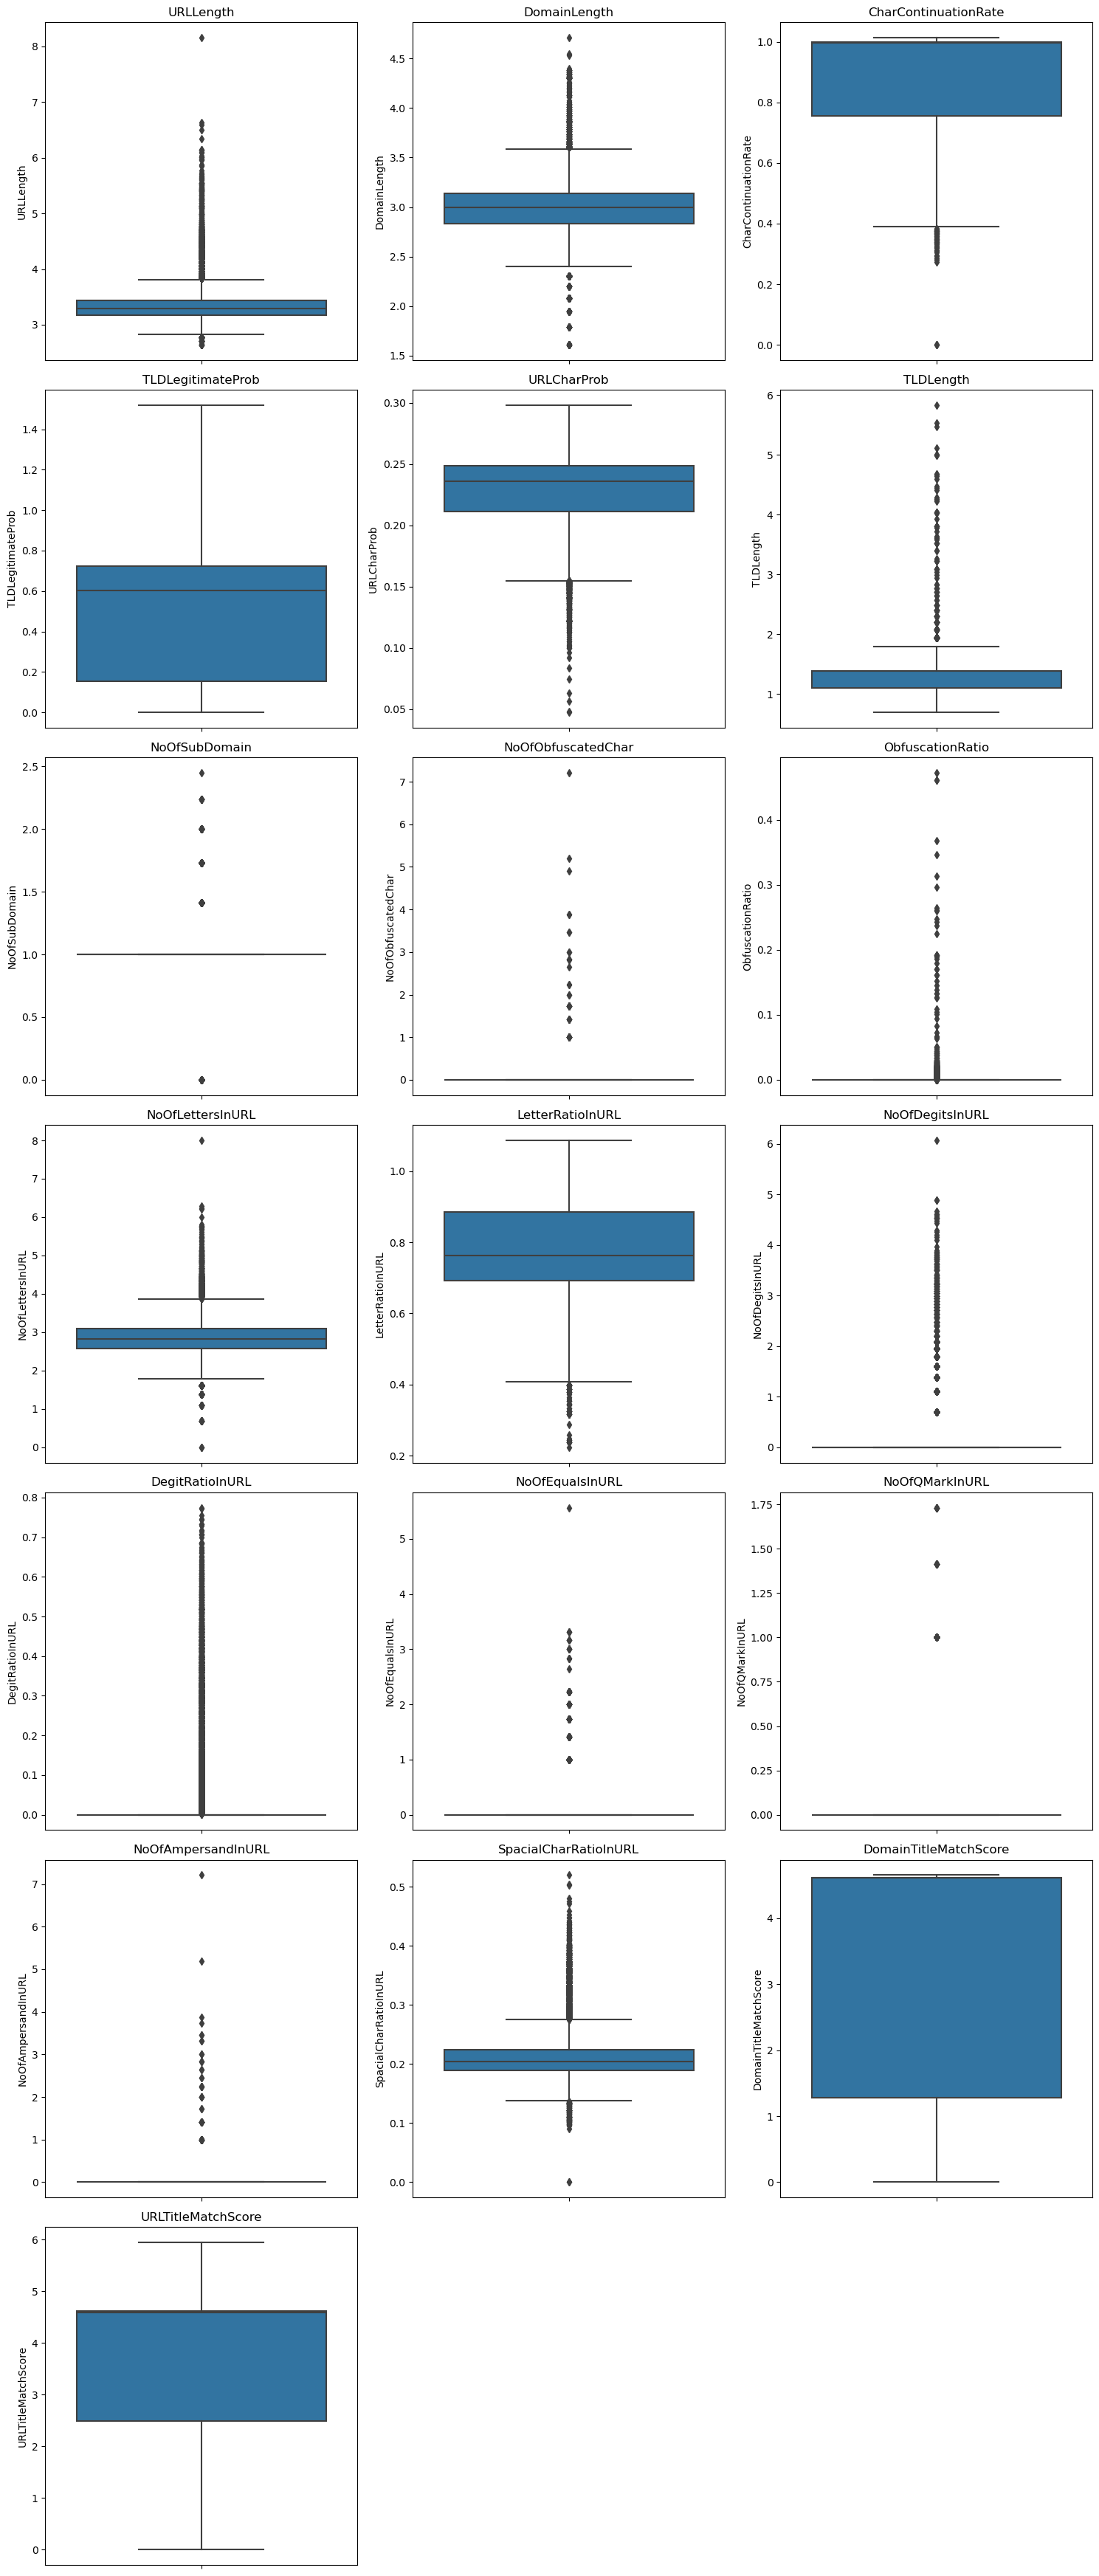

In [73]:
# Create a 3-column layout for the boxplots
num_plots = len(new_numerical_features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array if it's multi-dimensional
axes = axes.flatten()

for i, col in enumerate(new_numerical_features):
    sns.boxplot(y=outtransform_df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Terlihat bahwa transformasi tidak membuat outlier menjadi lebih sedikit, bahkan menurut kami distribusi outlier pada awalnya lebih tepat. Maka akan lebih baik dihapus outliernya berdasarkan nilai yang benar-benar pengecualian dan tidak masuk akal secara logis, contohnya menghapus nilai URLLength yang lebih dari 500 karena terlihat distribusinya mulai jarang-jarang (*sparse*) setelah melewati ambang batas tersebut. Lebih lanjut, bila dihapus nilai URLLength yang pengecualian, maka distribusi outlier pada kolom lain yang terkait URL juga seharusnya menyesuaikan.

In [74]:
nonull_df.shape

(100958, 26)

In [75]:
# Drop rows with URLLength >= 500
nonull_df = nonull_df.loc[nonull_df["URLLength"] < 500].reset_index(drop=True)

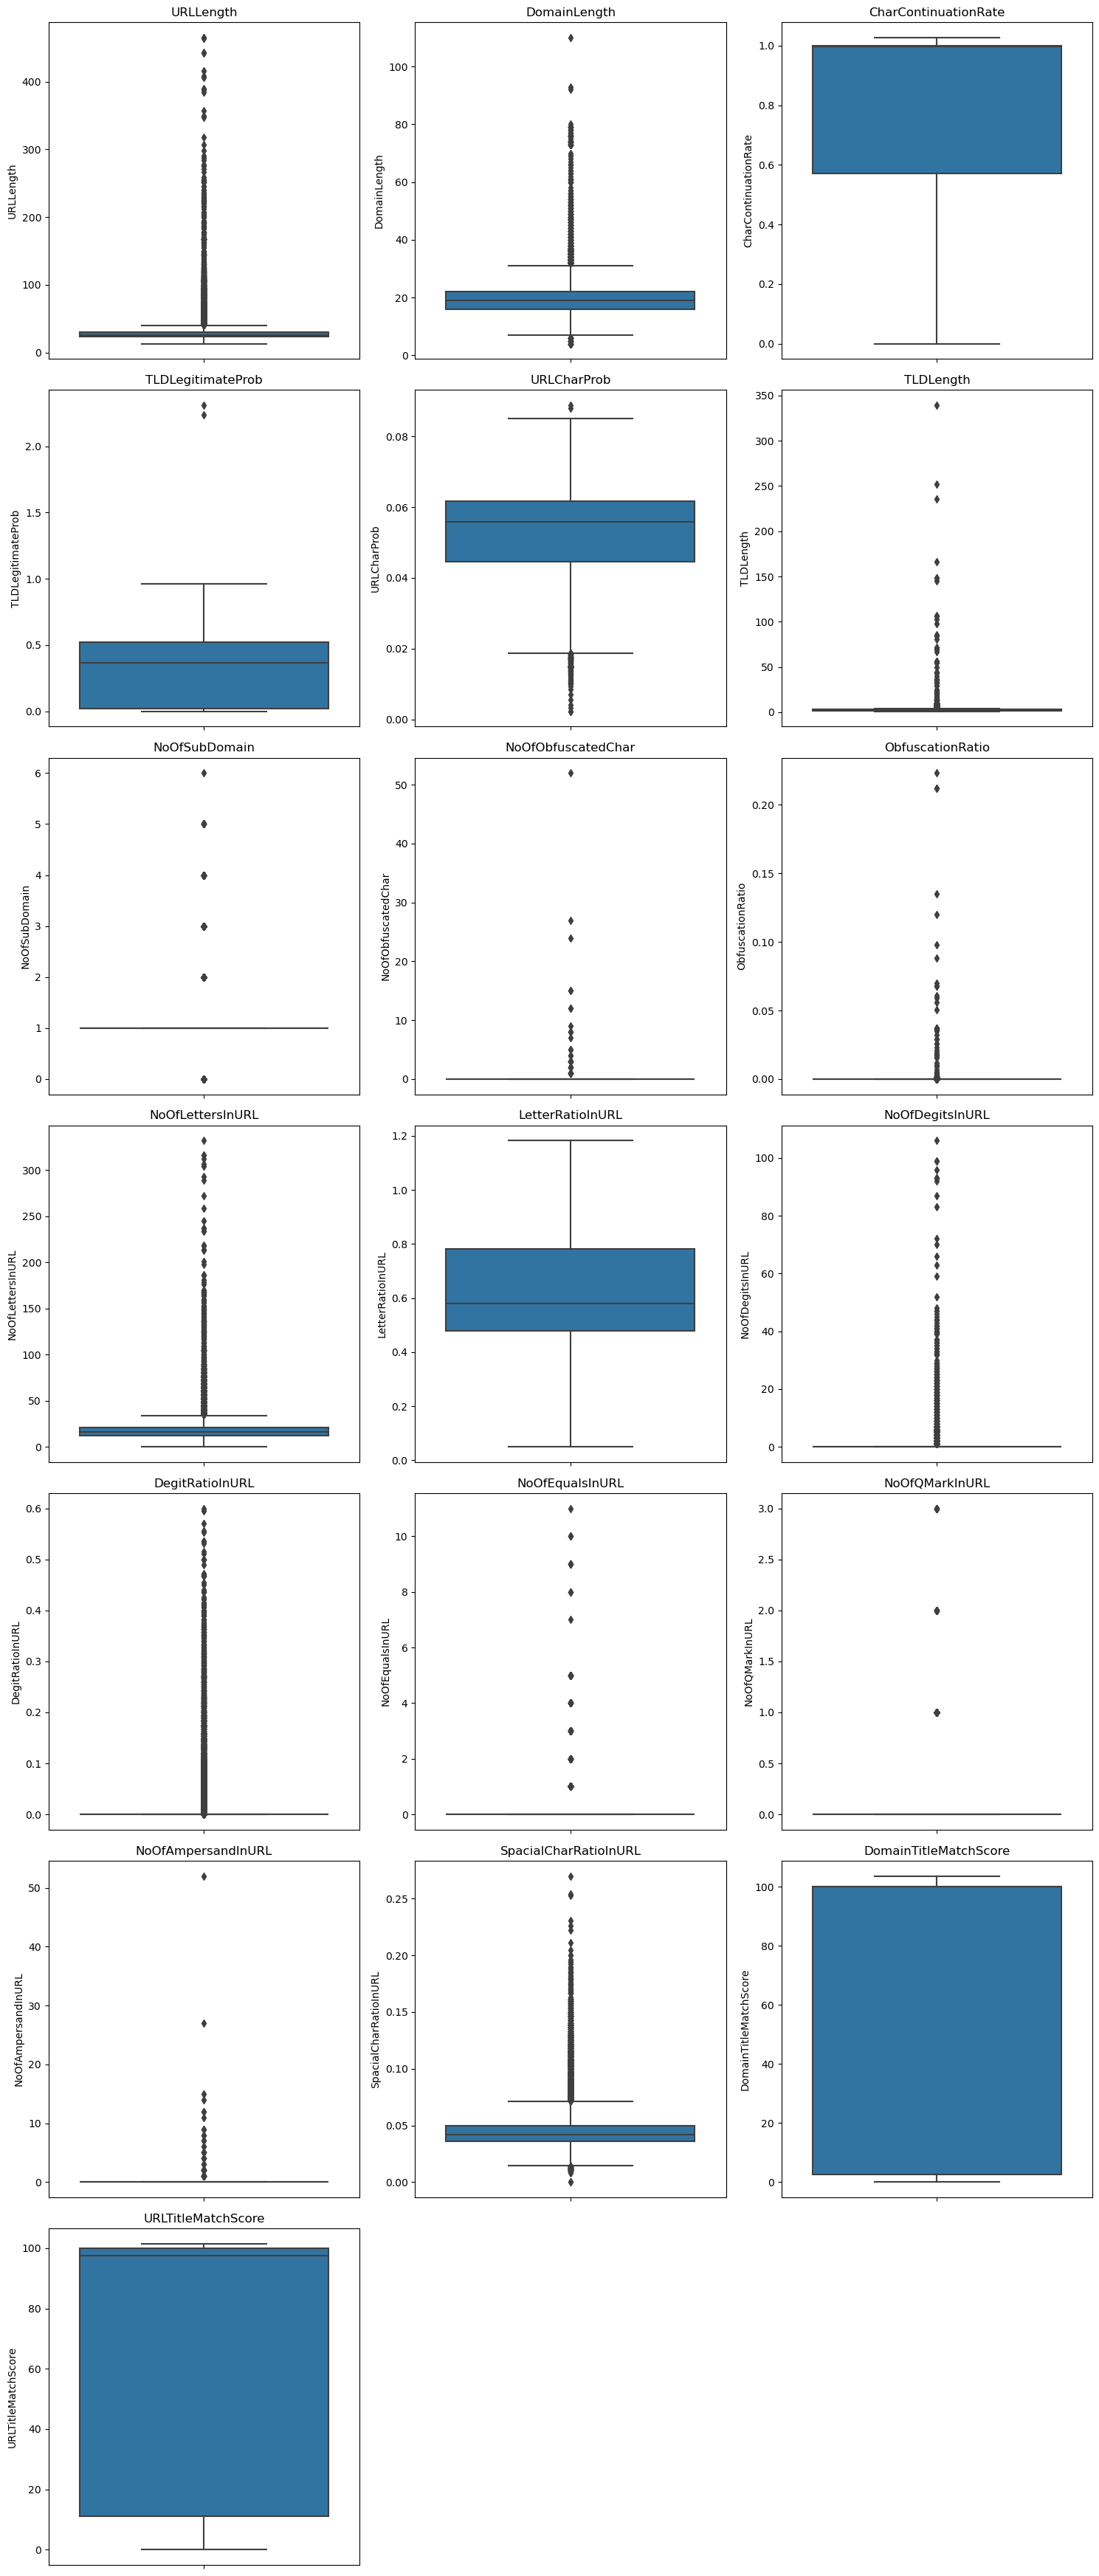

In [76]:
# Create a 3-column layout for the boxplots
num_plots = len(new_numerical_features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array if it's multi-dimensional
axes = axes.flatten()

for i, col in enumerate(new_numerical_features):
    sns.boxplot(y=nonull_df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [77]:
nonull_df.shape

(100953, 26)

Terlihat bahwa row yang didrop dengan syarat tadi masih cukup sedikit, hanya sekitar 3 row, berarti memang pengecualian. Dari distribusi outlier yang terakhir, yang masih bisa kami ubah adalah TLDLength yang terlihat pengecualiannya adalah yang di atas 100.

In [78]:
# Drop rows with TLDLength >= 100
nonull_df = nonull_df.loc[nonull_df["TLDLength"] < 100].reset_index(drop=True)

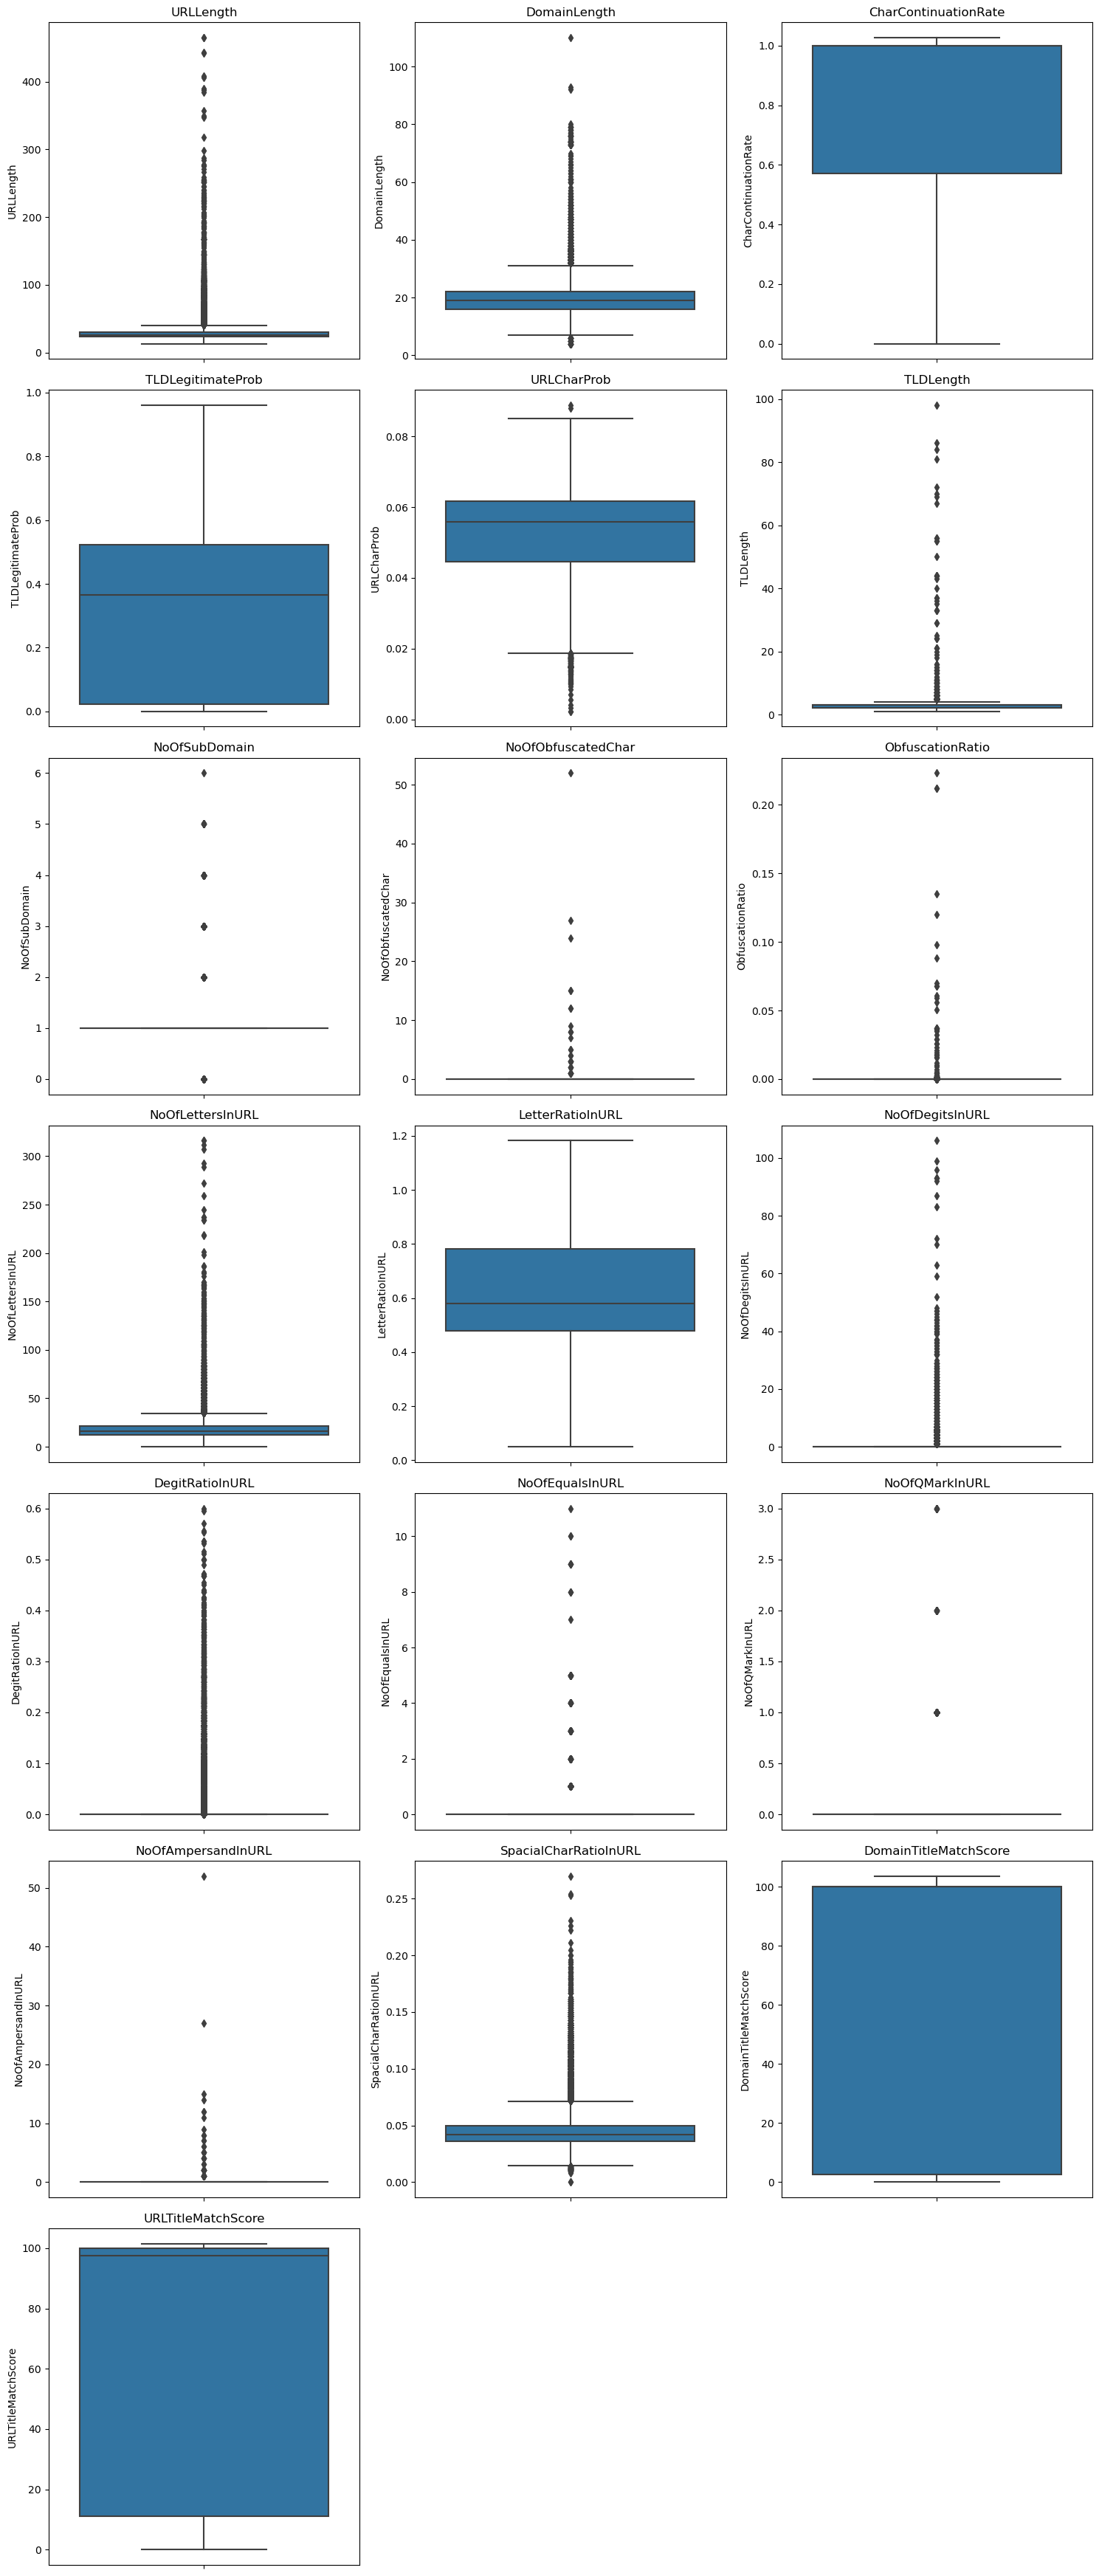

In [79]:
# Create a 3-column layout for the boxplots
num_plots = len(new_numerical_features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array if it's multi-dimensional
axes = axes.flatten()

for i, col in enumerate(new_numerical_features):
    sns.boxplot(y=nonull_df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [80]:
nonull_df.shape

(100943, 26)

ya, selanjutnya dilakukan proses yang sama untuk semua kolom yang terlihat masih ada "pengecualian" secara logis.

In [81]:
# Drop rows with DomainLength >= 80
nonull_df = nonull_df.loc[nonull_df["DomainLength"] < 80].reset_index(drop=True)

In [82]:
# Drop rows with URLCharProb >= 0.08
nonull_df = nonull_df.loc[nonull_df["URLCharProb"] < 0.08].reset_index(drop=True)

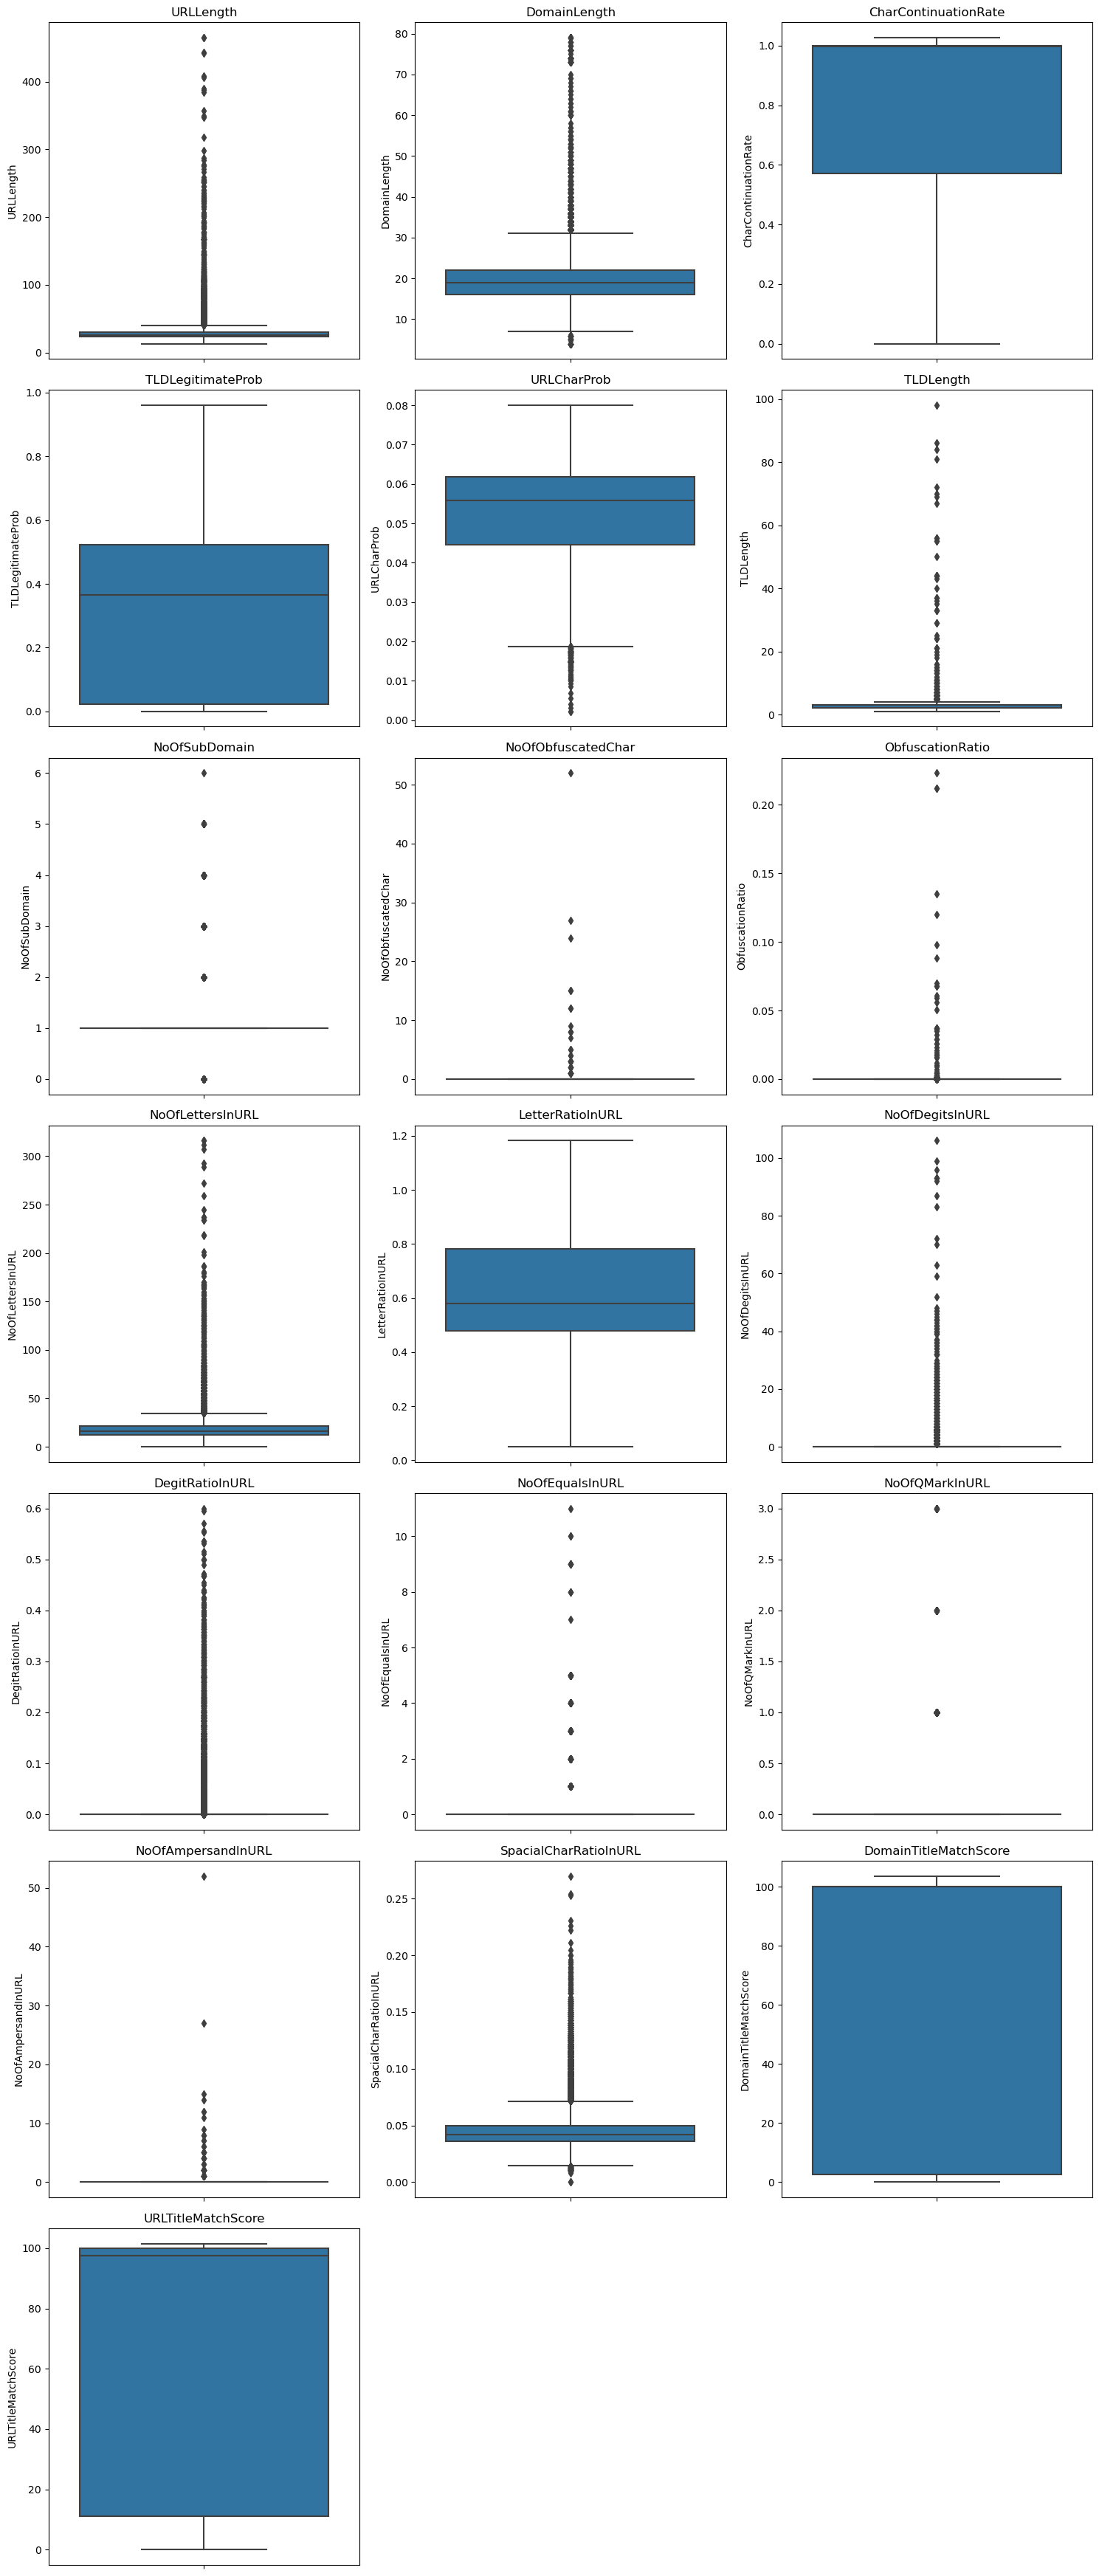

In [83]:
# Create a 3-column layout for the boxplots
num_plots = len(new_numerical_features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array if it's multi-dimensional
axes = axes.flatten()

for i, col in enumerate(new_numerical_features):
    sns.boxplot(y=nonull_df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [84]:
nonull_df.shape

(100873, 26)

In [85]:
# Drop rows with ObfuscationRatio >= 0.10
nonull_df = nonull_df.loc[nonull_df["ObfuscationRatio"] < 0.10].reset_index(drop=True)

In [86]:
# Drop rows with NoOfAmpersandInURL >= 15
nonull_df = nonull_df.loc[nonull_df["NoOfAmpersandInURL"] < 15].reset_index(drop=True)

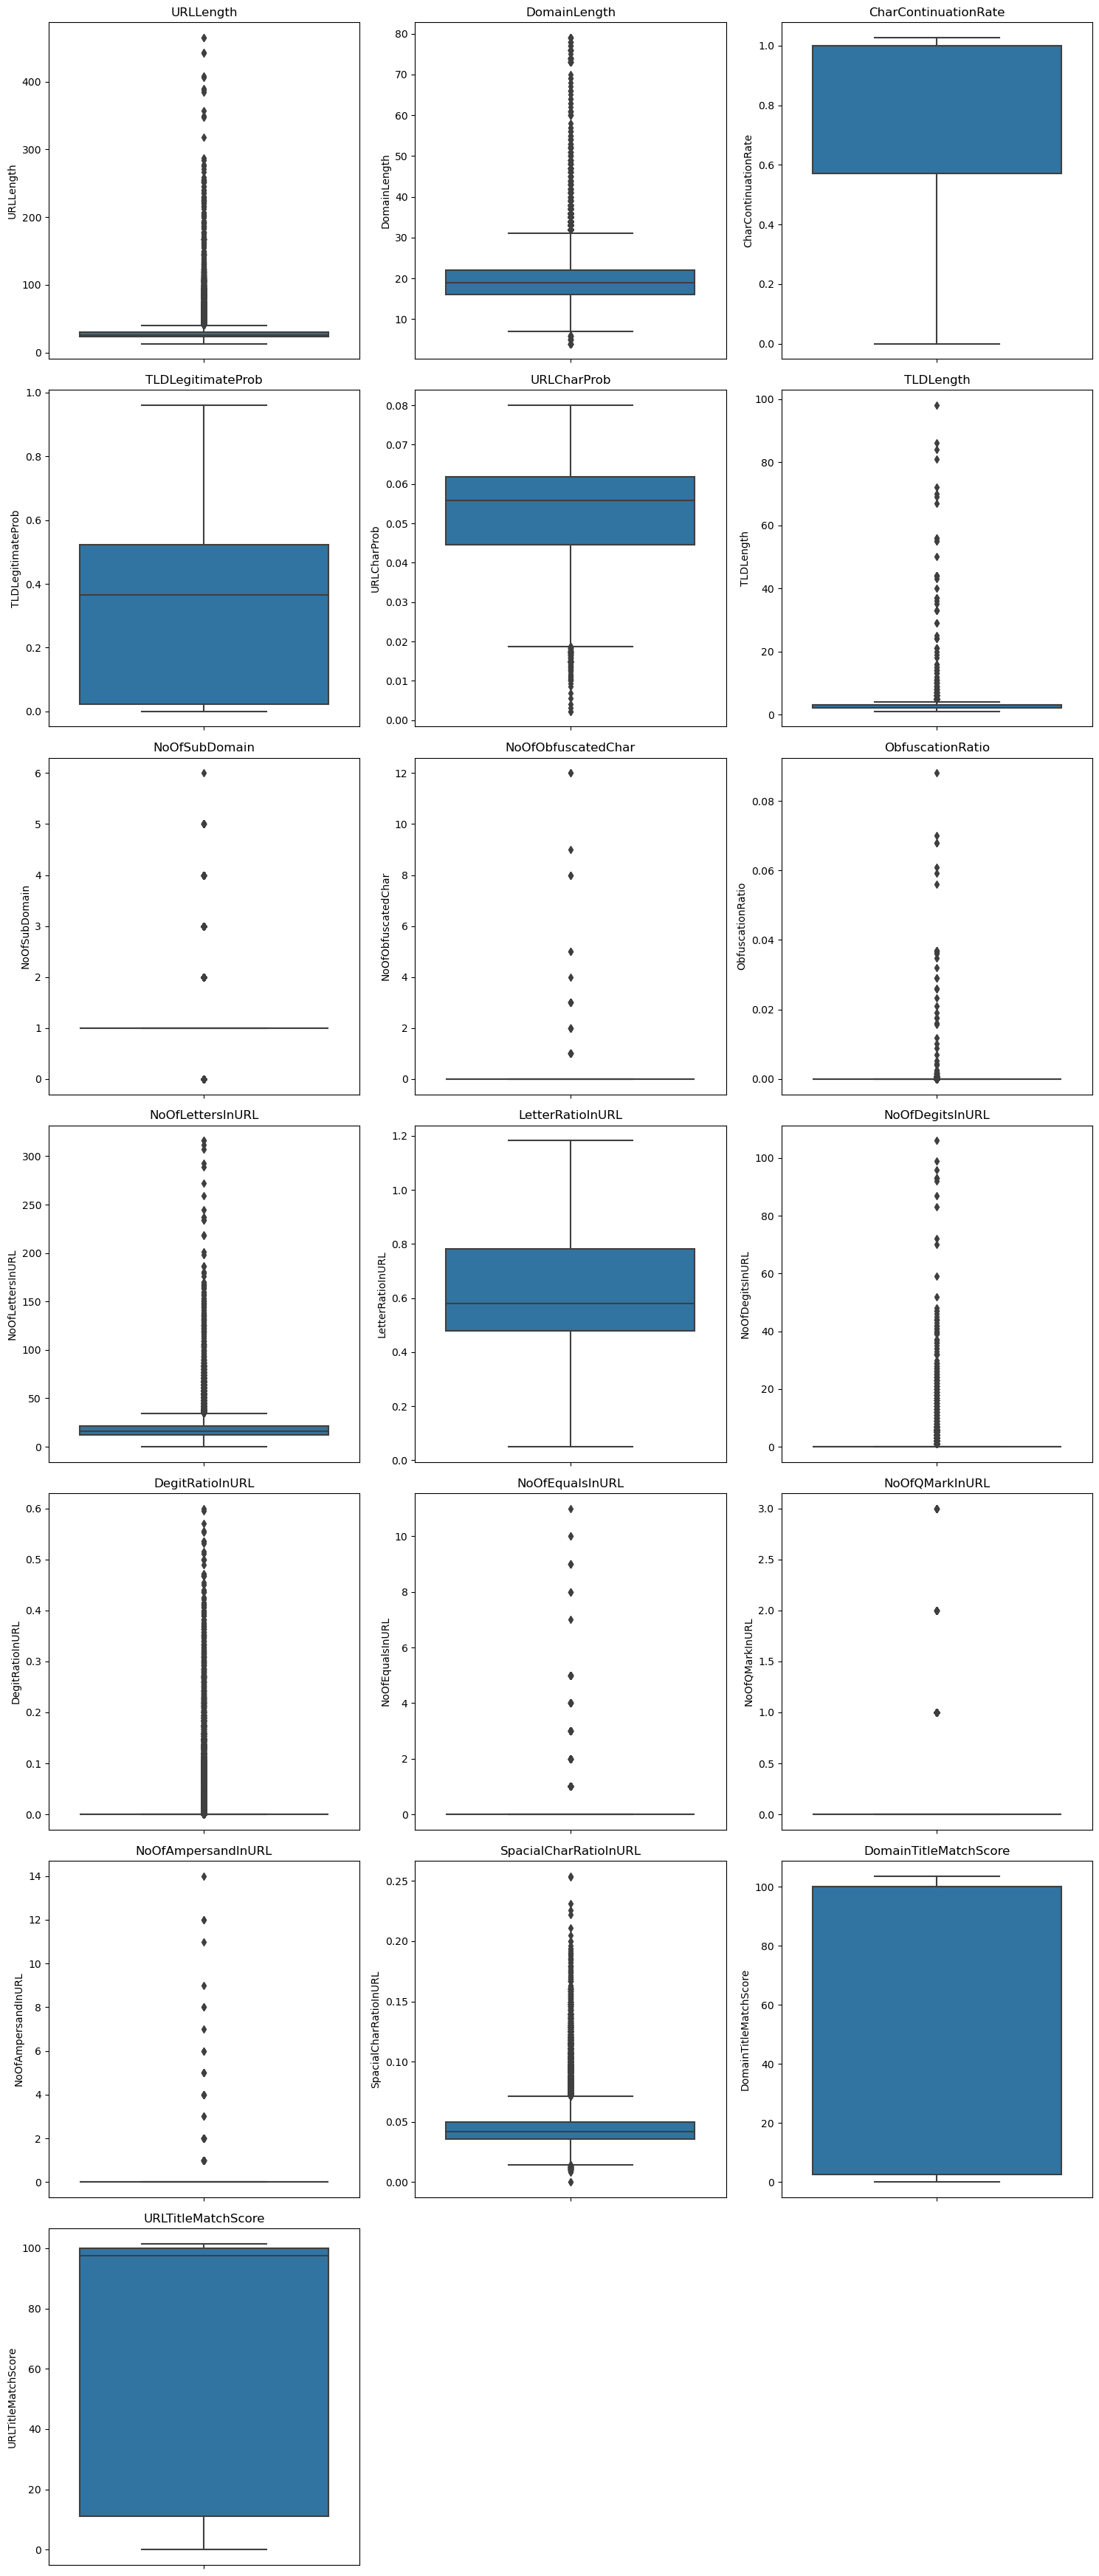

In [87]:
# Create a 3-column layout for the boxplots
num_plots = len(new_numerical_features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array if it's multi-dimensional
axes = axes.flatten()

for i, col in enumerate(new_numerical_features):
    sns.boxplot(y=nonull_df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [88]:
nonull_df.shape

(100866, 26)

Terlihat distribusi nilainya sekarnag lebih baik, walaupun masih ada nilai yang di luar Q3+1.5IQR dan Q1-1.5IQR tapi tidak ada nilai yang secara signifikan terlihat seperti pengecualian atau "aneh".

In [89]:
noout_df = nonull_df.copy()

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [90]:
noout_df.duplicated().sum()

397

In [91]:
noout_df = noout_df.drop_duplicates()

noout_df.duplicated().sum()

0

In [92]:
nodup_df = noout_df.copy()

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

Bagian Feature Engineering, kami akan melakukan pembuatan fitur baru terlebih dahulu, kemudian melakukan feature selection. Pembuatan fitur baru akan memanfaatkan pengetahuan-pengetahuan domain.

#### Domain-Specific Feature

In [93]:
nodup_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100469 entries, 0 to 100864
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URLLength              100469 non-null  int32  
 1   DomainLength           100469 non-null  int32  
 2   IsDomainIP             100469 non-null  float64
 3   TLD                    100469 non-null  object 
 4   CharContinuationRate   100469 non-null  float64
 5   TLDLegitimateProb      100469 non-null  float64
 6   URLCharProb            100469 non-null  float64
 7   TLDLength              100469 non-null  int32  
 8   NoOfSubDomain          100469 non-null  int32  
 9   HasObfuscation         100469 non-null  int32  
 10  NoOfObfuscatedChar     100469 non-null  int32  
 11  ObfuscationRatio       100469 non-null  float64
 12  NoOfLettersInURL       100469 non-null  int32  
 13  LetterRatioInURL       100469 non-null  float64
 14  NoOfDegitsInURL        100469 non-null  i

In [94]:
nodup_df.head(10)

,URLLength,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,SpacialCharRatioInURL,IsHTTPS,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,IsResponsive,label
0,24,17,0.0,.com,0.480000,0.522907,0.040800,4,1,0,...,0,0,0,0.040000,1.0,1.0,100.000000,100.000000,1.0,1
1,33,26,0.0,.org,1.000000,0.079963,0.057792,4,1,0,...,0,0,0,0.030000,1.0,1.0,100.000000,94.736842,1.0,1
2,24,17,0.0,com,0.480000,0.522907,0.067413,3,1,0,...,0,0,0,0.040000,True,1.0,100.000000,100.000000,1.0,1
3,29,22,0.0,org,0.782003,0.079963,0.053553,3,1,0,...,0,0,0,0.052589,1.0,1.0,0.000000,0.000000,1.0,1
4,19,16,0.0,com,0.822437,0.172464,0.068855,2,1,0,...,0,0,0,0.053113,1.0,1.0,0.000000,0.000000,1.0,1
5,19,12,0.0,.com,1.000000,0.522907,0.061459,3,1,0,...,0,0,0,0.050000,1.0,1.0,100.000000,97.652556,1.0,1
6,32,26,0.0,com,1.000000,0.522907,0.058336,3,1,0,...,0,0,0,0.034372,1.0,1.0,78.736464,77.747494,1.0,1
7,29,21,0.0,au,0.896552,0.010086,0.064654,2,1,0,...,0,0,0,0.047000,1.0,1.0,0.344498,0.000000,1.0,1
8,24,16,0.0,com,1.000000,0.522907,0.062538,3,1,0,...,0,0,0,0.043000,1.0,1.0,0.000000,0.000000,1.0,1
9,35,27,0.0,com,1.000000,0.522907,0.047429,3,1,0,...,0,0,0,0.029000,True,1.0,100.000000,98.217822,0.0,1


1. Salah satu fitur yang bisa dibuat adalah rasio domain terhadap panjang URL. Rasionalisasi fitur: URL phishing biasanya memiliki path yang sangat panjang, sehingga ratio domain name terhadap URL nya biasanya lebih kecil

2. Kepadatan special char di porsi path dari URL. Rasionalisasi fitur: bagian path dari URL phishing biasanya lebih banyak mengandung karakter-karakter yang aneh

3. Rasio banyaknya subdomain dibanding domain length, biasanya semakin banyak subdomain dalam domain length yang pendek, maka semakin mencurigakan URL tersebut.

In [95]:
# 1. Rasio domain terhadap panjang URL
nodup_df["RatioDomainToURL"] = nodup_df["DomainLength"] / (nodup_df["URLLength"] + 1e-10)

# 2. Kepadatan special char dalam path URL
nodup_df["PathSpecialCharDensity"] = (nodup_df["SpacialCharRatioInURL"] * nodup_df["URLLength"] - nodup_df["DomainLength"]) / (nodup_df["URLLength"] - nodup_df["DomainLength"] + 1e-10)

# 3. Rasio subdomain dibanding domain length
nodup_df["SubdomainRatio"] = nodup_df["NoOfSubDomain"] / (nodup_df["DomainLength"] + 1e-10)

# penambahan 1e-10 untuk mengkompensasi keadaan pembagian dengan 0

In [96]:
for feat in ["RatioDomainToURL", "PathSpecialCharDensity", "SubdomainRatio"]:
    print(feat)
    if feat not in new_numerical_features:
        new_numerical_features.append(feat)

RatioDomainToURL
PathSpecialCharDensity
SubdomainRatio


In [97]:
new_numerical_features

['URLLength',
 'DomainLength',
 'CharContinuationRate',
 'TLDLegitimateProb',
 'URLCharProb',
 'TLDLength',
 'NoOfSubDomain',
 'NoOfObfuscatedChar',
 'ObfuscationRatio',
 'NoOfLettersInURL',
 'LetterRatioInURL',
 'NoOfDegitsInURL',
 'DegitRatioInURL',
 'NoOfEqualsInURL',
 'NoOfQMarkInURL',
 'NoOfAmpersandInURL',
 'SpacialCharRatioInURL',
 'DomainTitleMatchScore',
 'URLTitleMatchScore',
 'RatioDomainToURL',
 'PathSpecialCharDensity',
 'SubdomainRatio']

In [98]:
nodup_df[["RatioDomainToURL", "PathSpecialCharDensity", "SubdomainRatio"]].describe()

,RatioDomainToURL,PathSpecialCharDensity,SubdomainRatio
count,100469.000000,1.004690e+05,100469.000000
mean,0.716431,-4.705558e+07,0.060454
std,0.080392,3.155034e+09,0.025716
min,0.023077,-3.903485e+11,0.000000
25%,0.681818,-3.002000e+00,0.045455
50%,0.720000,-2.434066e+00,0.055556
75%,0.758621,-1.999857e+00,0.071429
max,1.095238,7.174128e+01,0.200000


#### Feature Selection

Untuk bagian feature selection, kami akan memilih dua metode yang umum dan mudah saja yaitu menggunakan korelasi untuk mengeliminasi fitur yang colinear dan menggunakan RFE untuk memilih fitur yang paling relevan dengan target.

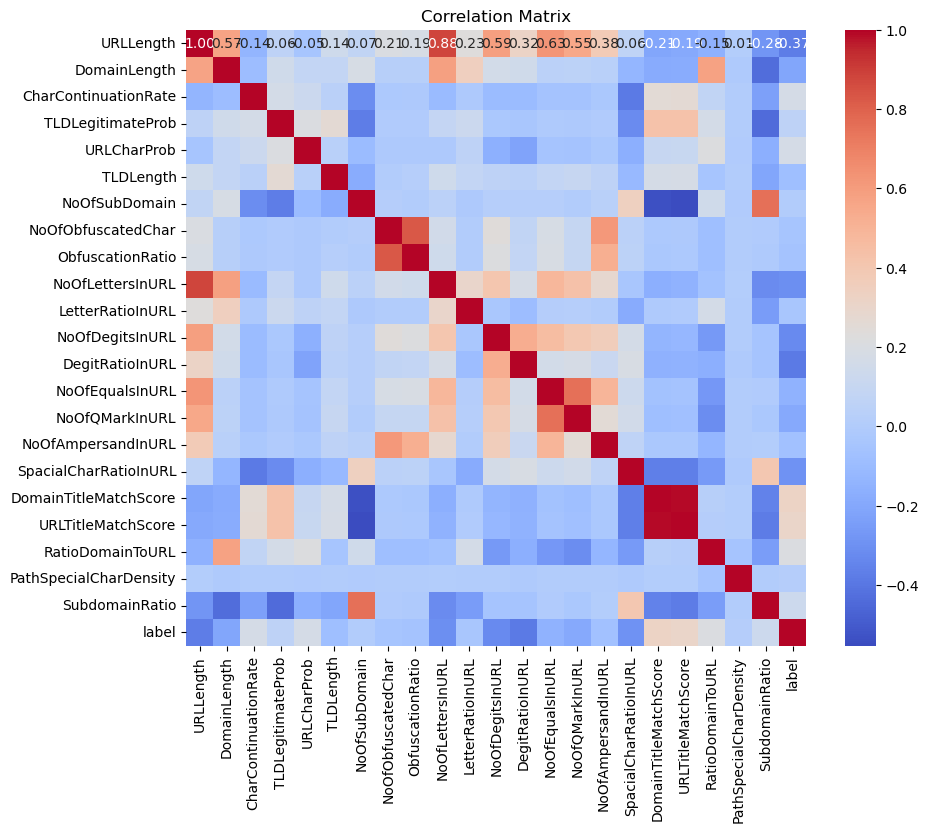

In [99]:
corr = nodup_df[new_numerical_features + ["label"]].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [100]:
# Drop self-correlations (diagonal values = 1)
correlation_pairs = corr.unstack().reset_index()
correlation_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
correlation_pairs['AbsCorrelation'] = correlation_pairs['Correlation'].abs()

# Sort by absolute correlation
most_correlated_pairs = correlation_pairs.sort_values(by='AbsCorrelation', ascending=False)

# Filter top pairs with high correlation (e.g., above 0.5)
top_correlated_pairs = most_correlated_pairs[(most_correlated_pairs['AbsCorrelation'] > 0.5) & (most_correlated_pairs['AbsCorrelation'] != 1)]
top_correlated_pairs

,Feature1,Feature2,Correlation,AbsCorrelation
431,URLTitleMatchScore,DomainTitleMatchScore,0.991629,0.991629
409,DomainTitleMatchScore,URLTitleMatchScore,0.991629,0.991629
9,URLLength,NoOfLettersInURL,0.878669,0.878669
207,NoOfLettersInURL,URLLength,0.878669,0.878669
169,NoOfObfuscatedChar,ObfuscationRatio,0.827482,0.827482
191,ObfuscationRatio,NoOfObfuscatedChar,0.827482,0.827482
159,NoOfSubDomain,SubdomainRatio,0.753173,0.753173
489,SubdomainRatio,NoOfSubDomain,0.753173,0.753173
313,NoOfEqualsInURL,NoOfQMarkInURL,0.753137,0.753137
335,NoOfQMarkInURL,NoOfEqualsInURL,0.753137,0.753137


In [101]:
multicolinear_features = top_correlated_pairs.head(10)["Feature1"].tolist()

In [102]:
mostcorr_label = corr["label"].abs().sort_values(ascending=False)
mostcorr_label

label                     1.000000
DegitRatioInURL           0.384850
URLLength                 0.371834
DomainTitleMatchScore     0.325454
NoOfDegitsInURL           0.324778
URLTitleMatchScore        0.306217
NoOfLettersInURL          0.305876
SpacialCharRatioInURL     0.293158
DomainLength              0.211343
RatioDomainToURL          0.210268
NoOfQMarkInURL            0.190243
CharContinuationRate      0.173505
URLCharProb               0.171061
NoOfEqualsInURL           0.148631
SubdomainRatio            0.130068
TLDLength                 0.083692
NoOfAmpersandInURL        0.068552
ObfuscationRatio          0.060416
TLDLegitimateProb         0.056486
NoOfObfuscatedChar        0.048967
LetterRatioInURL          0.038898
PathSpecialCharDensity    0.013508
NoOfSubDomain             0.002147
Name: label, dtype: float64

In [103]:
mostcorr_label["NoOfSubDomain"]

0.002146779065080099

terlihat bahwa ada 10 kolom numerikal dengan multicolinearity yang sangat tinggi. Maka kita eliminasi berdasarkan korelasinya dengan label.

In [104]:
multicolinear_columns_to_drop = []

for i in range(0, len(multicolinear_features)-1, 2):
    col1 = multicolinear_features[i]
    col2 = multicolinear_features[i+1]
    if mostcorr_label[col1] > mostcorr_label[col2]:
        multicolinear_columns_to_drop.append(col2)

print(multicolinear_columns_to_drop)

fsel_train_df1 = nodup_df.drop(multicolinear_columns_to_drop, axis=1)

fsel_train_df1.shape

['NoOfLettersInURL']


(100469, 28)

In [105]:
fsel_train_df1

,URLLength,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,SpacialCharRatioInURL,IsHTTPS,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,IsResponsive,label,RatioDomainToURL,PathSpecialCharDensity,SubdomainRatio
0,24,17,0.0,.com,0.480000,0.522907,0.040800,4,1,0,...,0.040000,1.0,1.0,100.000000,100.000000,1.0,1,0.708333,-2.291429,0.058824
1,33,26,0.0,.org,1.000000,0.079963,0.057792,4,1,0,...,0.030000,1.0,1.0,100.000000,94.736842,1.0,1,0.787879,-3.572857,0.038462
2,24,17,0.0,com,0.480000,0.522907,0.067413,3,1,0,...,0.040000,True,1.0,100.000000,100.000000,1.0,1,0.708333,-2.291429,0.058824
3,29,22,0.0,org,0.782003,0.079963,0.053553,3,1,0,...,0.052589,1.0,1.0,0.000000,0.000000,1.0,1,0.758621,-2.924989,0.045455
4,19,16,0.0,com,0.822437,0.172464,0.068855,2,1,0,...,0.053113,1.0,1.0,0.000000,0.000000,1.0,1,0.842105,-4.996952,0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100860,31,23,0.0,com,0.580645,0.522907,0.060076,3,1,0,...,0.033000,True,1.0,101.772733,100.000000,1.0,1,0.741935,-2.747125,0.043478
100861,29,22,0.0,be,0.743707,0.003319,0.056749,2,1,0,...,0.069000,1.0,1.0,100.684937,100.000000,1.0,1,0.758621,-2.857000,0.045455
100862,45,38,0.0,.com,0.400000,0.522907,0.062988,4,1,0,...,0.086957,1.0,1.0,100.000000,100.000000,1.0,1,0.844444,-4.869565,0.026316
100863,22,15,0.0,com,0.878863,0.307660,0.055862,3,1,0,...,0.045000,1.0,1.0,100.000000,100.000000,1.0,1,0.681818,-2.001429,0.066667


In [106]:
fsel_train_df1.columns

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'TLD',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'HasTitle',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'IsResponsive', 'label',
       'RatioDomainToURL', 'PathSpecialCharDensity', 'SubdomainRatio'],
      dtype='object')

In [107]:
len(fsel_train_df1.columns)

28

Akhirnya tereliminasi 2 kolom, menyisakan 27 kolom kandidat

Selanjutnya adalah seleksi dengan RFE, metodenya **bukan** menggunakan RFE untuk mengeliminasi dari 27 fitur kandidat, melainkan mencari fitur yang terbaik menurut RFE dan membandingkannya dengan hasil korelasi

In [108]:
RFEmodel = RandomForestClassifier(n_estimators=100, random_state=182)

rfe = RFE(estimator=RFEmodel, n_features_to_select=(len(fsel_train_df1.columns)-len(new_categorical_features)), step=1)
rfe.fit(nodup_df[new_numerical_features], nodup_df["label"])

RFE(estimator=RandomForestClassifier(random_state=182), n_features_to_select=22)

In [109]:
# Results
print("Feature Ranking:", rfe.ranking_)  # Rank of each feature (1 = selected)
print("Selected Features (1 = True):", rfe.support_)
print("Selected Feature Indices:", [i for i, x in enumerate(rfe.support_) if x])

Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Selected Features (1 = True): [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
Selected Feature Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [110]:
new_numerical_features

['URLLength',
 'DomainLength',
 'CharContinuationRate',
 'TLDLegitimateProb',
 'URLCharProb',
 'TLDLength',
 'NoOfSubDomain',
 'NoOfObfuscatedChar',
 'ObfuscationRatio',
 'NoOfLettersInURL',
 'LetterRatioInURL',
 'NoOfDegitsInURL',
 'DegitRatioInURL',
 'NoOfEqualsInURL',
 'NoOfQMarkInURL',
 'NoOfAmpersandInURL',
 'SpacialCharRatioInURL',
 'DomainTitleMatchScore',
 'URLTitleMatchScore',
 'RatioDomainToURL',
 'PathSpecialCharDensity',
 'SubdomainRatio']

In [111]:
fsel_train_df2 = pd.concat([nodup_df[new_numerical_features].iloc[:, rfe.support_], nodup_df[new_categorical_features], nodup_df["label"]], axis=1)
fsel_train_df2

,URLLength,DomainLength,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,...,RatioDomainToURL,PathSpecialCharDensity,SubdomainRatio,IsDomainIP,TLD,HasObfuscation,IsHTTPS,HasTitle,IsResponsive,label
0,24,17,0.480000,0.522907,0.040800,4,1,0,0.0,20,...,0.708333,-2.291429,0.058824,0.0,.com,0,1.0,1.0,1.0,1
1,33,26,1.000000,0.079963,0.057792,4,1,0,0.0,20,...,0.787879,-3.572857,0.038462,0.0,.org,0,1.0,1.0,1.0,1
2,24,17,0.480000,0.522907,0.067413,3,1,0,0.0,20,...,0.708333,-2.291429,0.058824,0.0,com,0,True,1.0,1.0,1
3,29,22,0.782003,0.079963,0.053553,3,1,0,0.0,16,...,0.758621,-2.924989,0.045455,0.0,org,0,1.0,1.0,1.0,1
4,19,16,0.822437,0.172464,0.068855,2,1,0,0.0,10,...,0.842105,-4.996952,0.062500,0.0,com,0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100860,31,23,0.580645,0.522907,0.060076,3,1,0,0.0,26,...,0.741935,-2.747125,0.043478,0.0,com,0,True,1.0,1.0,1
100861,29,22,0.743707,0.003319,0.056749,2,1,0,0.0,15,...,0.758621,-2.857000,0.045455,0.0,be,0,1.0,1.0,1.0,1
100862,45,38,0.400000,0.522907,0.062988,4,1,0,0.0,29,...,0.844444,-4.869565,0.026316,0.0,.com,0,1.0,1.0,1.0,1
100863,22,15,0.878863,0.307660,0.055862,3,1,0,0.0,9,...,0.681818,-2.001429,0.066667,0.0,com,0,1.0,1.0,1.0,1


Didapatkan 28 fitur tersisa, sekarang kita cari fitur yang beririsan dari hasil RFE dan korelasi

In [112]:
same_col_count = 0
col_to_keep = []
for col1 in fsel_train_df1:
    for col2 in fsel_train_df2:
        if col1 == col2:
            same_col_count += 1
            if col1 not in col_to_keep:
                col_to_keep.append(col1)
            print(f"{col1} are present in both dataframes.")
print("Total number of same columns:", same_col_count)

URLLength are present in both dataframes.
DomainLength are present in both dataframes.
IsDomainIP are present in both dataframes.
TLD are present in both dataframes.
CharContinuationRate are present in both dataframes.
TLDLegitimateProb are present in both dataframes.
URLCharProb are present in both dataframes.
TLDLength are present in both dataframes.
NoOfSubDomain are present in both dataframes.
HasObfuscation are present in both dataframes.
NoOfObfuscatedChar are present in both dataframes.
ObfuscationRatio are present in both dataframes.
LetterRatioInURL are present in both dataframes.
NoOfDegitsInURL are present in both dataframes.
DegitRatioInURL are present in both dataframes.
NoOfEqualsInURL are present in both dataframes.
NoOfQMarkInURL are present in both dataframes.
NoOfAmpersandInURL are present in both dataframes.
SpacialCharRatioInURL are present in both dataframes.
IsHTTPS are present in both dataframes.
HasTitle are present in both dataframes.
DomainTitleMatchScore are 

fitur yang beririsan akan disimpan dalam variabel col_to_keep

In [113]:
col_to_keep

['URLLength',
 'DomainLength',
 'IsDomainIP',
 'TLD',
 'CharContinuationRate',
 'TLDLegitimateProb',
 'URLCharProb',
 'TLDLength',
 'NoOfSubDomain',
 'HasObfuscation',
 'NoOfObfuscatedChar',
 'ObfuscationRatio',
 'LetterRatioInURL',
 'NoOfDegitsInURL',
 'DegitRatioInURL',
 'NoOfEqualsInURL',
 'NoOfQMarkInURL',
 'NoOfAmpersandInURL',
 'SpacialCharRatioInURL',
 'IsHTTPS',
 'HasTitle',
 'DomainTitleMatchScore',
 'URLTitleMatchScore',
 'IsResponsive',
 'label',
 'RatioDomainToURL',
 'PathSpecialCharDensity',
 'SubdomainRatio']

In [114]:
nodup_df = nodup_df[col_to_keep].copy()

In [115]:
nodup_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100469 entries, 0 to 100864
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   URLLength               100469 non-null  int32  
 1   DomainLength            100469 non-null  int32  
 2   IsDomainIP              100469 non-null  float64
 3   TLD                     100469 non-null  object 
 4   CharContinuationRate    100469 non-null  float64
 5   TLDLegitimateProb       100469 non-null  float64
 6   URLCharProb             100469 non-null  float64
 7   TLDLength               100469 non-null  int32  
 8   NoOfSubDomain           100469 non-null  int32  
 9   HasObfuscation          100469 non-null  int32  
 10  NoOfObfuscatedChar      100469 non-null  int32  
 11  ObfuscationRatio        100469 non-null  float64
 12  LetterRatioInURL        100469 non-null  float64
 13  NoOfDegitsInURL         100469 non-null  int32  
 14  DegitRatioInURL         1

In [116]:
nodup_df.describe(include="all")

,URLLength,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,SpacialCharRatioInURL,IsHTTPS,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,IsResponsive,label,RatioDomainToURL,PathSpecialCharDensity,SubdomainRatio
count,100469.000000,100469.000000,100469.000000,100469,100469.000000,100469.000000,100469.000000,100469.000000,100469.000000,100469.000000,...,100469.000000,100469.0,100469.000000,100469.000000,100469.000000,100469.000000,100469.000000,100469.000000,1.004690e+05,100469.000000
unique,NaN,NaN,NaN,844,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,com,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,43280,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96955.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,27.448745,19.534772,0.000199,NaN,0.799903,0.285631,0.053441,2.827001,1.117867,0.000269,...,0.046773,NaN,0.982691,72.124771,70.692768,0.863082,0.927858,0.716431,-4.705558e+07,0.060454
std,10.503860,5.632996,0.014108,NaN,0.233536,0.239804,0.010979,1.093984,0.435493,0.016391,...,0.018702,NaN,0.130420,42.835541,41.853894,0.343762,0.258724,0.080392,3.155034e+09,0.025716
min,13.000000,4.000000,0.000000,NaN,0.000000,0.000000,0.002259,1.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.023077,-3.903485e+11,0.000000
25%,23.000000,16.000000,0.000000,NaN,0.571429,0.023045,0.044643,2.000000,1.000000,0.000000,...,0.035714,NaN,1.000000,2.258121,7.259759,1.000000,1.000000,0.681818,-3.002000e+00,0.045455
50%,26.000000,19.000000,0.000000,NaN,0.923077,0.361364,0.055809,3.000000,1.000000,0.000000,...,0.041667,NaN,1.000000,100.000000,97.591101,1.000000,1.000000,0.720000,-2.434066e+00,0.055556
75%,30.000000,22.000000,0.000000,NaN,1.000000,0.522907,0.061796,3.000000,1.000000,0.000000,...,0.050000,NaN,1.000000,100.000000,100.000000,1.000000,1.000000,0.758621,-1.999857e+00,0.071429


In [117]:
clean_train = nodup_df.copy()

In [118]:
X_train_clean = clean_train.drop("label", axis=1)

y_train_clean = clean_train["label"]

### V. Data Cleaning Pipeline

Bagian ini sebenernya opsional, tapi rasanya akan memudahkan proses cleaning. Jadi semua proses di atas, kami buat dalam satu fungsi sehingga proses cleaning bisa melalui pemanggilan 1 fungsi saja.

#### Handle Missing Pipeline

In [119]:

def handlemissing_pipeline(df, is_train=False):
    global numerical_features
    
    df_copy = df.copy()
    
    # Handling missing values
    print("Missing values before cleaning")
    print(df_copy.isnull().sum())
    ## Impute domain
    def ambil_domain(url):
        if isinstance(url, str):
            return url.split('//')[1].split('/')[0] if '//' in url else url.split('/')[0]
        return None  # Return None buat instance yg URL nya juga kosong
    df_copy.loc[df_copy['Domain'].isnull(), 'Domain'] = df_copy.loc[df_copy['Domain'].isnull(), 'URL'].apply(lambda x: ambil_domain(x) if pd.notnull(x) else None)
    
    ## Impute DomainLength
    df_copy.loc[df_copy['DomainLength'].isnull(), 'DomainLength'] = df_copy.loc[df_copy['DomainLength'].isnull(), 'Domain'].apply(lambda x: len(x) if pd.notnull(x) else None)
    
    ## Impute LetterRatoInURL
    def rasio_huruf_url(url):
        if isinstance(url, str):
            return len(re.findall(r'[a-zA-Z]', url)) / len(url)
        return None
    
    df_copy.loc[df_copy['LetterRatioInURL'].isnull(), 'LetterRatioInURL'] = df_copy.loc[df_copy['LetterRatioInURL'].isnull(), 'URL'].apply(lambda x: rasio_huruf_url(x) if pd.notnull(x) else None)
    
    ## Impute NoOfObfuscatedChar
    def obfuscasi_karakter(url):
        if isinstance(url, str):
            # Match all occurrences of '%XX' where XX are hexadecimal digits
            return len(re.findall(r'%[0-9A-Fa-f]{2}', url))
        return None

    df_copy.loc[df_copy['NoOfObfuscatedChar'].isnull(), 'NoOfObfuscatedChar'] = df_copy.loc[df_copy['NoOfObfuscatedChar'].isnull(), 'URL'].apply(lambda x: obfuscasi_karakter(x) if pd.notnull(x) else None)

    ## Impute HasObfuscation
    df_copy["HasObfuscation"] = (df_copy["NoOfObfuscatedChar"] > 0)*1
    
    ## Impute ObfuscationRatio
    def rasio_obfuscasi(url):
        if isinstance(url, str):
            return len(re.findall(r'%[0-9A-Fa-f]{2}', url)) / len(url)
        return None

    df_copy.loc[df_copy['ObfuscationRatio'].isnull(), 'ObfuscationRatio'] = df_copy.loc[df_copy['ObfuscationRatio'].isnull(), 'URL'].apply(lambda x: rasio_obfuscasi(x) if pd.notnull(x) else None)

    ## Impute NoOfLettersInURL
    def banyak_huruf_url(url):
        if isinstance(url, str):
            return len(re.findall(r'[a-zA-Z]', url))
        return None

    df_copy.loc[df_copy['NoOfLettersInURL'].isnull(), 'NoOfLettersInURL'] = df_copy.loc[df_copy['NoOfLettersInURL'].isnull(), 'URL'].apply(lambda x: banyak_huruf_url(x) if pd.notnull(x) else None)

    ## Impute SpecialCharRatio
    def spacial_char_ratio(url):
        if isinstance(url, str): 
            # Count special characters (excluding letters, digits, '.', and '/')
            special_chars = re.findall(r'[^a-zA-Z0-9./]', url)
            return len(special_chars) / len(url)
        return None

    df_copy.loc[df_copy['SpacialCharRatioInURL'].isnull(), 'SpacialCharRatioInURL'] = df_copy.loc[df_copy['SpacialCharRatioInURL'].isnull(), 'URL'].apply(lambda x: spacial_char_ratio(x) if pd.notnull(x) else None)

    ## Impute URLLength
    df_copy.loc[df_copy['URLLength'].isnull(), 'URLLength'] = df_copy.loc[df_copy['URLLength'].isnull(), 'URL'].apply(lambda x: len(x) if pd.notnull(x) else None)

    ## Impute NoOfDegitsInURL
    def hitung_digit(url):
        if isinstance(url, str):
            return len(re.findall(r'%[0-9]', url))
        return None

    df_copy.loc[df_copy['NoOfDegitsInURL'].isnull(), 'NoOfDegitsInURL'] = df_copy.loc[df_copy['NoOfDegitsInURL'].isnull(), 'URL'].apply(lambda x: hitung_digit(x) if pd.notnull(x) else None)
    
    ## Impute DegitRatioInURL
    df_copy.loc[df_copy['DegitRatioInURL'].isnull(), 'DegitRatioInURL'] = df_copy.loc[df_copy['DegitRatioInURL'].isnull(), 'URL'].apply(lambda x: len(re.findall(r'%[0-9]', x)) / len(x) if pd.notnull(x) else None)

    ## Impute Match Score
    def title_match_score(title, url, url_function):
        if not isinstance(title, str) or not isinstance(url, str): 
            return None
        
        # Bagi title menjadi kata-kata
        title_words = title.split()
        
        url_part = url_function(url)
        
        if not url_part:
            return 0
        
        score = 0
        base_score = 100 / len(url_part)

        # Loop
        for word in title_words:
            if url_part.find(word) >= 0:  # Check if word exists in root domain
                n = len(word)  # Length of the matching word
                score += base_score * n
                url_part = url_part.replace(word, " ")  # Remove matched word
                
            if score > 99.9:
                return 100

        return score
    
    def root_of_domain(url):
        if isinstance(url, str):
            root_dom = url.split('//')[1].split('/')[0]
            root_dom = root_dom.replace('www', '')
            tld_start = root_dom.rfind('.')
            root_dom = root_dom[:tld_start]
            return root_dom
        return None
    
    df_copy.loc[df_copy['URLTitleMatchScore'].isnull(), 'URLTitleMatchScore'] = \
        df_copy.loc[df_copy['URLTitleMatchScore'].isnull()].apply(
            lambda x: title_match_score(x['Title'], x['URL'], root_of_domain) if pd.notnull(x['Title']) and pd.notnull(x['URL']) else None,
            axis=1
        )
        
    def domain_before_tld(url):
        if isinstance(url, str):
            root_dom = url.split('//')[1].split('/')[0]
            root_dom = root_dom.replace('www', '')
            tld_start = root_dom.rfind('.')
            root_dom = (root_dom[:tld_start]).split(".")[-1]
            return root_dom

        return None
    df_copy.loc[df_copy['DomainTitleMatchScore'].isnull(), 'DomainTitleMatchScore'] = \
        df_copy.loc[df_copy['DomainTitleMatchScore'].isnull()].apply(
            lambda row: title_match_score(row['Title'], row['URL'], domain_before_tld) if pd.notnull(row['URL']) else None,
            axis=1
        )
    
    ## Impute URLCharProb
    def hitung_charprob(url):
        prob_dict = {
            'a' : 0.08,
            'b' : 0.02,
            'c' : 0.08,
            'd' : 0.03,
            'e' : 0.09,
            'f' : 0.01,
            'g' : 0.03,
            'h' : 0.02,
            'i' : 0.06,
            'j' : 0.0001,
            'k' : 0.02,
            'l' : 0.04,
            'm' : 0.06,
            'n' : 0.06,
            'o' : 0.11,
            'p' : 0.02,
            'q' : 0.0001,
            'r' : 0.07,
            's' : 0.06,
            't' : 0.06,
            'u' : 0.03,
            'v' : 0.01,
            'w' : 0.01,
            'x' : 0.0001,
            'y' : 0.01,
            'z' : 0.0001,
            '0' : 0.0000001,
            '1' : 0.0000001,
            '2' : 0.0000001,
            '3' : 0.0000001,
            '4' : 0.0000001,
            '5' : 0.0000001,
            '6' : 0.0000001,
            '7' : 0.0000001,
            '8' : 0.0000001,
            '9' : 0.0000001
        }
        if isinstance(url, str):
            sum_prob = 0
            for char in url:
                sum_prob += prob_dict.get(char, 0)/len(url)
            return sum_prob
        return None

    df_copy.loc[df_copy['URLCharProb'].isnull(), 'URLCharProb'] = df_copy.loc[df_copy['URLCharProb'].isnull(), 'URL'].apply(lambda x: hitung_charprob(x) if pd.notnull(x) else None)

    ## Impute IsHTTPS
    def cari_HTTPS(url):
        if isinstance(url, str):
            return url.split(":")[0] == "https"
        return None

    df_copy.loc[df_copy['IsHTTPS'].isnull(), 'IsHTTPS'] = df_copy.loc[df_copy['IsHTTPS'].isnull(), 'URL'].apply(lambda x: cari_HTTPS(x) if pd.notnull(x) else np.nan)

    ## Impute CharContinuationRate
    def calculate_char_continuation_rate(url):
        if not isinstance(url, str) or len(url) == 0:
            return None 
        
        # Find the longest sequences for alphabets, digits, and special characters
        alphabet_seq = max((len(match) for match in re.findall(r'[a-zA-Z]+', url)), default=0)
        digit_seq = max((len(match) for match in re.findall(r'[0-9]+', url)), default=0)
        special_seq = max((len(match) for match in re.findall(r'[^a-zA-Z0-9]+', url)), default=0)

        total_sequence_length = alphabet_seq + digit_seq + special_seq

        url_length = len(url)

        return total_sequence_length / url_length if url_length > 0 else 0
    
    df_copy.loc[df_copy['CharContinuationRate'].isnull(), 'CharContinuationRate'] = df_copy.loc[df_copy['CharContinuationRate'].isnull(), 'URL'].apply(lambda x: calculate_char_continuation_rate(x) if pd.notnull(x) else None)

    ## Impute TLD
    df_copy.loc[df_copy['TLD'].isnull(), 'TLD'] = df_copy.loc[df_copy['TLD'].isnull(), 'URL'].apply(lambda x: x[x.rfind('.'):] if pd.notnull(x) else np.nan)

    ## Impute TLDLength
    df_copy.loc[df_copy['TLDLength'].isnull(), 'TLDLength'] = df_copy.loc[df_copy['TLDLength'].isnull(), 'TLD'].apply(lambda x: len(x) if pd.notnull(x) else None)

    ## Impute TLDLegitimateProb
    df_copy['TLDLegitimateProb'] = df_copy.groupby('TLD')['TLDLegitimateProb'].transform(
        lambda x: x.ffill().bfill()
    )

    ## Impute HasTitle
    df_copy.loc[df_copy['HasTitle'].isnull(), 'HasTitle'] = df_copy.loc[df_copy['HasTitle'].isnull(), 'Title'].apply(lambda x: pd.notnull(x)*1 if pd.notnull(x) else None)

    ## Impute NoOfQMarkInURL
    df_copy.loc[df_copy['NoOfQMarkInURL'].isnull(), 'NoOfQMarkInURL'] = df_copy.loc[df_copy['NoOfQMarkInURL'].isnull(), 'URL'].apply(lambda x: str(x).count('?') if pd.notnull(x) else None)

    ## Impute NoOfAmpersandInURL
    df_copy.loc[df_copy['NoOfAmpersandInURL'].isnull(), 'NoOfAmpersandInURL'] = df_copy.loc[df_copy['NoOfAmpersandInURL'].isnull(), 'URL'].apply(lambda x: str(x).count('&') if pd.notnull(x) else None)

    ## NoOfEqualsInURL
    df_copy.loc[df_copy['NoOfEqualsInURL'].isnull(), 'NoOfEqualsInURL'] = df_copy.loc[df_copy['NoOfEqualsInURL'].isnull(), 'URL'].apply(lambda x: x.count('=') if pd.notnull(x) else np.nan)

    ## Impute NoOfSubDomain
    def count_subdomains(domain):
        try:
            parts = domain.split('.')
            return len(parts) - 2 if len(parts) > 2 else 0  # Subdomains are everything before TLD
        except Exception:
            return None

    df_copy.loc[df_copy['NoOfSubDomain'].isnull(), 'NoOfSubDomain'] = df_copy.loc[df_copy['NoOfSubDomain'].isnull(), 'Domain'].apply(lambda x: count_subdomains(x) if pd.notnull(x) else np.nan)

    ## Impute IsDomainIP
    def is_ip_domain(url):
        # Regular expression to match an IP address (1 to 3 digits in each octet)
        pattern = r'(\b(?:\d{1,3}\.){3}\d{1,3}\b)'
        
        # Check if the URL matches the IP address pattern
        return bool(re.search(pattern, url))*1

    df_copy.loc[df_copy['IsDomainIP'].isnull(), 'IsDomainIP'] = df_copy.loc[df_copy['IsDomainIP'].isnull(), 'URL'].apply(lambda x: is_ip_domain(x) if pd.notnull(x) else np.nan)
    
    global null_threshold
    global median_null_todrop
    if is_train:
        null_threshold = df_copy.isnull().sum().sort_values().median()
        median_null_todrop = [col for col in df_copy.columns if df_copy[col].isnull().sum() > null_threshold]
    df_copy = df_copy.drop(columns=median_null_todrop)
        
    ## MICE Impute
    global mice_imputer
    if is_train:
        mice_imputer = IterativeImputer(random_state=182)
        imputed_columns = mice_imputer.fit_transform(df_copy[[col for col in df_copy.columns if col in numerical_features]])
    else:
        imputed_columns = mice_imputer.transform(df_copy[[col for col in df_copy.columns if col in numerical_features]])
        
    df_copy[[col for col in df_copy.columns if col in numerical_features]] = imputed_columns
    
    ## Categorical Impute
    df_copy['IsDomainIP'] = df_copy['IsDomainIP'].fillna(
        df_copy.groupby(['HasObfuscation'])['IsDomainIP'].transform(
            lambda x: x.mode()[0] if not x.mode().empty else None
        )
    )
    
    df_copy['TLD'] = df_copy['TLD'].fillna(
        df_copy.groupby(['HasObfuscation', 'IsDomainIP'])['TLD'].transform(
            lambda x: x.mode()[0] if not x.mode().empty else None
        )
    )
    
    df_copy['IsHTTPS'] = df_copy['IsHTTPS'].fillna(
        df_copy.groupby(['HasObfuscation', 'IsDomainIP', 'TLD'])['IsHTTPS'].transform(
            lambda x: x.mode()[0] if not x.mode().empty else None
        )
    )
    
    # note: fitur groupingnya ga ditambahin, biar ga terlalu spesifik, nanti kurang general hasil modusnya
    df_copy['HasTitle'] = df_copy['HasTitle'].fillna(
        df_copy.groupby(['HasObfuscation', 'IsDomainIP', 'TLD'])['HasTitle'].transform(
            lambda x: x.mode()[0] if not x.mode().empty else None
        )
    )

    df_copy['IsResponsive'] = df_copy['IsResponsive'].fillna(
        df_copy.groupby(['HasObfuscation', 'IsDomainIP', 'TLD'])['IsResponsive'].transform(
            lambda x: x.mode()[0] if not x.mode().empty else None
        )
    )
    
    df_copy = df_copy.drop(columns=['Domain'])
    
    if is_train:
        df_copy.dropna(inplace=True)
    else:
        df_copy[[col for col in df_copy.columns if col in numerical_features]].fillna(df_copy[[col for col in df_copy.columns if col in numerical_features]].mean(), inplace=True)
        for col in df_copy.columns:
            if col in categorical_features:
                mode_value = df_copy[col].mode().iloc[0]  # Extract the first mode value
                df_copy[col].fillna(mode_value, inplace=True)

    
    # perbaiki fitur diskrit
    for col in df_copy.columns:
        if 'NoOf' in col or 'Length' in col:
            df_copy[col] = df_copy[col].astype(int)
    
    if is_train:
        global new_numerical_features
        # Drop rows with negative values in numerical_features
        new_numerical_features = [col for col in df_copy.columns if col in numerical_features]
        df_copy = df_copy[(df_copy[new_numerical_features] >= 0).all(axis=1)].reset_index(drop=True)

    print("Missing values after cleaning")
    print(df_copy.isnull().sum())

    return df_copy

#### Handle Outliers Pipeline

In [120]:
def handleoutliers_pipeline(df):
    df_copy = df.copy()
    
    numerical_features = [col for col in df_copy.columns if col in new_numerical_features]
    
    print("Before outliers pipeline")
    # Create a 3-column layout for the boxplots
    num_plots = len(numerical_features)
    num_cols = 3
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 2 * num_rows))

    # Flatten the axes array if it's multi-dimensional
    axes = axes.flatten()

    for i, col in enumerate(numerical_features):
        sns.boxplot(y=df_copy[col], ax=axes[i])
        axes[i].set_title(col)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
        
    # Drop rows with URLLength >= 500
    df_copy = df_copy.loc[df_copy["URLLength"] < 500].reset_index(drop=True)
    
    # Drop rows with TLDLength >= 100
    df_copy = df_copy.loc[df_copy["TLDLength"] < 100].reset_index(drop=True)
    
    # Drop rows with DomainLength >= 80
    df_copy = df_copy.loc[df_copy["DomainLength"] < 80].reset_index(drop=True)
    
    # Drop rows with URLCharProb >= 0.08
    df_copy = df_copy.loc[df_copy["URLCharProb"] < 0.08].reset_index(drop=True)
    
    # Drop rows with ObfuscationRatio >= 0.10
    df_copy = df_copy.loc[df_copy["ObfuscationRatio"] < 0.10].reset_index(drop=True)
    
    # Drop rows with NoOfAmpersandInURL >= 15
    df_copy = df_copy.loc[df_copy["NoOfAmpersandInURL"] < 15].reset_index(drop=True)
    
    print("After outliers pipeline")
    for i, col in enumerate(numerical_features):
        sns.boxplot(y=df_copy[col], ax=axes[i])
        axes[i].set_title(col)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
    
    return df_copy
    

#### Handle Duplicates Pipeline

In [121]:
def handleduplicates_pipeline(df):
    df_copy = df.copy()
    
    print("Before duplicates pipeline")
    print(df_copy.duplicated().sum())
    
    # Drop duplicates
    df_copy = df_copy.drop_duplicates().reset_index(drop=True)
    
    print("After duplicates pipeline")
    print(df_copy.duplicated().sum())
    
    return df_copy

#### Feature Engineering Pipeline

In [122]:
def featureengineering_pipeline(df, is_train=False):
    df_copy = df.copy()
    
    print("Before feature engineering pipeline")
    print(df_copy.info())
    
    # 1. Rasio domain terhadap panjang URL
    df_copy["RatioDomainToURL"] = df_copy["DomainLength"] / (df_copy["URLLength"] + 1e-10)

    # 2. Kepadatan special char dalam path URL
    df_copy["PathSpecialCharDensity"] = (df_copy["SpacialCharRatioInURL"] * df_copy["URLLength"] - df_copy["DomainLength"]) / (df_copy["URLLength"] - df_copy["DomainLength"] + 1e-10)

    # 3. Rasio subdomain dibanding domain length
    df_copy["SubdomainRatio"] = df_copy["NoOfSubDomain"] / (df_copy["DomainLength"] + 1e-10)
    
    global col_to_keep
    if is_train:
        for feat in ["RatioDomainToURL", "PathSpecialCharDensity", "SubdomainRatio"]:
            print(feat)
            if feat not in new_numerical_features:
                new_numerical_features.append(feat)
            
            corr = df_copy[new_numerical_features + ["label"]].corr()
        
        # Drop self-correlations (diagonal values = 1)
        correlation_pairs = corr.unstack().reset_index()
        correlation_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
        correlation_pairs['AbsCorrelation'] = correlation_pairs['Correlation'].abs()

        # Sort by absolute correlation
        most_correlated_pairs = correlation_pairs.sort_values(by='AbsCorrelation', ascending=False)

        # Filter top pairs with high correlation (e.g., above 0.5)
        top_correlated_pairs = most_correlated_pairs[(most_correlated_pairs['AbsCorrelation'] > 0.5) & (most_correlated_pairs['AbsCorrelation'] != 1)]
        
        multicolinear_features = top_correlated_pairs.head(10)["Feature1"].tolist()
        
        mostcorr_label = corr["label"].abs().sort_values(ascending=False)
        
        global multicolinear_columns_to_drop
        multicolinear_columns_to_drop = []

        for i in range(0, len(multicolinear_features)-1, 2):
            col1 = multicolinear_features[i]
            col2 = multicolinear_features[i+1]
            if mostcorr_label[col1] > mostcorr_label[col2]:
                multicolinear_columns_to_drop.append(col2)

        fsel_train_df1 = df_copy.drop(multicolinear_columns_to_drop, axis=1)
        
        RFEmodel = RandomForestClassifier(n_estimators=100, random_state=182)

        rfe = RFE(estimator=RFEmodel, n_features_to_select=(len(fsel_train_df1.columns)-len(new_categorical_features)), step=1)
        rfe.fit(df_copy[new_numerical_features], df_copy["label"])
        
        fsel_train_df2 = pd.concat([df_copy[new_numerical_features].iloc[:, rfe.support_], df_copy[new_categorical_features], df_copy["label"]], axis=1)
        
        same_col_count = 0
        col_to_keep = []
        
        for col1 in fsel_train_df1:
            for col2 in fsel_train_df2:
                if col1 == col2:
                    same_col_count += 1
                    if col1 not in col_to_keep:
                        col_to_keep.append(col1)
        df_copy = df_copy[col_to_keep].copy()
    else:
        if "label" not in df_copy.columns:
            df_copy = df_copy[[col for col in col_to_keep if col != "label"]].copy()   
        else:
            df_copy = df_copy[col_to_keep].copy()  
    
    print("After feature engineering pipeline")
    print(df_copy.info())
    
    return df_copy

#### Compile all cleaning pipelines

In [123]:

def cleaning_pipeline(df: pd.DataFrame, is_train: bool):
    df_copy = df.copy()
    print("is_train:", is_train)
    
    df_copy = handlemissing_pipeline(df_copy, is_train)
    if is_train:
        df_copy = handleoutliers_pipeline(df_copy)
        df_copy = handleduplicates_pipeline(df_copy)
    df_copy = featureengineering_pipeline(df_copy, is_train)
    
    return df_copy

Di sini kami memeriksa apakah hasil pipeline sama dengan hasil tanpa pipeline

is_train: True
Missing values before cleaning
URL                           34695
URLLength                     48518
Domain                        56122
DomainLength                  37078
IsDomainIP                    33735
TLD                           36307
CharContinuationRate          38358
TLDLegitimateProb             42296
URLCharProb                   41653
TLDLength                     38157
NoOfSubDomain                 35075
HasObfuscation                52499
NoOfObfuscatedChar            53443
ObfuscationRatio              51481
NoOfLettersInURL              50672
LetterRatioInURL              52669
NoOfDegitsInURL               47019
DegitRatioInURL               42944
NoOfEqualsInURL               49215
NoOfQMarkInURL                35307
NoOfAmpersandInURL            36320
NoOfOtherSpecialCharsInURL    38045
SpacialCharRatioInURL         50203
IsHTTPS                       39547
LineOfCode                    55320
LargestLineLength             54374
HasTitle          

C:\Users\Dzulfaqor\AppData\Local\Temp\ipykernel_18568\409223285.py:192: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan True True ... True True True]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_copy.loc[df_copy['IsHTTPS'].isnull(), 'IsHTTPS'] = df_copy.loc[df_copy['IsHTTPS'].isnull(), 'URL'].apply(lambda x: cari_HTTPS(x) if pd.notnull(x) else np.nan)
c:\Users\Dzulfaqor\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Missing values after cleaning
URLLength                0
DomainLength             0
IsDomainIP               0
TLD                      0
CharContinuationRate     0
TLDLegitimateProb        0
URLCharProb              0
TLDLength                0
NoOfSubDomain            0
HasObfuscation           0
NoOfObfuscatedChar       0
ObfuscationRatio         0
NoOfLettersInURL         0
LetterRatioInURL         0
NoOfDegitsInURL          0
DegitRatioInURL          0
NoOfEqualsInURL          0
NoOfQMarkInURL           0
NoOfAmpersandInURL       0
SpacialCharRatioInURL    0
IsHTTPS                  0
HasTitle                 0
DomainTitleMatchScore    0
URLTitleMatchScore       0
IsResponsive             0
label                    0
dtype: int64
Before outliers pipeline


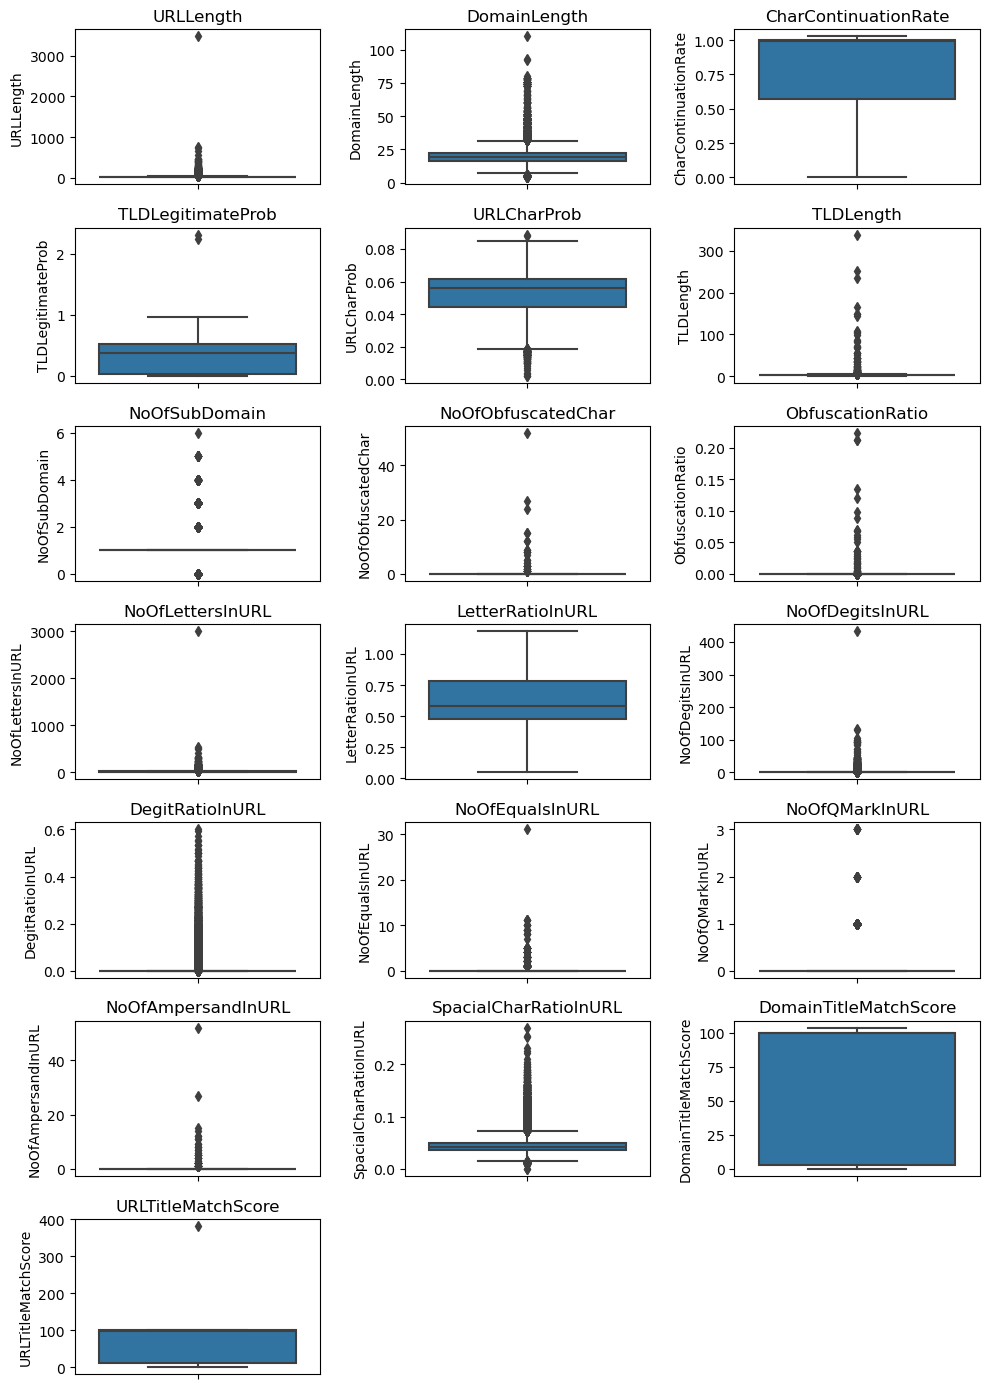

After outliers pipeline


<Figure size 640x480 with 0 Axes>

Before duplicates pipeline
397
After duplicates pipeline
0
Before feature engineering pipeline
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100469 entries, 0 to 100468
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URLLength              100469 non-null  int32  
 1   DomainLength           100469 non-null  int32  
 2   IsDomainIP             100469 non-null  float64
 3   TLD                    100469 non-null  object 
 4   CharContinuationRate   100469 non-null  float64
 5   TLDLegitimateProb      100469 non-null  float64
 6   URLCharProb            100469 non-null  float64
 7   TLDLength              100469 non-null  int32  
 8   NoOfSubDomain          100469 non-null  int32  
 9   HasObfuscation         100469 non-null  int32  
 10  NoOfObfuscatedChar     100469 non-null  int32  
 11  ObfuscationRatio       100469 non-null  float64
 12  NoOfLettersInURL       100469 non-null  int32  

In [124]:
assert_df = cleaning_pipeline(pd.concat([X_train, y_train], axis=1), is_train=True)

In [125]:
print(clean_train.shape)
print(assert_df.shape)

(100469, 28)
(100469, 28)


In [ ]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100469 entries, 0 to 100864
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   URLLength               100469 non-null  int32  
 1   DomainLength            100469 non-null  int32  
 2   IsDomainIP              100469 non-null  float64
 3   TLD                     100469 non-null  object 
 4   CharContinuationRate    100469 non-null  float64
 5   TLDLegitimateProb       100469 non-null  float64
 6   URLCharProb             100469 non-null  float64
 7   TLDLength               100469 non-null  int32  
 8   NoOfSubDomain           100469 non-null  int32  
 9   HasObfuscation          100469 non-null  int32  
 10  NoOfObfuscatedChar      100469 non-null  int32  
 11  ObfuscationRatio        100469 non-null  float64
 12  LetterRatioInURL        100469 non-null  float64
 13  NoOfDegitsInURL         100469 non-null  int32  
 14  DegitRatioInURL         1

In [127]:
assert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100469 entries, 0 to 100468
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   URLLength               100469 non-null  int32  
 1   DomainLength            100469 non-null  int32  
 2   IsDomainIP              100469 non-null  float64
 3   TLD                     100469 non-null  object 
 4   CharContinuationRate    100469 non-null  float64
 5   TLDLegitimateProb       100469 non-null  float64
 6   URLCharProb             100469 non-null  float64
 7   TLDLength               100469 non-null  int32  
 8   NoOfSubDomain           100469 non-null  int32  
 9   HasObfuscation          100469 non-null  int32  
 10  NoOfObfuscatedChar      100469 non-null  int32  
 11  ObfuscationRatio        100469 non-null  float64
 12  LetterRatioInURL        100469 non-null  float64
 13  NoOfDegitsInURL         100469 non-null  int32  
 14  DegitRatioInURL     

In [128]:
for col in clean_train.columns:
    if col not in assert_df.columns:
        print(f"Column '{col}' is missing in assert_df.")

In [129]:
for col in assert_df.columns:
    if col not in clean_train.columns:
        print(f"Column '{col}' is missing in clean_train.")

In [130]:
clean_train.columns == assert_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

hasilnya sama

sekarang saatnya memperbaharui fitur categorical dan numerical agar sesuai hasil akhir dari cleaning

In [131]:
final_categorical_features = [col for col in clean_train.columns if col in categorical_features]
final_numerical_features = [col for col in clean_train.columns if (col not in final_categorical_features and col != "label")]

In [132]:
final_categorical_features

['IsDomainIP', 'TLD', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'IsResponsive']

In [133]:
final_numerical_features

['URLLength',
 'DomainLength',
 'CharContinuationRate',
 'TLDLegitimateProb',
 'URLCharProb',
 'TLDLength',
 'NoOfSubDomain',
 'NoOfObfuscatedChar',
 'ObfuscationRatio',
 'LetterRatioInURL',
 'NoOfDegitsInURL',
 'DegitRatioInURL',
 'NoOfEqualsInURL',
 'NoOfQMarkInURL',
 'NoOfAmpersandInURL',
 'SpacialCharRatioInURL',
 'DomainTitleMatchScore',
 'URLTitleMatchScore',
 'RatioDomainToURL',
 'PathSpecialCharDensity',
 'SubdomainRatio']

Lakukan cleaning terhadap validation set juga

In [134]:
clean_val_df = cleaning_pipeline(pd.concat([X_val, y_val], axis=1), is_train=False)

is_train: False
Missing values before cleaning
URL                            8792
URLLength                     12121
Domain                        14075
DomainLength                   9241
IsDomainIP                     8395
TLD                            9092
CharContinuationRate           9684
TLDLegitimateProb             10577
URLCharProb                   10418
TLDLength                      9574
NoOfSubDomain                  8985
HasObfuscation                13221
NoOfObfuscatedChar            13355
ObfuscationRatio              13117
NoOfLettersInURL              12666
LetterRatioInURL              13077
NoOfDegitsInURL               11791
DegitRatioInURL               10564
NoOfEqualsInURL               12363
NoOfQMarkInURL                 8794
NoOfAmpersandInURL             9067
NoOfOtherSpecialCharsInURL     9584
SpacialCharRatioInURL         12631
IsHTTPS                        9815
LineOfCode                    13833
LargestLineLength             13554
HasTitle         

C:\Users\Dzulfaqor\AppData\Local\Temp\ipykernel_18568\409223285.py:192: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan True nan ... nan nan True]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_copy.loc[df_copy['IsHTTPS'].isnull(), 'IsHTTPS'] = df_copy.loc[df_copy['IsHTTPS'].isnull(), 'URL'].apply(lambda x: cari_HTTPS(x) if pd.notnull(x) else np.nan)


Missing values after cleaning
URLLength                0
DomainLength             0
IsDomainIP               0
TLD                      0
CharContinuationRate     0
TLDLegitimateProb        0
URLCharProb              0
TLDLength                0
NoOfSubDomain            0
HasObfuscation           0
NoOfObfuscatedChar       0
ObfuscationRatio         0
NoOfLettersInURL         0
LetterRatioInURL         0
NoOfDegitsInURL          0
DegitRatioInURL          0
NoOfEqualsInURL          0
NoOfQMarkInURL           0
NoOfAmpersandInURL       0
SpacialCharRatioInURL    0
IsHTTPS                  0
HasTitle                 0
DomainTitleMatchScore    0
URLTitleMatchScore       0
IsResponsive             0
label                    0
dtype: int64
Before feature engineering pipeline
<class 'pandas.core.frame.DataFrame'>
Index: 28081 entries, 110142 to 126907
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   

C:\Users\Dzulfaqor\AppData\Local\Temp\ipykernel_18568\409223285.py:309: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[[col for col in df_copy.columns if col in numerical_features]].fillna(df_copy[[col for col in df_copy.columns if col in numerical_features]].mean(), inplace=True)
C:\Users\Dzulfaqor\AppData\Local\Temp\ipykernel_18568\409223285.py:313: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead,

In [135]:
X_val_clean = clean_val_df.drop(columns="label")
y_val_clean = clean_val_df["label"]

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [136]:
class PreprocessingPipeline(BaseEstimator, TransformerMixin):
    def __init__(self, scaling_method='standard'):
        self.scaling_method = scaling_method
        self.scaler = self._get_scaler(scaling_method)
        self.encoder = TargetEncoder()
        self.feature_encoder = FeatureEncoder()
        self.numerical_features = None
        self.categorical_features = None
        
    def _get_scaler(self, method):
        if method == 'minmax':
            return MinMaxScaler()
        elif method == 'robust':
            return RobustScaler()
        else:
            return StandardScaler()
    
    def get_feature_types(self, X):
        self.categorical_features = final_categorical_features
        self.numerical_features = final_numerical_features
    
    def fit(self, X, y=None):
        self.get_feature_types(X)
        
        if len(self.numerical_features) > 0:
            self.scaler.fit(X[self.numerical_features])
        
        if len(self.categorical_features) > 0:
            self.encoder.fit(X[self.categorical_features], y)
            
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        
        if len(self.numerical_features) > 0:
            X_transformed[self.numerical_features] = self.scaler.transform(X[self.numerical_features])
        
        if len(self.categorical_features) > 0:
            X_transformed[self.categorical_features] = self.encoder.transform(X[self.categorical_features])
            
        return X_transformed
    
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [137]:
# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Apply scaling to the training set
X_train_scaled_minmax = min_max_scaler.fit_transform(clean_train[final_numerical_features])
X_train_scaled_standard = standard_scaler.fit_transform(clean_train[final_numerical_features])
X_train_scaled_robust = robust_scaler.fit_transform(clean_train[final_numerical_features])

# Apply scaling to the validation set
X_val_scaled_minmax = min_max_scaler.transform(clean_val_df[final_numerical_features])
X_val_scaled_standard = standard_scaler.transform(clean_val_df[final_numerical_features])
X_val_scaled_robust = robust_scaler.transform(clean_val_df[final_numerical_features])

# Convert scaled arrays back to DataFrame for better readability
X_train_scaled_minmax_df = pd.concat([pd.DataFrame(X_train_scaled_minmax, columns=final_numerical_features, index=clean_train.index), 
                                      clean_train[final_categorical_features], 
                                      clean_train[["label"]]], 
                                     axis=1)
X_train_scaled_standard_df = pd.concat([pd.DataFrame(X_train_scaled_standard, columns=final_numerical_features, index=clean_train.index), 
                                        clean_train[final_categorical_features], 
                                        clean_train[["label"]]], 
                                       axis=1)
X_train_scaled_robust_df = pd.concat([pd.DataFrame(X_train_scaled_robust, columns=final_numerical_features, index=clean_train.index), 
                                      clean_train[final_categorical_features], 
                                      clean_train[["label"]]], 
                                     axis=1)


X_val_scaled_minmax_df = pd.concat([pd.DataFrame(X_val_scaled_minmax, columns=final_numerical_features, index=clean_val_df.index), 
                                    clean_val_df[final_categorical_features], 
                                    clean_val_df[["label"]]], 
                                   axis=1)
X_val_scaled_standard_df = pd.concat([pd.DataFrame(X_val_scaled_standard, columns=final_numerical_features, index=clean_val_df.index), 
                                      clean_val_df[final_categorical_features], 
                                      clean_val_df[["label"]]], 
                                     axis=1)
X_val_scaled_robust_df = pd.concat([pd.DataFrame(X_val_scaled_robust, columns=final_numerical_features, index=clean_val_df.index), 
                                    clean_val_df[final_categorical_features], 
                                    clean_val_df[["label"]]], 
                                   axis=1)


# Display the first few rows of the scaled training set
print("Min-Max Scaled Training Set:")
print(X_train_scaled_minmax_df.head())

print("\nStandard Scaled Training Set:")
print(X_train_scaled_standard_df.head())

print("\nRobust Scaled Training Set:")
print(X_train_scaled_robust_df.head())


# Display the first few rows of the scaled validation set
print("\nMin-Max Scaled Validation Set:")
print(X_val_scaled_minmax_df.head())

print("\nStandard Scaled Validation Set:")
print(X_val_scaled_standard_df.head())

print("\nRobust Scaled Validation Set:")
print(X_val_scaled_robust_df.head())

Min-Max Scaled Training Set:
   URLLength  DomainLength  CharContinuationRate  TLDLegitimateProb  \
0   0.024336      0.173333              0.467620           0.544637   
1   0.044248      0.293333              0.974209           0.083286   
2   0.024336      0.173333              0.467620           0.544637   
3   0.035398      0.240000              0.761835           0.083286   
4   0.013274      0.160000              0.801225           0.179631   

   URLCharProb  TLDLength  NoOfSubDomain  NoOfObfuscatedChar  \
0     0.495877   0.030928       0.166667                 0.0   
1     0.714493   0.030928       0.166667                 0.0   
2     0.838278   0.020619       0.166667                 0.0   
3     0.659959   0.020619       0.166667                 0.0   
4     0.856833   0.010309       0.166667                 0.0   

   ObfuscationRatio  LetterRatioInURL  ...  RatioDomainToURL  \
0               0.0          0.662503  ...          0.639136   
1               0.0          0.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'URLLength'),
  Text(1, 0, 'DomainLength'),
  Text(2, 0, 'IsDomainIP'),
  Text(3, 0, 'CharContinuationRate'),
  Text(4, 0, 'TLDLegitimateProb'),
  Text(5, 0, 'URLCharProb'),
  Text(6, 0, 'TLDLength'),
  Text(7, 0, 'NoOfSubDomain'),
  Text(8, 0, 'HasObfuscation'),
  Text(9, 0, 'NoOfObfuscatedChar'),
  Text(10, 0, 'ObfuscationRatio'),
  Text(11, 0, 'LetterRatioInURL'),
  Text(12, 0, 'NoOfDegitsInURL'),
  Text(13, 0, 'DegitRatioInURL'),
  Text(14, 0, 'NoOfEqualsInURL'),
  Text(15, 0, 'NoOfQMarkInURL'),
  Text(16, 0, 'NoOfAmpersandInURL'),
  Text(17, 0, 'SpacialCharRatioInURL'),
  Text(18, 0, 'IsHTTPS'),
  Text(19, 0, 'HasTitle'),
  Text(20, 0, 'DomainTitleMatchScore'),
  Text(21, 0, 'URLTitleMatchScore'),
  Text(22, 0, 'IsResponsive'),
  Text(23, 0, 'label'),
  Text(24, 0, 'RatioDomainToURL'),
  Text(25, 0, 'PathSpecialCharDensity'),
  Text(26, 0, 'Sub

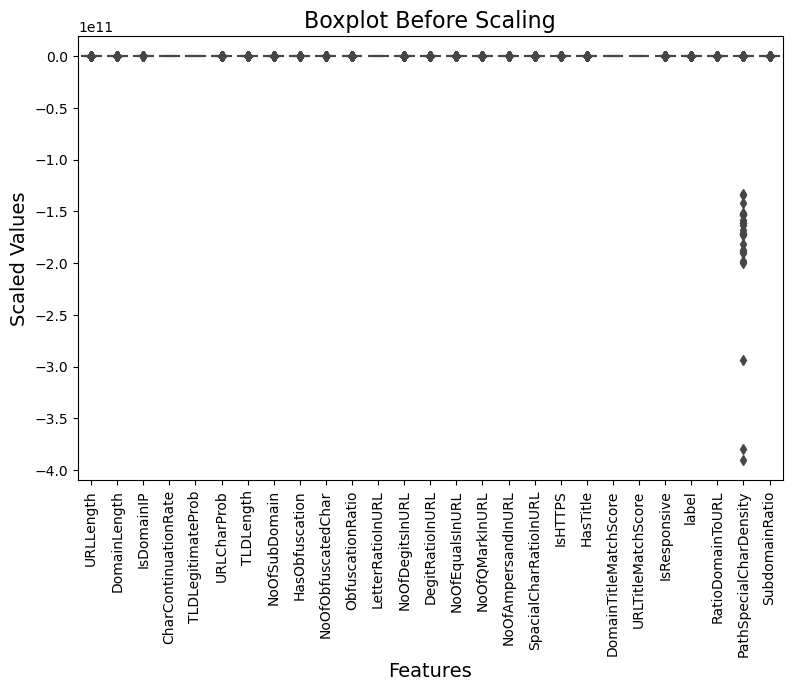

In [138]:
import matplotlib.gridspec as gridspec
# Buat figure dengan GridSpec
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], hspace=0.6)

ax1 = plt.subplot(gs[0, 0])
sns.boxplot(data=clean_train)
plt.title('Boxplot Before Scaling', fontsize=16)
plt.ylabel('Scaled Values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)

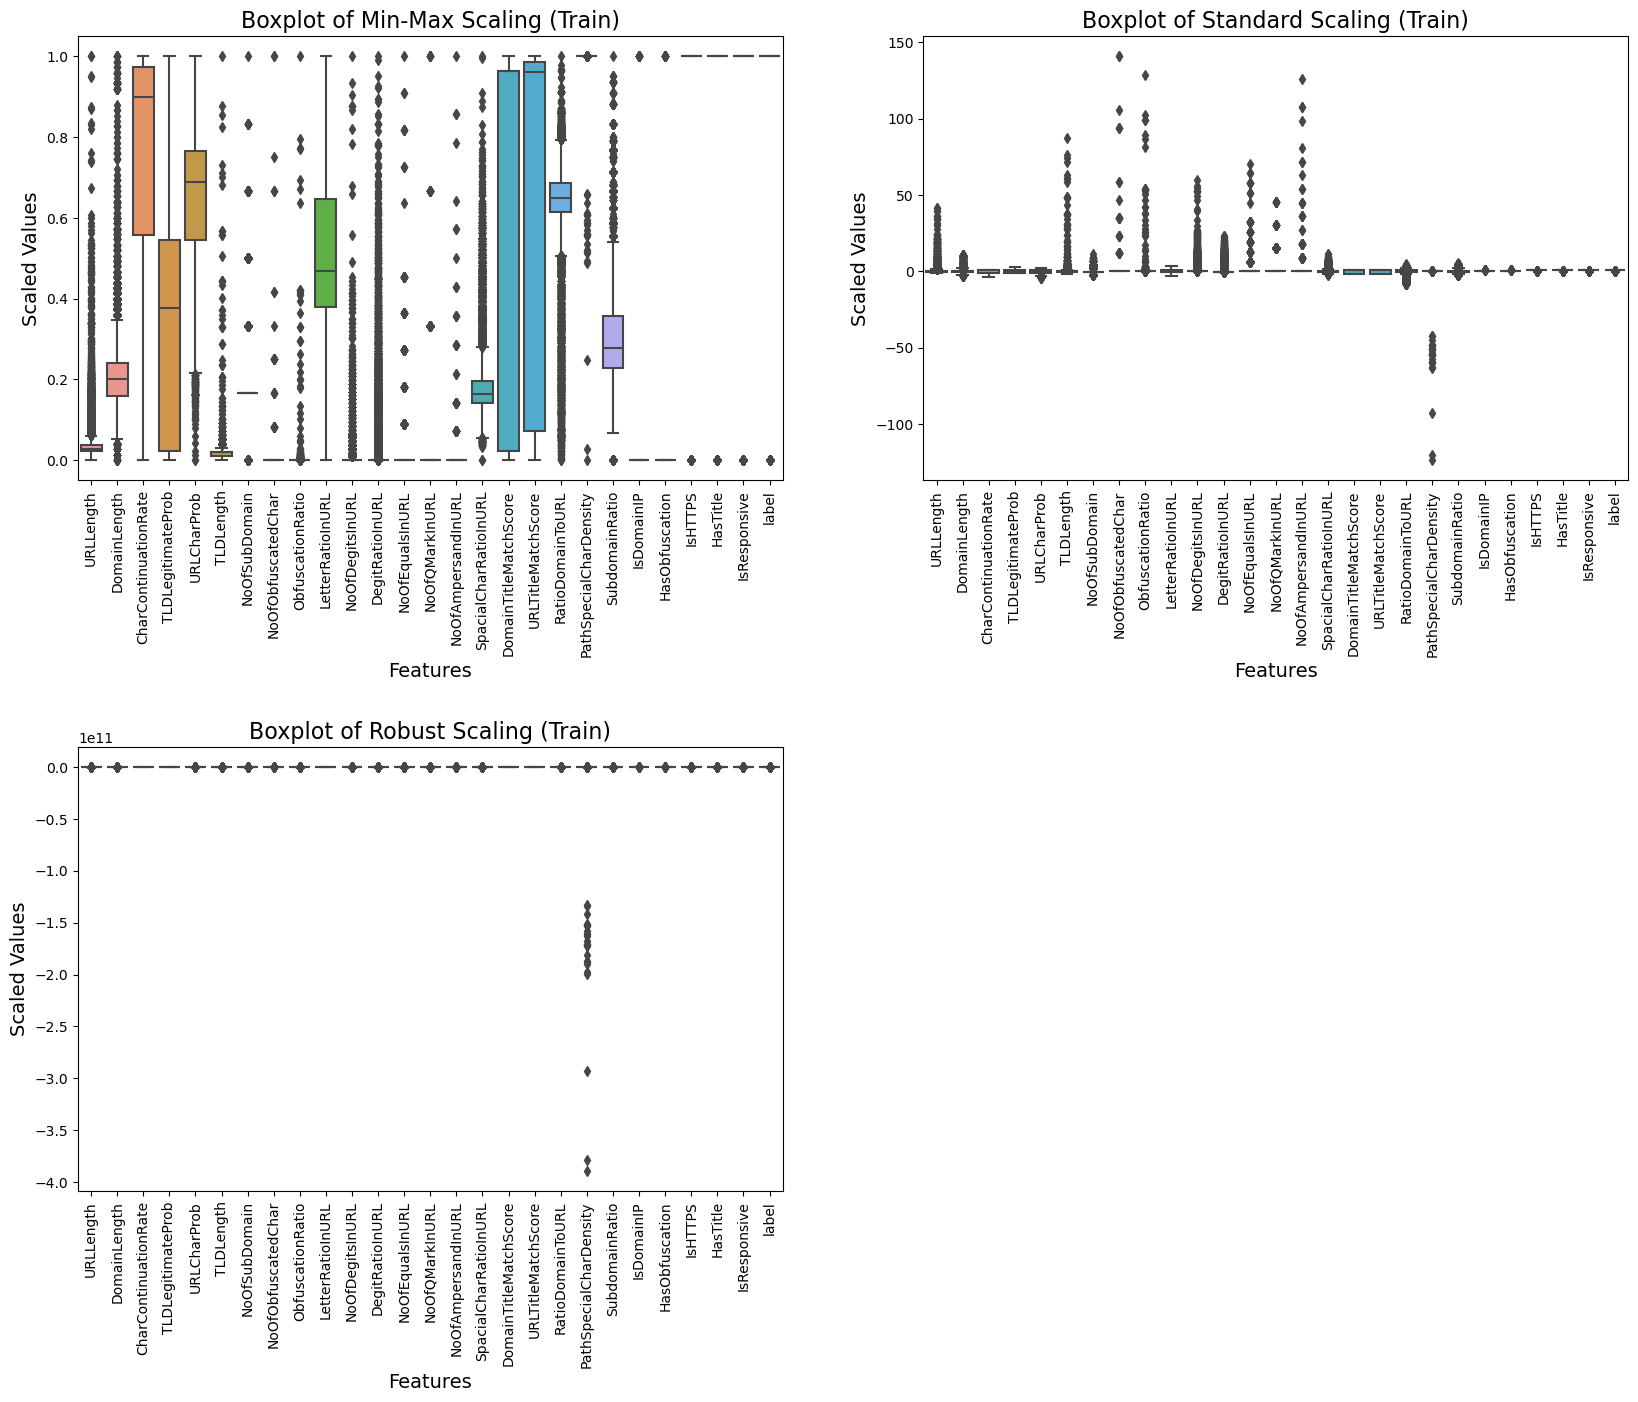

In [139]:
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], hspace=0.6)

# Boxplot for Min-Max Scaling
ax1 = plt.subplot(gs[0, 0])
sns.boxplot(data=X_train_scaled_minmax_df)
plt.title('Boxplot of Min-Max Scaling (Train)', fontsize=16)
plt.ylabel('Scaled Values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)

# Boxplot for Standard Scaling
ax2 = plt.subplot(gs[0, 1])
sns.boxplot(data=X_train_scaled_standard_df)
plt.title('Boxplot of Standard Scaling (Train)', fontsize=16)
plt.ylabel('Scaled Values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)

# Boxplot for Robust Scaling
ax3 = plt.subplot(gs[1, 0])
sns.boxplot(data=X_train_scaled_robust_df)
plt.title('Boxplot of Robust Scaling (Train)', fontsize=16)
plt.ylabel('Scaled Values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)

# Mengatur layout
plt.show()

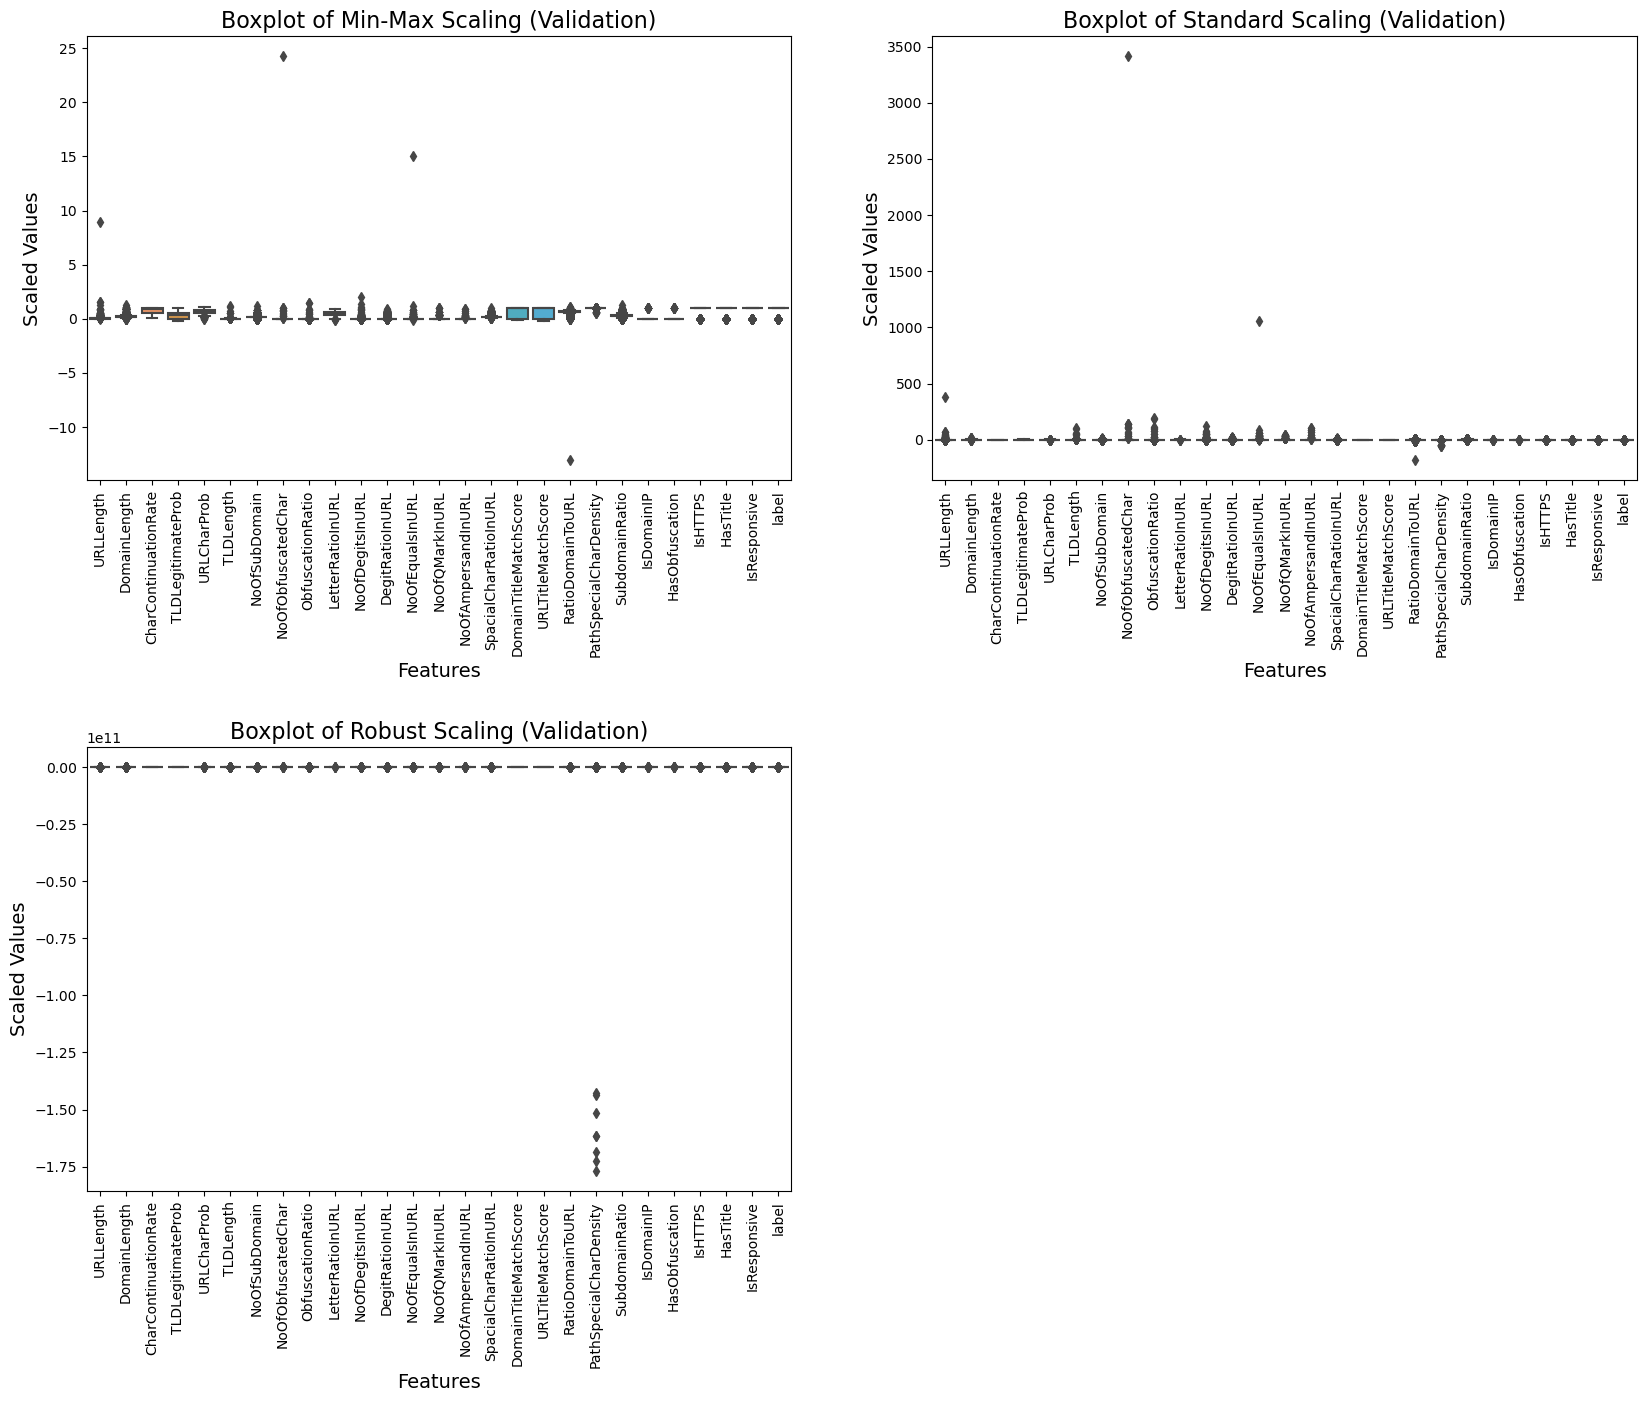

In [140]:
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], hspace=0.6)

# Boxplot for Min-Max Scaling
ax1 = plt.subplot(gs[0, 0])
sns.boxplot(data=X_val_scaled_minmax_df)
plt.title('Boxplot of Min-Max Scaling (Validation)', fontsize=16)
plt.ylabel('Scaled Values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)

# Boxplot for Standard Scaling
ax2 = plt.subplot(gs[0, 1])
sns.boxplot(data=X_val_scaled_standard_df)
plt.title('Boxplot of Standard Scaling (Validation)', fontsize=16)
plt.ylabel('Scaled Values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)

# Boxplot for Robust Scaling
ax3 = plt.subplot(gs[1, 0])
sns.boxplot(data=X_val_scaled_robust_df)
plt.title('Boxplot of Robust Scaling (Validation)', fontsize=16)
plt.ylabel('Scaled Values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)

# Mengatur layout
plt.show()

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

untuk bagian encoding paling sering digunakan adalah OHE, jadi mari kita coba OHE terlebih dahulu

In [141]:
# !! OHE, tapi ini hasil kolomnya jadi 873 :D !!
# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# X_train_encoded = ohe.fit_transform(X_train_clean[final_categorical_features])

# # Get feature names directly from the encoder
# feature_names = ohe.get_feature_names_out(final_categorical_features)

# # Create DataFrame with the encoded features
# X_train_encoded_df = pd.DataFrame(
#     X_train_encoded,
#     columns=feature_names,
#     index=X_train_clean.index
# )

# # If you need to combine with other numerical features
# numerical_features = [col for col in X_train_clean.columns if col not in final_categorical_features]
# X_train_combined = pd.concat([
#     X_train_clean[final_numerical_features],
#     X_train_encoded_df
# ], axis=1)

ternyata OHE menghasilkan 873 kolom dalam train set, dan ini agak *overkill* dan akan memberatkan proses pemodelan. Sehingga kami beralih ke teknik encoding yang tidak menambahkan kolom, target encoding. Kenapa tidak label encoding? karena kolom kategorikal yang tersisa "TLD" tidak memiliki ordinalitas untuk diterapkan label encoding

In [142]:
encoder = TargetEncoder()

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train_clean[final_categorical_features], y_train_clean)

# Convert the numpy array to DataFrame with proper column names
X_train_encoded_df = pd.DataFrame(
    X_train_encoded,
    columns=final_categorical_features,
    index=X_train_clean.index
)

# Combine the target-encoded categorical features with numerical features
X_train_combined = pd.concat([
    X_train_clean[final_numerical_features],  # Keep original numerical features
    X_train_encoded_df  # Add the target-encoded categorical features
], axis=1)

In [143]:
X_train_combined

,URLLength,DomainLength,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,ObfuscationRatio,LetterRatioInURL,...,URLTitleMatchScore,RatioDomainToURL,PathSpecialCharDensity,SubdomainRatio,IsDomainIP,TLD,HasObfuscation,IsHTTPS,HasTitle,IsResponsive
0,24,17,0.480000,0.522907,0.040800,4,1,0,0.0,0.800000,...,100.000000,0.708333,-2.291429,0.058824,0.928048,0.969866,0.928129,0.961361,0.943256,0.962235
1,33,26,1.000000,0.079963,0.057792,4,1,0,0.0,0.606000,...,94.736842,0.787879,-3.572857,0.038462,0.928035,0.990558,0.928105,0.961462,0.943405,0.962699
2,24,17,0.480000,0.522907,0.067413,3,1,0,0.0,0.800000,...,100.000000,0.708333,-2.291429,0.058824,0.928025,0.935125,0.928117,0.961375,0.943625,0.962769
3,29,22,0.782003,0.079963,0.053553,3,1,0,0.0,0.552000,...,0.000000,0.758621,-2.924989,0.045455,0.928025,0.987215,0.928117,0.961375,0.943625,0.962769
4,19,16,0.822437,0.172464,0.068855,2,1,0,0.0,0.573610,...,0.000000,0.842105,-4.996952,0.062500,0.928059,0.935276,0.928083,0.961126,0.943112,0.962602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100860,31,23,0.580645,0.522907,0.060076,3,1,0,0.0,0.567000,...,100.000000,0.741935,-2.747125,0.043478,0.928025,0.935125,0.928117,0.961375,0.943625,0.962769
100861,29,22,0.743707,0.003319,0.056749,2,1,0,0.0,0.587712,...,100.000000,0.758621,-2.857000,0.045455,0.928025,0.986615,0.928117,0.961375,0.943625,0.962769
100862,45,38,0.400000,0.522907,0.062988,4,1,0,0.0,0.826087,...,100.000000,0.844444,-4.869565,0.026316,0.928059,0.970433,0.928083,0.961126,0.943112,0.962602
100863,22,15,0.878863,0.307660,0.055862,3,1,0,0.0,0.409000,...,100.000000,0.681818,-2.001429,0.066667,0.928048,0.934636,0.928129,0.961361,0.943256,0.962235


In [144]:
X_train_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100469 entries, 0 to 100864
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   URLLength               100469 non-null  int32  
 1   DomainLength            100469 non-null  int32  
 2   CharContinuationRate    100469 non-null  float64
 3   TLDLegitimateProb       100469 non-null  float64
 4   URLCharProb             100469 non-null  float64
 5   TLDLength               100469 non-null  int32  
 6   NoOfSubDomain           100469 non-null  int32  
 7   NoOfObfuscatedChar      100469 non-null  int32  
 8   ObfuscationRatio        100469 non-null  float64
 9   LetterRatioInURL        100469 non-null  float64
 10  NoOfDegitsInURL         100469 non-null  int32  
 11  DegitRatioInURL         100469 non-null  float64
 12  NoOfEqualsInURL         100469 non-null  int32  
 13  NoOfQMarkInURL          100469 non-null  int32  
 14  NoOfAmpersandInURL      1

In [145]:
X_val_encoded = encoder.transform(X_val_clean[final_categorical_features])

# Convert the numpy array to DataFrame with proper column names
X_val_encoded_df = pd.DataFrame(
    X_val_encoded,
    columns=final_categorical_features,
    index=X_val_clean.index
)

# Combine the target-encoded categorical features with numerical features
X_val_combined = pd.concat([
    X_val_clean[final_numerical_features],  # Keep original numerical features
    X_val_encoded_df  # Add the target-encoded categorical features
], axis=1)

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [146]:
y_train_clean.value_counts()

label
1    93221
0     7248
Name: count, dtype: int64

di sini terlihat labelnya **sangat tidak seimbang**, tapi menurut kami nilai ini cukup wajar karena pada kenyataannya pun URL phishing pasti lebih sedikit dibandingkan URL legit. Oleh karena itu, kami memutuskan untuk tidak melakukan sampling. Sebenarnya teknik yang lebih baik adalah menyesuaikan weights pada algoritma prediksi, sehingga tidak akan dicantumkan di sini

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [147]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [148]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [149]:
from sklearn.base import BaseEstimator, TransformerMixin

class PreprocessingPipeline(BaseEstimator, TransformerMixin):
    def __init__(self, scaling_method='standard'):
        self.scaling_method = scaling_method
        self.scaler = self._get_scaler(scaling_method)
        self.encoder = TargetEncoder()
        self.numerical_features = None
        self.categorical_features = None
        
    def _get_scaler(self, method):
        if method == 'minmax':
            return MinMaxScaler()
        elif method == 'robust':
            return RobustScaler()
        else:
            return StandardScaler()
    
    def get_feature_types(self, X):
        self.categorical_features = final_categorical_features
        self.numerical_features = final_numerical_features
    
    def fit(self, X, y=None):
        self.get_feature_types(X)
        
        if len(self.numerical_features) > 0:
            self.scaler.fit(X[self.numerical_features])
        
        if len(self.categorical_features) > 0:
            self.encoder.fit(X[self.categorical_features], y)
            
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        
        if len(self.numerical_features) > 0:
            X_transformed[self.numerical_features] = self.scaler.transform(X[self.numerical_features])
        
        if len(self.categorical_features) > 0:
            X_transformed[self.categorical_features] = self.encoder.transform(X[self.categorical_features])
            
        return X_transformed
    
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [150]:
pipeline = PreprocessingPipeline(scaling_method='standard')

X_train_processed = pipeline.fit_transform(X_train_combined, y_train_clean)

X_val_processed = pipeline.transform(X_train_combined)

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `label`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

In [151]:
pd.concat([X_train_combined, y_train_clean], axis=1)

,URLLength,DomainLength,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,ObfuscationRatio,LetterRatioInURL,...,RatioDomainToURL,PathSpecialCharDensity,SubdomainRatio,IsDomainIP,TLD,HasObfuscation,IsHTTPS,HasTitle,IsResponsive,label
0,24,17,0.480000,0.522907,0.040800,4,1,0,0.0,0.800000,...,0.708333,-2.291429,0.058824,0.928048,0.969866,0.928129,0.961361,0.943256,0.962235,1
1,33,26,1.000000,0.079963,0.057792,4,1,0,0.0,0.606000,...,0.787879,-3.572857,0.038462,0.928035,0.990558,0.928105,0.961462,0.943405,0.962699,1
2,24,17,0.480000,0.522907,0.067413,3,1,0,0.0,0.800000,...,0.708333,-2.291429,0.058824,0.928025,0.935125,0.928117,0.961375,0.943625,0.962769,1
3,29,22,0.782003,0.079963,0.053553,3,1,0,0.0,0.552000,...,0.758621,-2.924989,0.045455,0.928025,0.987215,0.928117,0.961375,0.943625,0.962769,1
4,19,16,0.822437,0.172464,0.068855,2,1,0,0.0,0.573610,...,0.842105,-4.996952,0.062500,0.928059,0.935276,0.928083,0.961126,0.943112,0.962602,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100860,31,23,0.580645,0.522907,0.060076,3,1,0,0.0,0.567000,...,0.741935,-2.747125,0.043478,0.928025,0.935125,0.928117,0.961375,0.943625,0.962769,1
100861,29,22,0.743707,0.003319,0.056749,2,1,0,0.0,0.587712,...,0.758621,-2.857000,0.045455,0.928025,0.986615,0.928117,0.961375,0.943625,0.962769,1
100862,45,38,0.400000,0.522907,0.062988,4,1,0,0.0,0.826087,...,0.844444,-4.869565,0.026316,0.928059,0.970433,0.928083,0.961126,0.943112,0.962602,1
100863,22,15,0.878863,0.307660,0.055862,3,1,0,0.0,0.409000,...,0.681818,-2.001429,0.066667,0.928048,0.934636,0.928129,0.961361,0.943256,0.962235,1


Melakukan subsample terhadap training set untuk digunakan dalam KNN, karena kemampuan komptuasi yang tidak bisa memfasilitasi keseluruhan dataset ketika menggunakan algoritma KNN

In [152]:
# Define the size of the subsample (e.g., 10% of the dataset)
subsample_size = 0.1

# Perform stratified sampling
subsample, _ = train_test_split(
    pd.concat([X_train_combined, y_train_clean], axis=1),
    test_size=1 - subsample_size,  # Keep only `subsample_size` of the data
    stratify=pd.concat([X_train_combined, y_train_clean], axis=1)['label'],  # Ensure stratification on the target column
    random_state=182  # Set random seed for reproducibility
)

X_train_subsample = subsample.drop(columns="label")
y_train_subsample = subsample["label"]

## A. KNN

FUNGSI SAVE, LOAD, SCORE TERPISAH

In [153]:
def calculate_model_score(model, X, y):
    """
    Fungsi umum untuk menghitung akurasi model
    
    Parameters:
    model: Model yang memiliki method predict()
    X (array-like): Data fitur testing
    y (array-like): Label testing yang sebenarnya
    
    Returns:
    float: Nilai akurasi
    """
    predictions = model.predict(X)
    return np.mean(predictions == y)

KNN model yang udah dioptimasi dengan save dan load

In [154]:
class KNN:
    def __init__(self, k, metric='euclidean', p=None):
        """
        Inisialisasi model KNN
        
        Parameters:
        k (int): Jumlah tetangga terdekat (wajib diisi)
        metric (str): Metrik jarak ('euclidean', 'manhattan', atau 'minkowski')
        p (int): Parameter p untuk jarak Minkowski (wajib diisi jika metric='minkowski')
        """
        if not isinstance(k, int) or k <= 0:
            raise ValueError("k harus berupa integer positif")
        
        if metric not in ['euclidean', 'manhattan', 'minkowski']:
            raise ValueError("Metrik harus 'euclidean', 'manhattan', atau 'minkowski'")
            
        if metric == 'minkowski' and p is None:
            raise ValueError("Parameter p wajib diisi untuk metrik Minkowski")
            
        self.k = k
        self.metric = metric
        self.p = p

    def get_params(self):
        """
        Mengambil parameter model untuk disimpan
        
        Returns:
        dict: Dictionary berisi parameter model saja
        """
        return {
            'k': self.k,
            'metric': self.metric,
            'p': self.p
        }    
    
    def _euclidean_distance(self, X1, X2):
        """Menghitung jarak Euclidean antara matriks X1 dan X2"""
        # Gunakan broadcasting untuk menghitung jarak
        return np.sqrt(np.sum((X1[:, np.newaxis] - X2) ** 2, axis=2))
    
    def _manhattan_distance(self, X1, X2):
        """Menghitung jarak Manhattan antara matriks X1 dan X2"""
        return np.sum(np.abs(X1[:, np.newaxis] - X2), axis=2)
    
    def _minkowski_distance(self, X1, X2):
        """Menghitung jarak Minkowski antara matriks X1 dan X2"""
        return np.power(np.sum(np.power(np.abs(X1[:, np.newaxis] - X2), self.p), axis=2), 1/self.p)
    
    def fit(self, X, y):
        """
        Menyimpan data training
        
        Parameters:
        X (array-like): Data fitur training
        y (array-like): Label training
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self
    
    def predict(self, X, batch_size=1000):
        """
        Memprediksi label untuk data input dengan batch processing
        
        Parameters:
        X (array-like): Data fitur yang akan diprediksi
        batch_size (int): Ukuran batch untuk memproses data
        
        Returns:
        array: Label hasil prediksi
        """
        X = np.array(X)
        predictions = []
        
        # Proses data dalam batch
        for i in range(0, len(X), batch_size):
            batch = X[i:i + batch_size]
            
            # Hitung jarak untuk batch saat ini
            if self.metric == 'euclidean':
                distances = self._euclidean_distance(batch, self.X_train)
            elif self.metric == 'manhattan':
                distances = self._manhattan_distance(batch, self.X_train)
            elif self.metric == 'minkowski':
                distances = self._minkowski_distance(batch, self.X_train)
                
            # Dapatkan k tetangga terdekat untuk batch
            k_indices = np.argpartition(distances, self.k, axis=1)[:, :self.k]
            
            # Voting mayoritas untuk setiap data dalam batch
            batch_predictions = []
            for indices in k_indices:
                labels = self.y_train[indices]
                most_common = Counter(labels).most_common(1)[0][0]
                batch_predictions.append(most_common)
                
            predictions.extend(batch_predictions)
        
        return np.array(predictions)

    def save_model(self, filepath=None):
        """
        Menyimpan model ke file menggunakan pickle
        
        Parameters:
        filepath (str, optional): Nama file untuk menyimpan model. 
                                Jika None, akan dibuat nama otomatis dengan timestamp
        """
        import os
        from datetime import datetime
        
        # Buat folder saved_model jika belum ada
        save_dir = 'saved_model'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        
        # Jika filepath tidak diberikan, buat nama file otomatis
        if filepath is None:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            filepath = f'knn_model_k{self.k}_{timestamp}.pkl'
        
        # Gabungkan path folder dengan nama file
        full_path = os.path.join(save_dir, filepath)
        
        # Cek apakah file sudah ada
        if os.path.exists(full_path):
            response = input(f"File {filepath} sudah ada. Timpa file? (y/n): ")
            if response.lower() != 'y':
                print("Penyimpanan dibatalkan")
                return
        
        # Simpan model
        with open(full_path, 'wb') as f:
            pickle.dump(self, f)
        print(f"Model berhasil disimpan ke {full_path}")

    @staticmethod
    def load_model(filepath=None):
        """
        Memuat model dari file menggunakan pickle
        
        Parameters:
        filepath (str, optional): Nama file untuk memuat model.
                                Jika None, akan menampilkan list file yang tersedia
        
        Returns:
        KNN: Instance model KNN yang dimuat
        """
        import os
        
        save_dir = 'saved_model'
        
        # Jika filepath tidak diberikan, tampilkan list file yang tersedia
        if filepath is None:
            saved_files = [f for f in os.listdir(save_dir) if f.endswith('.pkl')]
            if not saved_files:
                raise FileNotFoundError(f"Tidak ada file model di folder {save_dir}")
            
            print("\nModel yang tersedia:")
            for i, file in enumerate(saved_files, 1):
                print(f"{i}. {file}")
            
            while True:
                try:
                    choice = int(input("\nPilih nomor model yang ingin dimuat (0 untuk batal): "))
                    if choice == 0:
                        print("Pembatalan dimuat")
                        return None
                    if 1 <= choice <= len(saved_files):
                        filepath = saved_files[choice-1]
                        break
                    print("Pilihan tidak valid")
                except ValueError:
                    print("Masukkan nomor yang valid")
        
        full_path = os.path.join(save_dir, filepath)
        
        # Cek apakah file ada
        if not os.path.exists(full_path):
            raise FileNotFoundError(f"Model file tidak ditemukan di {full_path}")
            
        # Load model
        with open(full_path, 'rb') as f:
            model = pickle.load(f)
            print(f"Model berhasil dimuat dari {full_path}")
            return model

Di bawah ini sebelum optimasi, ga dihapus dulu untuk compare

In [155]:
# class KNN:
#     def __init__(self, k=3, metric='euclidean'):
#         """
#         Inisialisasi model KNN
        
#         Parameters:
#         k (int): Jumlah tetangga terdekat
#         metric (str): Metrik jarak ('euclidean', 'manhattan', atau 'minkowski')
#         """
#         self.k = k
#         self.metric = metric
        
#     def _euclidean_distance(self, x1, x2):
#         """Menghitung jarak Euclidean antara dua titik"""
#         return np.sqrt(np.sum((x1 - x2) ** 2))
    
#     def _manhattan_distance(self, x1, x2):
#         """Menghitung jarak Manhattan antara dua titik"""
#         return np.sum(np.abs(x1 - x2))
    
#     def _minkowski_distance(self, x1, x2, p=3):
#         """Menghitung jarak Minkowski antara dua titik"""
#         return np.power(np.sum(np.power(np.abs(x1 - x2), p)), 1/p)
    
#     def _calculate_distance(self, x1, x2):
#         """Memilih dan menghitung jarak berdasarkan metrik yang dipilih"""
#         if self.metric == 'euclidean':
#             return self._euclidean_distance(x1, x2)
#         elif self.metric == 'manhattan':
#             return self._manhattan_distance(x1, x2)
#         elif self.metric == 'minkowski':
#             return self._minkowski_distance(x1, x2)
#         else:
#             raise ValueError("Metrik jarak tidak valid. Pilih 'euclidean', 'manhattan', atau 'minkowski'")
    
#     def fit(self, X, y):
#         """
#         Menyimpan data training
        
#         Parameters:
#         X (array-like): Data fitur training
#         y (array-like): Label training
#         """
#         self.X_train = np.array(X)
#         self.y_train = np.array(y)
#         return self
    
#     def predict(self, X):
#         """
#         Memprediksi label untuk data input
        
#         Parameters:
#         X (array-like): Data fitur yang akan diprediksi
        
#         Returns:
#         array: Label hasil prediksi
#         """
#         X = np.array(X)
#         predictions = []
        
#         for x in X:
#             # Hitung jarak ke semua titik training
#             distances = []
#             for x_train in self.X_train:
#                 dist = self._calculate_distance(x, x_train)
#                 distances.append(dist)
                
#             # Dapatkan indeks k tetangga terdekat
#             k_indices = np.argsort(distances)[:self.k]
            
#             # Dapatkan label dari k tetangga terdekat
#             k_nearest_labels = self.y_train[k_indices]
            
#             # Voting mayoritas
#             most_common = Counter(k_nearest_labels).most_common(1)[0][0]
#             predictions.append(most_common)
            
#         return np.array(predictions)
    
#     def score(self, X, y):
#         """
#         Menghitung akurasi model
        
#         Parameters:
#         X (array-like): Data fitur testing
#         y (array-like): Label testing yang sebenarnya
        
#         Returns:
#         float: Nilai akurasi
#         """
#         predictions = self.predict(X)
#         return np.mean(predictions == y)
    
#     def save_model(self, filename):
#         """
#         Menyimpan model ke file
        
#         Parameters:
#         filename (str): Nama file untuk menyimpan model
#         """
#         model_data = {
#             'k': self.k,
#             'metric': self.metric,
#             'X_train': self.X_train,
#             'y_train': self.y_train
#         }
#         np.save(filename, model_data)
    
#     def load_model(self, filename):
#         """
#         Memuat model dari file
        
#         Parameters:
#         filename (str): Nama file yang berisi model
#         """
#         model_data = np.load(filename, allow_pickle=True).item()
#         self.k = model_data['k']
#         self.metric = model_data['metric']
#         self.X_train = model_data['X_train']
#         self.y_train = model_data['y_train']

In [156]:
knn_model = KNN(k=3)

In [157]:
knn_model.fit(X_train_subsample, y_train_subsample)

In [158]:
X_val_combined[:int(len(X_val_combined)*0.1)]

,URLLength,DomainLength,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,ObfuscationRatio,LetterRatioInURL,...,URLTitleMatchScore,RatioDomainToURL,PathSpecialCharDensity,SubdomainRatio,IsDomainIP,TLD,HasObfuscation,IsHTTPS,HasTitle,IsResponsive
110142,24,17,1.000000,0.522907,0.060962,3,1,0,-0.000007,0.458000,...,100.000000,0.708333,-2.284571,0.058824,0.928043,0.934958,0.928108,0.961394,0.9433,0.96252
8967,31,23,1.000000,0.522907,0.062753,4,1,0,0.000000,0.567000,...,100.000000,0.741935,-2.747125,0.043478,0.928043,0.970087,0.928108,0.961394,0.9433,0.96252
136488,18,14,0.882997,0.522907,0.063223,3,1,0,0.000000,0.381000,...,100.000000,0.777778,-3.284000,0.071429,0.928043,0.934958,0.928108,0.961394,0.9433,0.96252
13834,25,18,1.000000,0.522907,0.069207,3,1,0,-0.000005,0.480000,...,100.000000,0.720000,-2.428571,0.055556,0.928043,0.934958,0.928108,0.961394,0.9433,0.96252
75770,22,15,0.866414,0.305684,0.054781,2,1,0,0.000006,0.409000,...,100.000000,0.681818,-1.993947,0.066667,0.928043,0.934958,0.928108,0.961394,0.9433,0.96252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135792,28,21,1.000000,0.012178,0.058092,2,1,0,0.000000,0.536000,...,0.000000,0.750000,-2.856000,0.047619,0.928043,0.988931,0.928108,0.961394,0.9433,0.96252
134132,26,19,0.454545,0.522907,0.063207,3,1,0,0.000000,0.740741,...,91.666667,0.730769,-2.301587,0.052632,0.928043,0.970087,0.928108,0.961394,0.9433,0.96252
79664,59,36,0.548387,0.000372,0.038661,4,1,0,0.000000,0.693903,...,0.000000,0.610169,-1.414320,0.027778,0.928043,0.336697,0.928108,0.002571,0.9433,0.96252
87833,19,11,1.000000,0.079963,0.074472,3,1,0,0.000000,0.736842,...,75.000000,0.578947,-1.242000,0.090909,0.928043,0.987098,0.928108,0.961394,0.9433,0.96252


In [159]:
start_time = time.time()
knn_prediction = knn_model.predict(X_val_combined[:int(len(X_val_combined)*0.1)])
print("Total predicting time: ", time.time()-start_time)

Total predicting time:  12.162675380706787


In [160]:
accuracy_score(y_val[:int(len(X_val_combined)*0.1)], knn_prediction)

0.9736467236467237

In [161]:
y_val.value_counts()

label
1    25970
0     2111
Name: count, dtype: int64

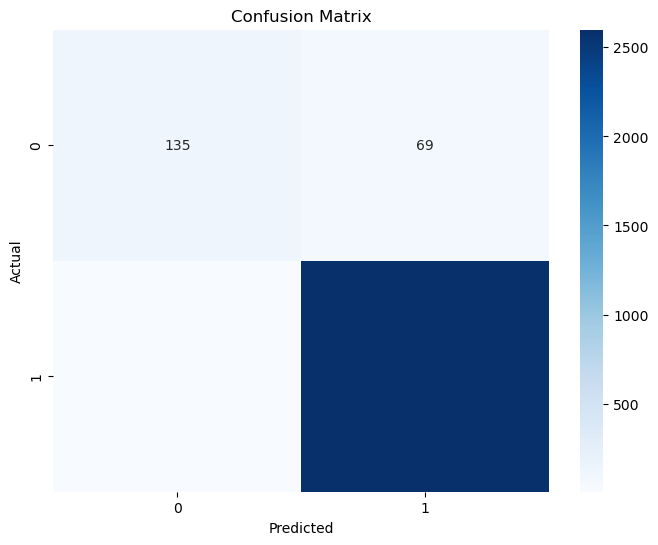

In [162]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val[:int(len(X_val_combined)*0.1)], knn_prediction)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [163]:
from sklearn.neighbors import KNeighborsClassifier

knn_lib = KNeighborsClassifier(n_neighbors=3)
knn_lib.fit(X_train_subsample, y_train_subsample)

KNeighborsClassifier(n_neighbors=3)

In [164]:
knn_lib_pred = knn_lib.predict(X_val_combined[:int(len(X_val_combined)*0.1)])

c:\Users\Dzulfaqor\anaconda3\Lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [165]:
# Convert predictions to numpy arrays (if they aren't already)
knn_pred = np.array(knn_prediction)
knn_lib_pred = np.array(knn_lib_pred)

# Count the number of differences
similarities = np.sum(knn_prediction == knn_lib_pred)
differences = np.sum(knn_prediction != knn_lib_pred)
print(f"Length of predicted data: {len(X_val_combined)*0.1}")
print(f"Similarities: {similarities}, Differences: {differences}")
print(f"Percentage of similarities: {similarities/int(len(X_val_combined)*0.1)}")
print(f"Percentage of differences: {differences/int(len(X_val_combined)*0.1)}")

Length of predicted data: 2808.1000000000004
Similarities: 2808, Differences: 0
Percentage of similarities: 1.0
Percentage of differences: 0.0


In [166]:
df_test.shape

(10000, 55)

In [167]:
df_test

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,48,80851.txt,https://www.iaee.org,19.0,NaN,12.0,0.0,org,NaN,0.079963,...,1.0,0.0,0.0,1.0,NaN,NaN,13.0,194.0,NaN,65.0
1,68,mw130480.txt,http://www.iran-edi.com,22.0,NaN,16.0,NaN,NaN,0.625000,NaN,...,NaN,NaN,0.0,NaN,0.0,NaN,2.0,0.0,0.0,1.0
2,76,400382.txt,https://www.bistum-chur.ch,25.0,www.bistum-chur.ch,18.0,0.0,ch,0.636364,0.004983,...,NaN,NaN,0.0,1.0,5.0,12.0,18.0,193.0,NaN,196.0
3,155,625297.txt,https://www.numberthreebath.com,30.0,NaN,23.0,NaN,com,1.000000,0.522907,...,0.0,0.0,NaN,NaN,NaN,1.0,10.0,12.0,0.0,11.0
4,167,8123642.txt,https://ipfs.litnet.work/ipfs/bafybeib5jvxytzb...,100.0,ipfs.litnet.work,NaN,0.0,work,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,235694,op274.txt,https://756-107694hr4g.weeblysite.com/,38.0,756-107694hr4g.weeblysite.com,29.0,0.0,com,NaN,0.522907,...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN
9996,235718,684050.txt,NaN,39.0,www.interactive-sonification.org,32.0,0.0,org,0.541667,0.079963,...,0.0,NaN,NaN,0.0,1.0,NaN,5.0,23.0,0.0,9.0
9997,235733,NaN,https://fuchsiabrownsysadmin--ficohsa121.repl....,NaN,NaN,NaN,0.0,NaN,0.675676,0.005977,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
9998,235740,565202.txt,https://www.benoit-mccarthy.com,NaN,www.benoit-mccarthy.com,23.0,0.0,NaN,0.600000,0.522907,...,0.0,0.0,0.0,1.0,11.0,22.0,NaN,45.0,NaN,NaN


In [171]:
clean_test = cleaning_pipeline(df_test.drop(columns="id"), is_train=False)

is_train: False
Missing values before cleaning
FILENAME                      3098
URL                           2080
URLLength                     2426
Domain                        2185
DomainLength                  2063
IsDomainIP                    2840
TLD                           3933
CharContinuationRate          3945
TLDLegitimateProb             3689
URLCharProb                   3501
TLDLength                     2975
NoOfSubDomain                 3679
HasObfuscation                3398
NoOfObfuscatedChar            2267
ObfuscationRatio              3454
NoOfLettersInURL              2086
LetterRatioInURL              3443
NoOfDegitsInURL               2911
DegitRatioInURL               2240
NoOfEqualsInURL               3699
NoOfQMarkInURL                3751
NoOfAmpersandInURL            2541
NoOfOtherSpecialCharsInURL    2846
SpacialCharRatioInURL         2908
IsHTTPS                       2831
LineOfCode                    2302
LargestLineLength             3270
HasTitle

C:\Users\Dzulfaqor\AppData\Local\Temp\ipykernel_18568\409223285.py:192: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[True True nan ... nan True True]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_copy.loc[df_copy['IsHTTPS'].isnull(), 'IsHTTPS'] = df_copy.loc[df_copy['IsHTTPS'].isnull(), 'URL'].apply(lambda x: cari_HTTPS(x) if pd.notnull(x) else np.nan)


Missing values after cleaning
FILENAME                 0
URLLength                0
DomainLength             0
IsDomainIP               0
TLD                      0
CharContinuationRate     0
TLDLegitimateProb        0
URLCharProb              0
TLDLength                0
NoOfSubDomain            0
HasObfuscation           0
NoOfObfuscatedChar       0
ObfuscationRatio         0
NoOfLettersInURL         0
LetterRatioInURL         0
NoOfDegitsInURL          0
DegitRatioInURL          0
NoOfEqualsInURL          0
NoOfQMarkInURL           0
NoOfAmpersandInURL       0
SpacialCharRatioInURL    0
IsHTTPS                  0
HasTitle                 0
DomainTitleMatchScore    0
URLTitleMatchScore       0
IsResponsive             0
dtype: int64
Before feature engineering pipeline
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FI

C:\Users\Dzulfaqor\AppData\Local\Temp\ipykernel_18568\409223285.py:309: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[[col for col in df_copy.columns if col in numerical_features]].fillna(df_copy[[col for col in df_copy.columns if col in numerical_features]].mean(), inplace=True)
C:\Users\Dzulfaqor\AppData\Local\Temp\ipykernel_18568\409223285.py:313: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead,

In [172]:
X_val_combined

,URLLength,DomainLength,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,ObfuscationRatio,LetterRatioInURL,...,URLTitleMatchScore,RatioDomainToURL,PathSpecialCharDensity,SubdomainRatio,IsDomainIP,TLD,HasObfuscation,IsHTTPS,HasTitle,IsResponsive
110142,24,17,1.000000,0.522907,0.060962,3,1,0,-0.000007,0.458000,...,100.000000,0.708333,-2.284571,0.058824,0.928043,0.934958,0.928108,0.961394,0.9433,0.96252
8967,31,23,1.000000,0.522907,0.062753,4,1,0,0.000000,0.567000,...,100.000000,0.741935,-2.747125,0.043478,0.928043,0.970087,0.928108,0.961394,0.9433,0.96252
136488,18,14,0.882997,0.522907,0.063223,3,1,0,0.000000,0.381000,...,100.000000,0.777778,-3.284000,0.071429,0.928043,0.934958,0.928108,0.961394,0.9433,0.96252
13834,25,18,1.000000,0.522907,0.069207,3,1,0,-0.000005,0.480000,...,100.000000,0.720000,-2.428571,0.055556,0.928043,0.934958,0.928108,0.961394,0.9433,0.96252
75770,22,15,0.866414,0.305684,0.054781,2,1,0,0.000006,0.409000,...,100.000000,0.681818,-1.993947,0.066667,0.928043,0.934958,0.928108,0.961394,0.9433,0.96252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46841,26,19,0.333333,0.014148,0.056636,2,1,0,0.000000,0.462000,...,62.281858,0.730769,-2.428286,0.052632,0.928043,0.963105,0.928108,0.961394,0.9433,0.96252
115523,28,21,1.000000,0.349250,0.066912,2,1,0,0.000000,0.536000,...,74.476180,0.750000,-2.856000,0.047619,0.928043,0.934958,0.928108,0.961394,0.9433,0.96252
74487,22,15,1.000000,0.018013,0.055844,2,1,0,0.000000,0.409000,...,100.000000,0.681818,-2.001429,0.066667,0.928043,0.743569,0.928108,0.961394,0.9433,0.96252
135352,23,19,0.879393,0.522907,0.055704,3,0,0,0.000042,0.586105,...,100.000000,0.826087,-4.531500,0.000000,0.928043,0.934958,0.928108,0.961394,0.9433,0.96252


In [173]:
clean_test

,URLLength,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,NoOfAmpersandInURL,SpacialCharRatioInURL,IsHTTPS,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,IsResponsive,RatioDomainToURL,PathSpecialCharDensity,SubdomainRatio
0,19,12,0.0,org,0.400000,0.079963,0.081395,3,1,0,...,0,0.050000,1.0,1.0,100.000000,80.0000,1.0,0.631579,-1.578571,0.083333
1,22,16,0.0,.com,0.625000,0.522907,0.069183,3,1,0,...,0,0.091000,0.0,0.0,-0.082679,0.0000,1.0,0.727273,-2.333000,0.062500
2,25,18,0.0,ch,0.636364,0.004983,0.050344,2,1,0,...,0,0.080000,True,1.0,0.000000,0.0000,1.0,0.720000,-2.285714,0.055556
3,30,23,0.0,com,1.000000,0.522907,0.059065,3,1,0,...,0,0.032258,1.0,1.0,100.000000,93.7500,1.0,0.766667,-3.147465,0.043478
4,100,16,0.0,work,0.150000,0.000236,0.035754,4,1,0,...,0,0.060000,1.0,1.0,-12.060165,0.0000,1.0,0.160000,-0.119048,0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38,29,0.0,com,0.500000,0.522907,0.029474,3,1,0,...,0,0.052632,1.0,1.0,0.000000,0.0000,0.0,0.763158,-3.000000,0.034483
9996,39,32,0.0,org,0.541667,0.079963,0.066188,3,1,0,...,0,0.051000,1.0,1.0,100.000000,98.5786,1.0,0.820513,-4.287286,0.031250
9997,72,40,0.0,.php?regh=josmar,0.675676,0.005977,0.052057,2,1,0,...,0,0.069444,1.0,1.0,-1.682063,0.0000,0.0,0.555556,-1.093750,0.025000
9998,31,23,0.0,.com,0.600000,0.522907,0.063081,3,1,0,...,0,0.067000,1.0,1.0,100.000000,93.7500,1.0,0.741935,-2.615375,0.043478


In [174]:
# Fit and transform the training data
test_encoded = encoder.transform(clean_test[final_categorical_features])

# Convert the numpy array to DataFrame with proper column names
test_encoded_df = pd.DataFrame(
    test_encoded,
    columns=final_categorical_features,
    index=clean_test.index
)

# Combine the target-encoded categorical features with numerical features
test_combined = pd.concat([
    clean_test[final_numerical_features],  # Keep original numerical features
    test_encoded_df  # Add the target-encoded categorical features
], axis=1)

In [176]:
knn_testpred = knn_model.predict(test_combined)

Implementasi save dan load model knn

In [177]:
# Save model
knn_model.save_model()  # Akan membuat nama file otomatis dengan timestamp
# # atau
# knn_model.save_model('knn_model_custom.pkl')  # Dengan nama file custom

Model berhasil disimpan ke saved_model\knn_model_k3_20241222_234356.pkl


### Implementasi load model

In [178]:
# Memuat model
loaded_knn = KNN.load_model()  # Akan menampilkan list model yang tersedia
# # atau
# loaded_knn = KNN.load_model('knn_model_custom.pkl')  # Load file spesifik


Model yang tersedia:
1. knn_model_k3_20241222_234356.pkl
Model berhasil dimuat dari saved_model\knn_model_k3_20241222_234356.pkl


# Uji Hasil Load Model

In [ ]:
# Prediksi menggunakan model yang baru di-load
predictions = loaded_knn.predict(X_train_combined)

# Prediksi menggunakan model asli 
original_predictions = knn_model.predict(X_train_combined)

# Konversi ke numpy array jika belum
predictions = np.array(predictions)
original_predictions = np.array(original_predictions)

# Hitung jumlah kesamaan dan perbedaan
similarities = np.sum(predictions == original_predictions)
differences = np.sum(predictions != original_predictions)

print(f"Length of predicted data: {len(X_train_combined)}")
print(f"Similarities: {similarities}, Differences: {differences}")
print(f"Percentage of similarities: {similarities/len(X_train_combined)}")
print(f"Percentage of differences: {differences/len(X_train_combined)}")

## B. Naive Bayes

In [179]:
class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.mean = {}
        self.var = {}
        self.prior = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        
        for cls in self.classes:
            X_cls = X[y == cls]
            self.mean[cls] = X_cls.mean(axis=0)
            self.var[cls] = X_cls.var(axis=0)
            self.prior[cls] = X_cls.shape[0] / n_samples

    def _gaussian_pdf(self, x, mean, var):
        coef = 1 / np.sqrt(2 * np.pi * var)
        exponent = np.exp(-((x - mean) ** 2) / (2 * var))
        return coef * exponent

    def predict(self, X):
        # Convert DataFrame to NumPy array if necessary
        if isinstance(X, pd.DataFrame):
            X = X.values
        predictions = [self._predict_single(x) for x in X]
        return np.array(predictions)

    def _predict_single(self, x):
        posteriors = {}
        for cls in self.classes:
            prior = np.log(self.prior[cls])
            class_conditional = np.sum(np.log(self._gaussian_pdf(x, self.mean[cls], self.var[cls])))
            posteriors[cls] = prior + class_conditional
        return max(posteriors, key=posteriors.get)

    def save_model(self, filename=None):
        """
        Menyimpan model ke file

        Parameters:
        filename (str): Nama file untuk menyimpan model
        """
        save_dir = 'saved_models'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        # Jika filepath tidak diberikan, buat nama file otomatis
        if filename is None:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            filename = f'gnb_model_k{self}_{timestamp}.pkl'
    
        # Gabungkan path folder dengan nama file
        full_path = os.path.join(save_dir, filename)
    
        # Cek apakah file sudah ada
        if os.path.exists(full_path):
            response = input(f"File {filename} sudah ada. Timpa file? (y/n): ")
            if response.lower() != 'y':
                print("Penyimpanan dibatalkan")
                return
        
        # Simpan model
        with open(full_path, 'wb') as f:
            pickle.dump(self, f)
        print(f"Model berhasil disimpan ke {full_path}")

    @staticmethod
    def load_model(filename=None):
        """
        Memuat model dari file

        Parameters:
        filename (str): Nama file yang berisi model

        Returns:
        model: Model Gaussian Naive Bayes yang sudah diinisialisasi dengan data training
        """
        save_dir = '/content/saved_models'
        # Jika filepath tidak diberikan, tampilkan list file yang tersedia
        if filename is None:
            saved_files = [f for f in os.listdir(save_dir) if f.endswith('.pkl')]
            if not saved_files:
                raise FileNotFoundError(f"Tidak ada file model di folder {save_dir}")
            
            print("\nModel yang tersedia:")
            for i, file in enumerate(saved_files, 1):
                print(f"{i}. {file}")
            
            while True:
                try:
                    choice = int(input("\nPilih nomor model yang ingin dimuat (0 untuk batal): "))
                    if choice == 0:
                        print("Pembatalan dimuat")
                        return None
                    if 1 <= choice <= len(saved_files):
                        filename = saved_files[choice-1]
                        break
                    print("Pilihan tidak valid")
                except ValueError:
                    print("Masukkan nomor yang valid")
        
   
        full_path = os.path.join(save_dir, filename)  
       
        # Cek apakah file ada
        if not os.path.exists(full_path):
            raise FileNotFoundError(f"Model file tidak ditemukan di {full_path}")
            
        # Load model
        with open(full_path, 'rb') as f:
            model = pickle.load(f)
            print(f"Model berhasil dimuat dari {full_path}")
            return model


In [180]:
X_val_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28081 entries, 110142 to 126907
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   URLLength               28081 non-null  int32  
 1   DomainLength            28081 non-null  int32  
 2   CharContinuationRate    28081 non-null  float64
 3   TLDLegitimateProb       28081 non-null  float64
 4   URLCharProb             28081 non-null  float64
 5   TLDLength               28081 non-null  int32  
 6   NoOfSubDomain           28081 non-null  int32  
 7   NoOfObfuscatedChar      28081 non-null  int32  
 8   ObfuscationRatio        28081 non-null  float64
 9   LetterRatioInURL        28081 non-null  float64
 10  NoOfDegitsInURL         28081 non-null  int32  
 11  DegitRatioInURL         28081 non-null  float64
 12  NoOfEqualsInURL         28081 non-null  int32  
 13  NoOfQMarkInURL          28081 non-null  int32  
 14  NoOfAmpersandInURL      28081 non-nul

In [181]:
# Train Gaussian Naive Bayes
gnb_model = GaussianNaiveBayes()
gnb_model.fit(X_train_combined, y_train_clean)

In [182]:
start_time = time.time()
gnb_prediction = gnb_model.predict(X_val_combined)
print("Total predicting time: ", time.time()-start_time)

c:\Users\Dzulfaqor\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Total predicting time:  27.05256414413452


In [183]:
accuracy_score(y_val, gnb_prediction)

0.9783483494177557

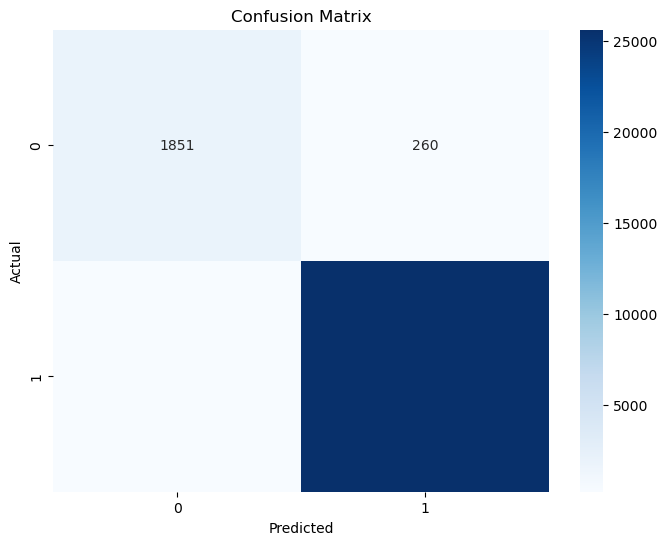

In [184]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, gnb_prediction)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [185]:
gnb_model.save_model()

OSError: [Errno 22] Invalid argument: 'saved_models\\gnb_model_k<__main__.GaussianNaiveBayes object at 0x000002B0F24AF190>_20241222_234429.pkl'

In [ ]:
loaded_gnb= GaussianNaiveBayes.load_model()

In [ ]:
loaded_gnb.fit(X_train_combined, y_train_clean)

In [ ]:
new_prediction = loaded_gnb.predict(X_val_combined)

In [ ]:
ori_gnb_prediction = np.array(gnb_prediction)
new_gnb_prediction = np.array(new_prediction)

similarities = np.sum (ori_gnb_prediction == new_gnb_prediction)
differences = np.sum (ori_gnb_prediction != new_gnb_prediction)

print(f"Jumlah kesamaan: {similarities}")
print(f"Jumlah perbedaan: {differences}")
print(f"Persentase kesamaan: {similarities/len(ori_gnb_prediction)}")
print(f"Persentase perbedaan: {differences/len(ori_gnb_prediction)}")

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_lib = GaussianNB()

gnb_lib.fit(X_train_combined, y_train_clean)

In [ ]:
gnb_lib_pred = gnb_lib.predict(X_val_combined)

In [ ]:
gnb_pred = np.array(gnb_prediction)
gnb_lib_pred = np.array(gnb_lib_pred)

similarities = np.sum(gnb_prediction == gnb_lib_pred)
differences = np.sum(gnb_prediction != gnb_lib_pred)
print(f"Length of predicted data: {len(X_val_combined)}")
print(f"Similarities: {similarities}, Differences: {differences}")
print(f"Percentage of similarities: {similarities/int(len(X_val_combined))}")
print(f"Percentage of differences: {differences/int(len(X_val_combined))}")

## C. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [235]:
# Type your code here

## D. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `label` column.

Note: Adjust step 1 and 2 to your implementation of the preprocessing step if you don't use pipeline API from `sklearn`.

In [236]:
df_test.shape

(10000, 55)

In [237]:
df_test

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,48,80851.txt,https://www.iaee.org,19.0,NaN,12.0,0.0,org,NaN,0.079963,...,1.0,0.0,0.0,1.0,NaN,NaN,13.0,194.0,NaN,65.0
1,68,mw130480.txt,http://www.iran-edi.com,22.0,NaN,16.0,NaN,NaN,0.625000,NaN,...,NaN,NaN,0.0,NaN,0.0,NaN,2.0,0.0,0.0,1.0
2,76,400382.txt,https://www.bistum-chur.ch,25.0,www.bistum-chur.ch,18.0,0.0,ch,0.636364,0.004983,...,NaN,NaN,0.0,1.0,5.0,12.0,18.0,193.0,NaN,196.0
3,155,625297.txt,https://www.numberthreebath.com,30.0,NaN,23.0,NaN,com,1.000000,0.522907,...,0.0,0.0,NaN,NaN,NaN,1.0,10.0,12.0,0.0,11.0
4,167,8123642.txt,https://ipfs.litnet.work/ipfs/bafybeib5jvxytzb...,100.0,ipfs.litnet.work,NaN,0.0,work,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,235694,op274.txt,https://756-107694hr4g.weeblysite.com/,38.0,756-107694hr4g.weeblysite.com,29.0,0.0,com,NaN,0.522907,...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN
9996,235718,684050.txt,NaN,39.0,www.interactive-sonification.org,32.0,0.0,org,0.541667,0.079963,...,0.0,NaN,NaN,0.0,1.0,NaN,5.0,23.0,0.0,9.0
9997,235733,NaN,https://fuchsiabrownsysadmin--ficohsa121.repl....,NaN,NaN,NaN,0.0,NaN,0.675676,0.005977,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
9998,235740,565202.txt,https://www.benoit-mccarthy.com,NaN,www.benoit-mccarthy.com,23.0,0.0,NaN,0.600000,0.522907,...,0.0,0.0,0.0,1.0,11.0,22.0,NaN,45.0,NaN,NaN


test set harus diperlakukan sama dengan train dan val agar bisa dipredict oleh model

In [238]:
clean_test = cleaning_pipeline(df_test.drop(columns="id"), is_train=False)

is_train: False
Missing values before cleaning
FILENAME                      3098
URL                           2080
URLLength                     2426
Domain                        2185
DomainLength                  2063
IsDomainIP                    2840
TLD                           3933
CharContinuationRate          3945
TLDLegitimateProb             3689
URLCharProb                   3501
TLDLength                     2975
NoOfSubDomain                 3679
HasObfuscation                3398
NoOfObfuscatedChar            2267
ObfuscationRatio              3454
NoOfLettersInURL              2086
LetterRatioInURL              3443
NoOfDegitsInURL               2911
DegitRatioInURL               2240
NoOfEqualsInURL               3699
NoOfQMarkInURL                3751
NoOfAmpersandInURL            2541
NoOfOtherSpecialCharsInURL    2846
SpacialCharRatioInURL         2908
IsHTTPS                       2831
LineOfCode                    2302
LargestLineLength             3270
HasTitle

C:\Users\Dama\AppData\Local\Temp\ipykernel_34156\3419601244.py:192: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[True True nan ... nan True True]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_copy.loc[df_copy['IsHTTPS'].isnull(), 'IsHTTPS'] = df_copy.loc[df_copy['IsHTTPS'].isnull(), 'URL'].apply(lambda x: cari_HTTPS(x) if pd.notnull(x) else np.nan)


FILENAME                 3098
URLLength                   0
DomainLength                0
IsDomainIP                  0
TLD                         0
CharContinuationRate        0
TLDLegitimateProb           0
URLCharProb                 0
TLDLength                   0
NoOfSubDomain               0
HasObfuscation              0
NoOfObfuscatedChar          0
ObfuscationRatio            0
NoOfLettersInURL            0
LetterRatioInURL            0
NoOfDegitsInURL             0
DegitRatioInURL             0
NoOfEqualsInURL             0
NoOfQMarkInURL              0
NoOfAmpersandInURL          0
SpacialCharRatioInURL       0
IsHTTPS                     5
HasTitle                   29
DomainTitleMatchScore       0
URLTitleMatchScore          0
IsResponsive              182
dtype: int64
Missing values after cleaning
FILENAME                 0
URLLength                0
DomainLength             0
IsDomainIP               0
TLD                      0
CharContinuationRate     0
TLDLegitimatePr

C:\Users\Dama\AppData\Local\Temp\ipykernel_34156\3419601244.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[[col for col in df_copy.columns if col in numerical_features]].fillna(df_copy[[col for col in df_copy.columns if col in numerical_features]].mean(), inplace=True)
C:\Users\Dama\AppData\Local\Temp\ipykernel_34156\3419601244.py:315: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perf

In [187]:
# Fit and transform the training data
test_encoded = encoder.transform(clean_test[final_categorical_features])

# Convert the numpy array to DataFrame with proper column names
test_encoded_df = pd.DataFrame(
    test_encoded,
    columns=final_categorical_features,
    index=clean_test.index
)

# Combine the target-encoded categorical features with numerical features
test_combined = pd.concat([
    clean_test[final_numerical_features],  # Keep original numerical features
    test_encoded_df  # Add the target-encoded categorical features
], axis=1)

In [188]:
model_name = input("input model name used for test prediction: (knn/gnb)")
if model_name == "knn":
    knn_testpred = knn_model.predict(test_combined)
    submission_df = pd.concat([df_test["id"], pd.DataFrame(knn_testpred)], axis=1)
elif model_name == "gnb":
    gnb_testpred = gnb_model.predict(test_combined)
    submission_df = pd.concat([df_test["id"], pd.DataFrame(gnb_testpred)], axis=1)
submission_df

c:\Users\Dzulfaqor\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,id,0
0,48,1
1,68,0
2,76,1
3,155,1
4,167,0
...,...,...
9995,235694,0
9996,235718,1
9997,235733,0
9998,235740,1


In [189]:
# Get the current date and time
current_time = datetime.now().strftime("%d_%m-%Hh_%Mm")

# Generate the filename with datetime
filename = f"submission_{model_name}_{current_time}.csv"

submission_df.to_csv(filename, index=False)

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

## 6.1. Does my model perform better in predicting one class than the other?

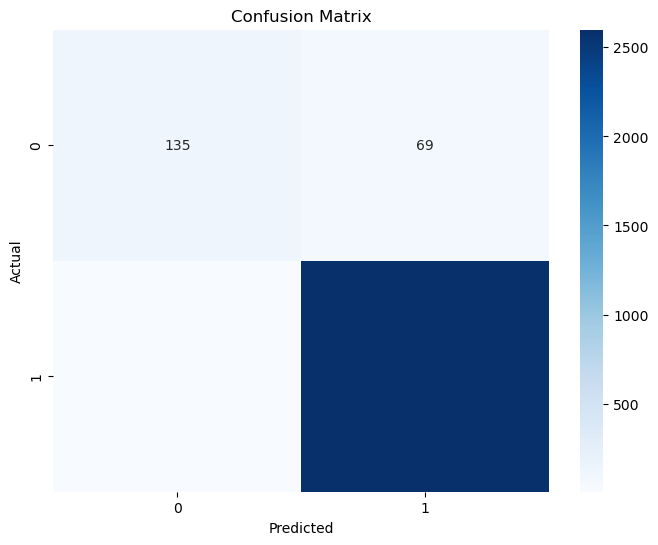

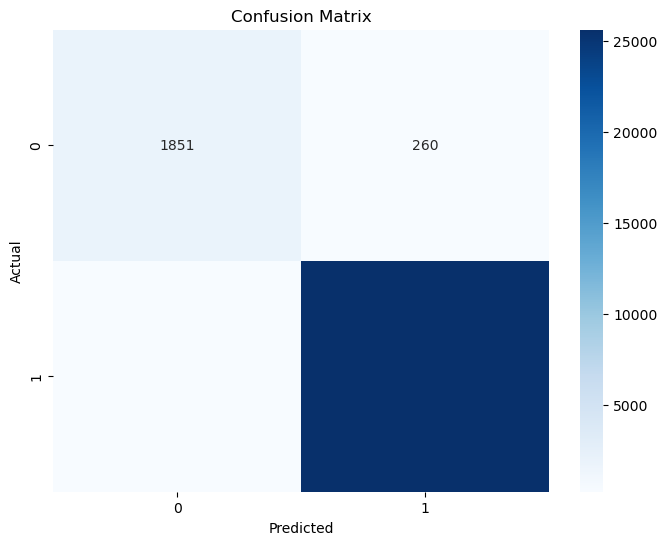

In [190]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val[:int(len(X_val_combined)*0.1)], knn_prediction)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
# Calculate the confusion matrix
cm = confusion_matrix(y_val, gnb_prediction)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

Ya, model kami memprediksi class 1 lebih baik daripada class 0. Terlihat ini terjadi pada model KNN maupun GNB. Alasan ini terjadi adalah karena train set lebih banyak memiliki class 1 daripada class 0, sehingga model lebih mudah mempelajari karakteristik dari class 1.

## 6.2. To each models I've tried, which one performs best and why?
Model yang hasilnya lebih baik adalah GNB, GNB lebih cepat secara waktu fit dan predict juga memiliki hasil prediksi test (di kaggle) yang lebih baik juga. Hal ini bisa terjadi karena KNN harus dibatasi dalam training setnya, training set dibatasi karena sumber daya komputasi tidak memadai untuk menyimpan perhitungan jarak setiap data point dalam data testing terhadap 100k data train. Secara fundamental, GNB juga memanfaatkan rumus probabilitas sehingga apabila class dalam dataset tidak terpisah secara geometri, GNB akan memiliki performa yang lebih baik daripada KNN.
## 6.3. Is it better for me to impute or drop the missing data? Why?
Pilihan lebih baik impute atau drop tergantung pada *domain knowledge* yang dimiliki, dan berapa banyak nilai kosong yang ada. Seperti dalam notebook ini, kami meng-impute data kosong yang bisa diinferensi dengan *domain knowledge* melalui fitur lain, dan kemudian menghapus nilai kosong yang tidak bisa diinferensi dari fitur lain.
## 6.4. Does feature scaling help improve my model performance?
Scaling meningkatkan performa model hanya pada KNN, karena KNN mengandalkan jarak yang lebih seimbang antara semua fitur agar tidak ada fitur yang mendominasi fitur yang sama penting.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a4802bd-f771-4cda-80db-e84ede68aba5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>